# Step 1: Demographic(Customer) Data

## Understanding, Cleaning, Analysis and Preparation

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Demographic (Customer) data

In [3]:
cust_data = pd.read_csv("C:/Vipul Docs/Upgrad/Domain Elective/Team Docs/Ruchita/Demographic data.csv")
cust_data.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


### <span style="color:blue">1. Data Understanding</span>

In [4]:
# Inspecting number of rows and column of dataset
cust_data.shape

(71295, 12)

In [5]:
# Inspecting entries, dtypes, number of columns of dataset
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [6]:
# Checking overall spread of all the columns of dataset
cust_data.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


In [7]:
# Inspecting column names
cust_data.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')

In [8]:
# Renaming column names for better readability
cust_data=cust_data.rename(columns = {"Application ID":"ApplicationID", "Marital Status (at the time of application)"
                            :"MaritalStatus","No of dependents":"NoDependents","Profession ":"Profession",
                            "Type of residence":"ResidenceType",
                            "No of months in current residence":"MnthsResidence","No of months in current company"
                            :"MnthsCompany","Performance Tag":"PerformanceTag"})

In [9]:
# Inspecting count of null values in dataset
print(cust_data.isnull().sum())

# Percentage of null values in dataset
round(100*cust_data.isnull().sum()/len(cust_data.index),2)

ApplicationID        0
Age                  0
Gender               2
MaritalStatus        6
NoDependents         3
Income               0
Education          119
Profession          14
ResidenceType        8
MnthsResidence       0
MnthsCompany         0
PerformanceTag    1425
dtype: int64


ApplicationID     0.00
Age               0.00
Gender            0.00
MaritalStatus     0.01
NoDependents      0.00
Income            0.00
Education         0.17
Profession        0.02
ResidenceType     0.01
MnthsResidence    0.00
MnthsCompany      0.00
PerformanceTag    2.00
dtype: float64

#### Retaining data of rejected candidates

In [10]:
#### We need to retain the rejected candidiates (the ones with Performance Tag as NULL) for model validation later
rej_cust_data = cust_data[cust_data["PerformanceTag"].isnull()]
print("Number of Rejected candidates in dataset:",len(rej_cust_data))

rej_cust_data.head()

Number of Rejected candidates in dataset: 1425


,ApplicationID,Age,Gender,MaritalStatus,NoDependents,Income,Education,Profession,ResidenceType,MnthsResidence,MnthsCompany,PerformanceTag
69603,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,18,NaN
69604,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,25,NaN
69605,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,31,NaN
69606,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,47,NaN
69607,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,49,NaN


### <span style="color:blue">2. Data Cleaning</span>

#### Removing data of rejected candidates from base dataframe

In [11]:
# Deleting rows with null values of Performance Tag for model building
cust_data=cust_data[~cust_data["PerformanceTag"].isnull()]
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 12 columns):
ApplicationID     69870 non-null int64
Age               69870 non-null int64
Gender            69868 non-null object
MaritalStatus     69864 non-null object
NoDependents      69867 non-null float64
Income            69870 non-null float64
Education         69752 non-null object
Profession        69857 non-null object
ResidenceType     69862 non-null object
MnthsResidence    69870 non-null int64
MnthsCompany      69870 non-null int64
PerformanceTag    69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.9+ MB


In [12]:
cust_data.PerformanceTag.value_counts()

0.0    66922
1.0     2948
Name: PerformanceTag, dtype: int64

In [13]:
# Checking duplicate data
cust_data.loc[cust_data["ApplicationID"].duplicated()]

,ApplicationID,Age,Gender,MaritalStatus,NoDependents,Income,Education,Profession,ResidenceType,MnthsResidence,MnthsCompany,PerformanceTag
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0


There are 3 duplicate records of Application ID

#### <span style="color:blue">Assumption</span>
__For the Duplicate Application ID__

We have decided to go with the record having Performance Tag as 1 or the latest record (deciding based on age)

In [14]:
cust_data.loc[cust_data["ApplicationID"].isin(['765011468',
                                               '653287861','671989187'])].sort_values(by='ApplicationID', ascending=True)

,ApplicationID,Age,Gender,MaritalStatus,NoDependents,Income,Education,Profession,ResidenceType,MnthsResidence,MnthsCompany,PerformanceTag
5243,653287861,26,M,Married,3.0,25.0,Bachelor,SAL,Rented,112,58,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
48602,671989187,27,M,Married,2.0,35.0,Professional,SAL,Living with Parents,108,7,0.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0
24386,765011468,57,M,Single,4.0,4.5,Bachelor,SAL,Company provided,6,56,0.0
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0


In [15]:
## Deleting the record with index 5243 as we are keeping the record with PerformanceTag as 1
cust_data.drop(index=5243 ,inplace=True)

### Deleting the record with index 48602 as it is the older record based on
cust_data.drop(index=48602 ,inplace=True)

## Deleting the record with index 27586 as keeping the latest record based on age
cust_data.drop(index=27586 ,inplace=True)

In [16]:
# Checking duplicate data
cust_data.loc[cust_data["ApplicationID"].duplicated()]

,ApplicationID,Age,Gender,MaritalStatus,NoDependents,Income,Education,Profession,ResidenceType,MnthsResidence,MnthsCompany,PerformanceTag


No duplicate record exist after cleaning

In [17]:
cust_data.nunique()

ApplicationID     69867
Age                  53
Gender                2
MaritalStatus         2
NoDependents          5
Income               63
Education             5
Profession            3
ResidenceType         5
MnthsResidence      121
MnthsCompany         83
PerformanceTag        2
dtype: int64

Since Aplication ID is all unique, it is not useful for analysis

In [18]:
# Taking backup of dataframe 
cust_data_copy=cust_data.copy()
cust_data.drop(["ApplicationID"],axis=1,inplace=True)

In [19]:
cust_data.shape

(69867, 11)

#### <span style="color:blue">Assumption</span>
- We observed that there are __few null values in some columns__
- We will be using __Weight of Evidence(WOE) which will take care of null values__. Hence, __not removing null values.__

### <span style="color:blue">3. Exploratory Data Analysis (Univariate and Bivariate) for Customer (Demographic) data </span>

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

First, we will look at the Demographic (Customer) data.
- Age
- Gender                
- MaritalStatus         
- NoDependents          
- Income               
- Education             
- Profession            
- ResidenceType         
- MnthsResidence      
- MnthsCompany

#### Age column

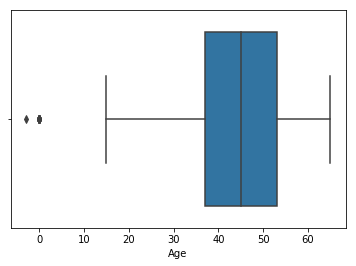

In [20]:
# Boxplot to visualize outliers
sns.boxplot(x='Age', data=cust_data)
plt.show()

#### <span style="color:blue">Assumption</span>
- We can observe from the boxplot that there are __outliers in the Age column__.
- We will be using __Weight of Evidence(WOE) which will take care of outliers__. Hence, __not removing outliers.__

In [21]:
# Inspecting spread of the values in Age column
cust_data.Age.describe()

count    69867.000000
mean        44.996207
std          9.929720
min         -3.000000
25%         37.000000
50%         45.000000
75%         53.000000
max         65.000000
Name: Age, dtype: float64

In [22]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the default rates

bins = [-3,25,35,45,55,65]
cust_data['age_bins'] = pd.cut(cust_data['Age'], bins, include_lowest=True)

In [23]:
# Count of number of customers for each age group(bin)
No_of_cust = cust_data.groupby('age_bins')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each age group(bin)
count_default = cust_data[cust_data['PerformanceTag']==1].groupby('age_bins')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_age = No_of_cust.merge(count_default, on='age_bins')

# Default rate for each age group(bin)
agg_age['default_rate'] = 100*(agg_age['count_defaults']/agg_age['No_of_cust']).round(3)
agg_age

,age_bins,No_of_cust,count_defaults,default_rate
0,"(-3.001, 25.0]",420,9,2.1
1,"(25.0, 35.0]",12453,534,4.3
2,"(35.0, 45.0]",23292,1009,4.3
3,"(45.0, 55.0]",22622,902,4.0
4,"(55.0, 65.0]",11080,494,4.5


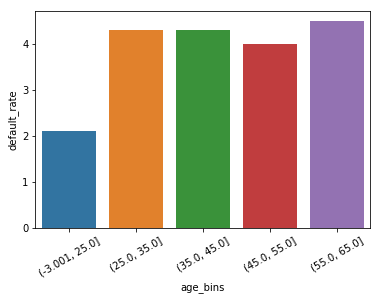

In [24]:
# Bargraph of default rate vs each age group(bin)
ax = sns.barplot(x='age_bins', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The lowest has the lowest default rate while the eldest are the most likely to default.

In [25]:
# Removing the col age_bins created above for grouping
cust_data=cust_data.drop(["age_bins"],axis=1)

#### Gender column

In [26]:
# Value count for each Gender
cust_data.Gender.value_counts()

M    53359
F    16506
Name: Gender, dtype: int64

In [27]:
# Count of number of customers for each gender
No_of_cust = cust_data.groupby('Gender')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each gender
count_default = cust_data[cust_data['PerformanceTag']==1].groupby('Gender')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_gender = No_of_cust.merge(count_default, on='Gender')

# Default rate for each gender
agg_gender['default_rate'] = 100*(agg_gender['count_defaults']/agg_gender['No_of_cust']).round(3)
agg_gender

,Gender,No_of_cust,count_defaults,default_rate
0,F,16506,718,4.3
1,M,53359,2230,4.2


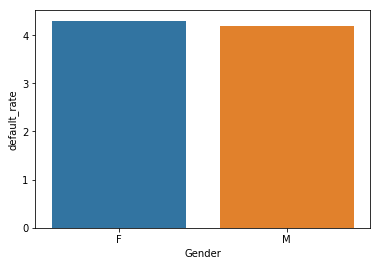

In [28]:
# Bargraph of default rate vs gender
ax = sns.barplot(x='Gender', y='default_rate', data=agg_gender)
plt.show()

We can see that the default rate is slightly higher for females

#### NoDependents (Number of Dependents) column

In [29]:
# Value count for each 'number of dependents' value
cust_data.NoDependents.value_counts()

3.0    15644
1.0    15218
2.0    15127
4.0    11999
5.0    11876
Name: NoDependents, dtype: int64

In [30]:
# Count of number of customers for each 'number of dependents' value
No_of_cust = cust_data.groupby('NoDependents')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each 'number of dependents' value
count_default = cust_data[cust_data['PerformanceTag']==1].groupby('NoDependents')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_dep = No_of_cust.merge(count_default, on='NoDependents')

# Default rate for each 'number of dependents' value
agg_dep['default_rate'] = 100*(agg_dep['count_defaults']/agg_dep['No_of_cust']).round(3)
agg_dep

,NoDependents,No_of_cust,count_defaults,default_rate
0,1.0,15218,667,4.4
1,2.0,15127,588,3.9
2,3.0,15644,695,4.4
3,4.0,11999,494,4.1
4,5.0,11876,504,4.2


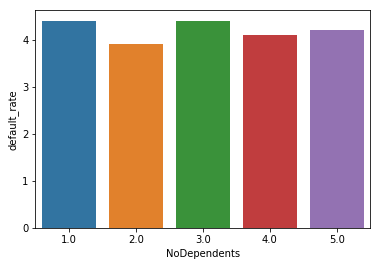

In [31]:
# Bargraph of default rate vs NoDependents(Number of dependents)
ax = sns.barplot(x='NoDependents', y='default_rate', data=agg_dep)
plt.show()

We can see that the default rate is slightly higher for no of dependents 1 or 3. But it is not conclusive.

#### Income column

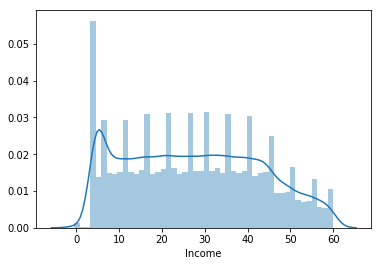

In [32]:
# Distplot to see the distribution of income
sns.distplot(cust_data["Income"])
plt.show()

#### <span style="color:blue">Assumption</span>
- We can observe from the above graph that __Income column__ has __some negative value__
- We will be using __Weight of Evidence(WOE) which will take care of negative values__. Hence, __not removing rows containing negative values__.

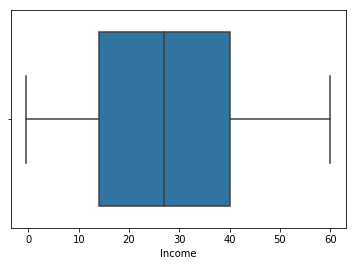

In [33]:
# Boxplot to visualize outliers in income column
sns.boxplot(x="Income",data=cust_data)
plt.show()

In [34]:
# Inspecting spread of the values in income column
cust_data["Income"].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

count    69867.000000
mean        27.408705
std         15.476063
min         -0.500000
5%           4.500000
10%          6.000000
25%         14.000000
50%         27.000000
75%         40.000000
90%         49.000000
95%         54.000000
99%         59.000000
max         60.000000
Name: Income, dtype: float64

In [35]:
# To understand the behaviour of people with income, we are going to bucket the Income into brackets of 10 and 
# study the default rates

# Since WOE will take care of the outliers, we are not deleting them
bins = [-0.5,10,20,30,40,50,60]
cust_data['Income_bins'] = pd.cut(cust_data['Income'], bins, include_lowest=True)

In [36]:
# Count of number of customers for each income group(bin)
No_of_cust = cust_data.groupby('Income_bins')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each income group(bin)
count_default = cust_data[cust_data['PerformanceTag']==1].groupby('Income_bins')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_inc = No_of_cust.merge(count_default, on='Income_bins')

# Default rate for each income group(bin)
agg_inc['default_rate'] = 100*(agg_inc['count_defaults']/agg_inc['No_of_cust']).round(3)
agg_inc

,Income_bins,No_of_cust,count_defaults,default_rate
0,"(-0.501, 10.0]",12841,713,5.6
1,"(10.0, 20.0]",13349,604,4.5
2,"(20.0, 30.0]",13586,601,4.4
3,"(30.0, 40.0]",13635,485,3.6
4,"(40.0, 50.0]",10844,384,3.5
5,"(50.0, 60.0]",5612,161,2.9


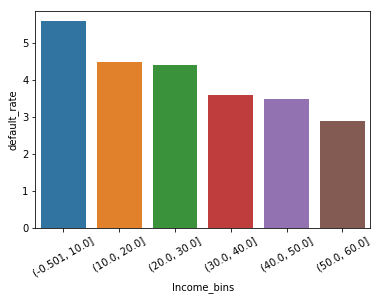

In [37]:
# Bargraph of default rate vs Income
ax = sns.barplot(x='Income_bins', y='default_rate', data=agg_inc)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate decreases with the increase in the income

In [38]:
# Removing the column Income_bins created above for grouping
cust_data=cust_data.drop(["Income_bins"],axis=1)

#### Education column

In [39]:
# Value count for each Education type value
cust_data.Education.value_counts()

Professional    24384
Masters         23481
Bachelor        17301
Phd              4464
Others            119
Name: Education, dtype: int64

In [40]:
# Count of number of customers for each Education type value
No_of_cust = cust_data.groupby('Education')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each Education type value
count_default = cust_data[cust_data['PerformanceTag']==1].groupby('Education')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_edu = No_of_cust.merge(count_default, on='Education')

# Default rate for each Education type value
agg_edu['default_rate'] = 100*(agg_edu['count_defaults']/agg_edu['No_of_cust']).round(3)
agg_edu

,Education,No_of_cust,count_defaults,default_rate
0,Bachelor,17301,742,4.3
1,Masters,23481,998,4.3
2,Others,119,8,6.7
3,Phd,4464,184,4.1
4,Professional,24384,1011,4.1


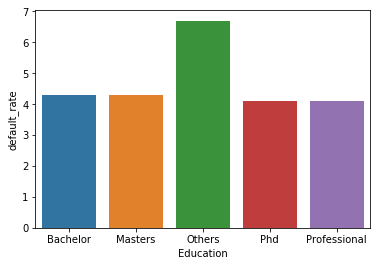

In [41]:
# Bargraph of default rate vs Education
ax = sns.barplot(x='Education', y='default_rate', data=agg_edu)
plt.show()

We can see that the default rate is quite high with Education as others but since the toal count is small
we cannot conclude anything.

#### Profession column

In [42]:
# Value count for each Profession type value
cust_data["Profession"].value_counts()

SAL        39671
SE_PROF    16256
SE         13927
Name: Profession, dtype: int64

In [43]:
# Count of number of customers for each Profession type value
No_of_cust = cust_data.groupby('Profession')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each Profession type value
count_default = cust_data[cust_data['PerformanceTag']==1].groupby('Profession')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_prof = No_of_cust.merge(count_default, on='Profession')

# Default rate for each Profession type value
agg_prof['default_rate'] = 100*(agg_prof['count_defaults']/agg_prof['No_of_cust']).round(3)
agg_prof

,Profession,No_of_cust,count_defaults,default_rate
0,SAL,39671,1629,4.1
1,SE,13927,642,4.6
2,SE_PROF,16256,677,4.2


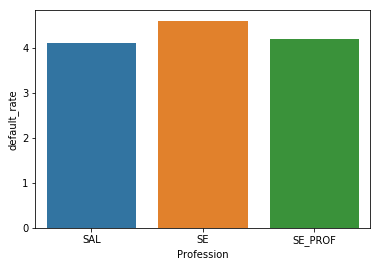

In [44]:
# Bargraph of default rate vs Profession
ax = sns.barplot(x='Profession', y='default_rate', data=agg_prof)
plt.show()

We can see that the default rate is slightly high for Profession as SE

#### ResidenceType (Type of Residence) column

In [45]:
# Value count for each ResidenceType value
cust_data.ResidenceType.value_counts()

Rented                 52278
Owned                  14003
Living with Parents     1777
Company provided        1603
Others                   198
Name: ResidenceType, dtype: int64

In [46]:
# Count of number of customers for each ResidenceType value
No_of_cust = cust_data.groupby('ResidenceType')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each ResidenceType value
count_default = cust_data[cust_data['PerformanceTag']==1].groupby('ResidenceType')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_res = No_of_cust.merge(count_default, on='ResidenceType')

# Default rate for each ResidenceType value
agg_res['default_rate'] = 100*(agg_res['count_defaults']/agg_res['No_of_cust']).round(3)
agg_res

,ResidenceType,No_of_cust,count_defaults,default_rate
0,Company provided,1603,73,4.6
1,Living with Parents,1777,80,4.5
2,Others,198,5,2.5
3,Owned,14003,593,4.2
4,Rented,52278,2197,4.2


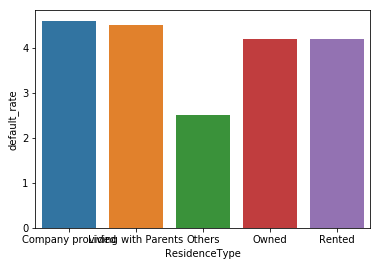

In [381]:
# Bargraph of default rate vs ResidenceType
ax = sns.barplot(x='ResidenceType', y='default_rate', data=agg_res)
plt.show()

We can see that the default rate is less for Residence Type as Others

#### MnthsResidence (No. of months in current residence) column

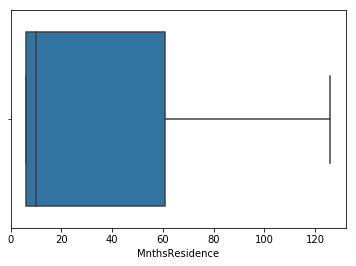

In [48]:
# Boxplot to visualize outliers in MnthsResidence column
sns.boxplot(x='MnthsResidence', data=cust_data)
plt.show()

In [49]:
# Inspecting spread of the values in MnthsResidence column
cust_data.MnthsResidence.describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    69867.000000
mean        34.606395
std         36.844078
min          6.000000
5%           6.000000
25%          6.000000
50%         10.000000
75%         61.000000
90%         98.000000
95%        110.000000
99%        122.000000
max        126.000000
Name: MnthsResidence, dtype: float64

In [50]:
# To understand the behaviour of people with mnths of Residence, we are going to bucket the mnths into various
# brackets and study the default rates

bins = [6,12,48,84,150]
cust_data['mth_res_bins'] = pd.cut(cust_data['MnthsResidence'], bins, include_lowest=True)

In [51]:
# Count of number of customers for each No. of months in current residence group(bin)
No_of_cust = cust_data.groupby('mth_res_bins')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each No. of months in current residence group(bin)
count_default = cust_data[cust_data['PerformanceTag']==1].groupby('mth_res_bins')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_mnth_res = No_of_cust.merge(count_default, on='mth_res_bins')

# Default rate for each No. of months in current residence group(bin)
agg_mnth_res['default_rate'] = 100*(agg_mnth_res['count_defaults']/agg_mnth_res['No_of_cust']).round(3)
agg_mnth_res

,mth_res_bins,No_of_cust,count_defaults,default_rate
0,"(5.999, 12.0]",35854,1217,3.4
1,"(12.0, 48.0]",12656,762,6.0
2,"(48.0, 84.0]",10707,529,4.9
3,"(84.0, 150.0]",10650,440,4.1


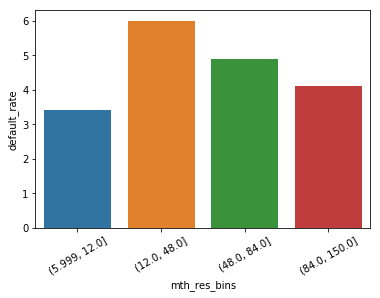

In [52]:
# Bargraph of default rate vs mth_res_bins
ax = sns.barplot(x='mth_res_bins', y='default_rate', data=agg_mnth_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

It seems that the default rate is higher for months of residence between 12-48

In [53]:
# Removing the column mth_res_bins created above for grouping
cust_data=cust_data.drop(["mth_res_bins"],axis=1)

#### MnthsCompany (No. of months in current company) column

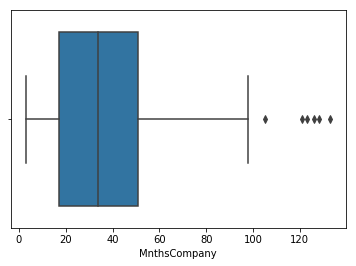

In [54]:
# Boxplot to visualize outliers in MnthsCompany column
sns.boxplot(x='MnthsCompany', data=cust_data)
plt.show()

In [55]:
# Inspecting spread of the values in MnthsCompany column
cust_data.MnthsCompany.describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    69867.000000
mean        34.198692
std         20.349700
min          3.000000
5%           3.000000
25%         17.000000
50%         34.000000
75%         51.000000
90%         62.000000
95%         68.000000
99%         74.000000
max        133.000000
Name: MnthsCompany, dtype: float64

In [56]:
# To understand the behaviour of people with mnths of Company, we are going to bucket the mnths into variable 
# brackets and study the default rates

bins = [6,18,30,42,54,134]
cust_data['mth_cmp_bins'] = pd.cut(cust_data['MnthsCompany'], bins, include_lowest=True)

In [57]:
# Count of number of customers for each No. of months in current Company group(bin)
No_of_cust = cust_data.groupby('mth_cmp_bins')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each No. of months in current Company group(bin)
count_default = cust_data[cust_data['PerformanceTag']==1].groupby('mth_cmp_bins')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_mnth_cmp = No_of_cust.merge(count_default, on='mth_cmp_bins')

# Default rate for each No. of months in current Company group(bin)
agg_mnth_cmp['default_rate'] = 100*(agg_mnth_cmp['count_defaults']/agg_mnth_cmp['No_of_cust']).round(3)
agg_mnth_cmp

,mth_cmp_bins,No_of_cust,count_defaults,default_rate
0,"(5.999, 18.0]",12716,646,5.1
1,"(18.0, 30.0]",12021,508,4.2
2,"(30.0, 42.0]",12264,511,4.2
3,"(42.0, 54.0]",12384,429,3.5
4,"(54.0, 134.0]",13792,544,3.9


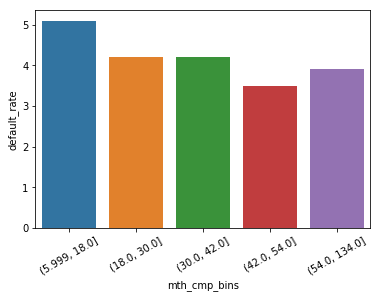

In [58]:
# Bargraph of default rate vs mth_cmp_bins
ax = sns.barplot(x='mth_cmp_bins', y='default_rate', data=agg_mnth_cmp)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

It seems that the default rate decreases as the customer's months in company increases with an exception for more than 5 yrs.

In [59]:
# Removing the column mth_cmp_bins created above for grouping
cust_data=cust_data.drop(["mth_cmp_bins"],axis=1)

__Data Cleaning and EDA of Customer Demographic Data completed here__

### <span style="color:blue">4. Data Preparation</span>

#### Code for calculating WOE and IV for variables in Demographic data

In [60]:
# import packages
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
# Adjustment for WOE, in case any of the EVENT or NONEVENT are 0
    d3["EVENT"] = d3["EVENT"].apply(lambda x:np.maximum(0.5,x))
    d3["NONEVENT"] = d3["NONEVENT"].apply(lambda x:np.maximum(0.5,x))
    
    d3["EVENT_RATE"] = 100*d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = 100*d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT

    d3["WOE"] = round(np.log(d3.DIST_NON_EVENT/d3.DIST_EVENT),3)
    d3["IV"] = round((d3.DIST_NON_EVENT-d3.DIST_EVENT)*d3["WOE"],3)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 
             'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    # Adjustment for WOE, in case any of the EVENT or NONEVENT are 0
    d3["EVENT"] = d3["EVENT"].apply(lambda x:np.maximum(0.5,x))
    d3["NONEVENT"] = d3["NONEVENT"].apply(lambda x:np.maximum(0.5,x))
    
    d3["EVENT_RATE"] = 100*d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = 100*d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT

    d3["WOE"] = round(np.log(d3.DIST_NON_EVENT/d3.DIST_EVENT),3)
    d3["IV"] = round((d3.DIST_NON_EVENT-d3.DIST_EVENT)*d3["WOE"],3)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 
             'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [61]:
# Executing function to get WOE and IV values for customer demographic data
final_iv, IV = data_vars(cust_data,cust_data.PerformanceTag)
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Age,-3,40,24635,1072.0,4.351532,23563.0,95.648468,0.363636,0.352112,-0.032,0.000
1,Age,41,50,22872,958.0,4.188527,21914.0,95.811473,0.324966,0.327471,0.008,0.000
2,Age,51,65,22360,918.0,4.105546,21442.0,95.894454,0.311398,0.320417,0.029,0.000
3,Gender,F,F,16506,718.0,4.349933,15788.0,95.650067,0.243514,0.235927,-0.032,0.000
4,Gender,M,M,53359,2230.0,4.179239,51129.0,95.820761,0.756317,0.764043,0.010,0.000
5,Gender,NaN,NaN,2,0.5,25.000000,2.0,100.000000,0.000170,0.000030,-1.736,0.000
6,MaritalStatus,Married,Married,59544,2503.0,4.203614,57041.0,95.796386,0.848906,0.852389,0.004,0.000
7,MaritalStatus,Single,Single,10317,445.0,4.313269,9872.0,95.686731,0.150924,0.147522,-0.023,0.000
8,MaritalStatus,NaN,NaN,6,0.5,8.333333,6.0,100.000000,0.000170,0.000090,-0.637,0.000
9,NoDependents,1,3,45989,1950.0,4.240144,44039.0,95.759856,0.661353,0.658094,-0.005,0.000


In [62]:
# Sorting the results based on IV values
IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
6,MnthsResidence,0.052
3,Income,0.038
5,MnthsCompany,0.012
8,Profession,0.002
1,Education,0.001
9,ResidenceType,0.001
0,Age,0.000
2,Gender,0.000
4,MaritalStatus,0.000
7,NoDependents,0.000


- MnthsResidence and Income have weak predictive power
- Rest all the variables are not useful for model building

#### Apply WOE values to the dataframe

In [63]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 71294
Data columns (total 11 columns):
Age               69867 non-null int64
Gender            69865 non-null object
MaritalStatus     69861 non-null object
NoDependents      69864 non-null float64
Income            69867 non-null float64
Education         69749 non-null object
Profession        69854 non-null object
ResidenceType     69859 non-null object
MnthsResidence    69867 non-null int64
MnthsCompany      69867 non-null int64
PerformanceTag    69867 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 6.4+ MB


In [64]:
# Extracting the data where columns having datatype as Object
data_cat=cust_data.select_dtypes(include=['object'])
data_cat.head()

,Gender,MaritalStatus,Education,Profession,ResidenceType
0,F,Married,Bachelor,SAL,Rented
1,M,Married,Professional,SE_PROF,Rented
2,M,Single,Bachelor,SE_PROF,Rented
3,M,Married,Bachelor,SE,Rented
4,F,Married,Professional,SAL,Rented


In [65]:
# Extracting the data where columns having datatype as int and float
data_num=cust_data.select_dtypes(exclude=['object'])
data_num.head()

,Age,NoDependents,Income,MnthsResidence,MnthsCompany,PerformanceTag
0,48,2.0,40.0,113,56,0.0
1,31,4.0,55.0,112,46,0.0
2,32,2.0,46.0,104,49,0.0
3,43,1.0,53.0,94,53,0.0
4,35,5.0,44.0,112,43,0.0


In [66]:
# Extracting column list of numeric variables except target(PerformanceTag) column
numeric_list=data_num.columns.difference(['PerformanceTag'])
numeric_list

Index(['Age', 'Income', 'MnthsCompany', 'MnthsResidence', 'NoDependents'], dtype='object')

In [67]:
# Extracting column list of categorical variables
cat_list=data_cat.columns
cat_list

Index(['Gender', 'MaritalStatus', 'Education', 'Profession', 'ResidenceType'], dtype='object')

In [68]:
# Insert WOE values for numeric datatypes
def insert_woe_numeric(df, iv):
    transform_prefix = 'WOE_' #prefix to be used for new column name
    for var in numeric_list:
        small_df = iv[iv['VAR_NAME'] == var]
        transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
        replace_cmd = ''
        if np.isnan(list(transform_dict.keys())).any():
            for key in transform_dict.keys():
                if np.isnan(key):
                    woe_nan=transform_dict[key]
            replace_cmd = replace_cmd + str(woe_nan) + str(' if np.isnan(x)') + ' else '
                        
        for i in sorted(transform_dict.items()):
            if np.isnan(i[0]):
                continue
            else:
                replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd = replace_cmd + '0'
        if replace_cmd != '0':
            df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd))


# Insert WOE values for categorical datatypes
def insert_woe_cat(df, iv):
    transform_prefix = 'WOE_' #prefix to be used for new column name
    for var in cat_list:
        small_df = iv[iv['VAR_NAME'] == var]
        transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
        replace_cmd = ''
        flag=0
  
        for key in transform_dict.keys():
            if isinstance(key, float):
                if np.isnan(key):
                    woe_nan=transform_dict[key]
                    replace_cmd = replace_cmd + str(woe_nan) + str(' if pd.isna(x)') + ' else '
                    break
                        
        for i in transform_dict.items():
            if isinstance(i[0], float):
                if np.isnan(i[0]):
                    continue
            else:
                replace_cmd = replace_cmd + str(i[1]) + str(' if x == "') + i[0] + '" else '
        replace_cmd = replace_cmd + '0'
        if replace_cmd != '0':
            df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd))

#### Inserting WOE values for numeric variables

In [69]:
# Executing function to insert WOE values for numeric variables into base dataframe
insert_woe_numeric(cust_data, final_iv)

In [70]:
# Inspecting dataframe after inserting WOE values for numeric variables
cust_data.head()

,Age,Gender,MaritalStatus,NoDependents,Income,Education,Profession,ResidenceType,MnthsResidence,MnthsCompany,PerformanceTag,WOE_Age,WOE_Income,WOE_MnthsCompany,WOE_MnthsResidence,WOE_NoDependents
0,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,0.008,0.243,0.123,-0.207,-0.005
1,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,-0.032,0.263,0.072,-0.207,0.010
2,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,-0.032,0.263,0.072,-0.207,-0.005
3,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,0.008,0.263,0.123,-0.207,-0.005
4,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,-0.032,0.243,0.072,-0.207,0.010


#### Inserting WOE values for categorical variables

In [71]:
# Executing function to insert WOE values for categorical variables into base dataframe
insert_woe_cat(cust_data, final_iv)

In [72]:
# Inspecting dataframe after inserting WOE values for categorical variables
cust_data.head()

,Age,Gender,MaritalStatus,NoDependents,Income,Education,Profession,ResidenceType,MnthsResidence,MnthsCompany,...,WOE_Age,WOE_Income,WOE_MnthsCompany,WOE_MnthsResidence,WOE_NoDependents,WOE_Gender,WOE_MaritalStatus,WOE_Education,WOE_Profession,WOE_ResidenceType
0,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,...,0.008,0.243,0.123,-0.207,-0.005,-0.032,0.004,-0.017,0.029,0.004
1,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,...,-0.032,0.263,0.072,-0.207,0.010,0.010,0.004,0.018,0.014,0.004
2,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,...,-0.032,0.263,0.072,-0.207,-0.005,0.010,-0.023,-0.017,0.014,0.004
3,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,...,0.008,0.263,0.123,-0.207,-0.005,0.010,0.004,-0.017,-0.092,0.004
4,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,...,-0.032,0.243,0.072,-0.207,0.010,-0.032,0.004,0.018,0.029,0.004


Check whether WOE values have been inserted properly or not

#### Validating insertion of WOE values in base dataframe

In [73]:
# Count of values in gender column having original values
cust_data['Gender'].value_counts()

M    53359
F    16506
Name: Gender, dtype: int64

In [74]:
# Count of values in WOE_Gender column having woe values
cust_data['WOE_Gender'].value_counts()

 0.010    53359
-0.032    16506
-1.736        2
Name: WOE_Gender, dtype: int64

In [75]:
small_df = final_iv[final_iv['VAR_NAME'] == 'Gender']
small_df

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
3,Gender,F,F,16506,718.0,4.349933,15788.0,95.650067,0.243514,0.235927,-0.032,0.0
4,Gender,M,M,53359,2230.0,4.179239,51129.0,95.820761,0.756317,0.764043,0.010,0.0
5,Gender,NaN,NaN,2,0.5,25.000000,2.0,100.000000,0.000170,0.000030,-1.736,0.0


In [76]:
# List of column to drop
drop_list=numeric_list.append(cat_list)
print("List of column to drop:",drop_list)

# Creating dataframe that contains only column having WOE values 
cust_df=cust_data.drop(drop_list,axis=1)
cust_df.head()

List of column to drop: Index(['Age', 'Income', 'MnthsCompany', 'MnthsResidence', 'NoDependents',
       'Gender', 'MaritalStatus', 'Education', 'Profession', 'ResidenceType'],
      dtype='object')


,PerformanceTag,WOE_Age,WOE_Income,WOE_MnthsCompany,WOE_MnthsResidence,WOE_NoDependents,WOE_Gender,WOE_MaritalStatus,WOE_Education,WOE_Profession,WOE_ResidenceType
0,0.0,0.008,0.243,0.123,-0.207,-0.005,-0.032,0.004,-0.017,0.029,0.004
1,0.0,-0.032,0.263,0.072,-0.207,0.010,0.010,0.004,0.018,0.014,0.004
2,0.0,-0.032,0.263,0.072,-0.207,-0.005,0.010,-0.023,-0.017,0.014,0.004
3,0.0,0.008,0.263,0.123,-0.207,-0.005,0.010,0.004,-0.017,-0.092,0.004
4,0.0,-0.032,0.243,0.072,-0.207,0.010,-0.032,0.004,0.018,0.029,0.004


__<span style="color:red">cust_df dataframe contains WOE values</span> and will be used further for Model Building__

# Step 2: Credit Bureau Data

## Understanding, Cleaning, Analysis and Preparation

#### Reading Credit Bureau data

In [77]:
credit = pd.read_csv("C:/Vipul Docs/Upgrad/Domain Elective/Team Docs/Ruchita/Credit Bureau data.csv")
credit.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


### <span style="color:blue">1. Data Understanding</span>

In [78]:
# Inspecting number of rows and column of dataset
credit.shape

(71295, 19)

In [79]:
# Inspecting entries, dtypes, number of columns of dataset
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [80]:
# Checking overall spread of all the columns of dataset
credit.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


In [81]:
# Inspecting column names
credit.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'],
      dtype='object')

In [82]:
# Renaming column names for better readability
credit=credit.rename(columns={"Application ID":"ApplicationID",
                              "No of times 90 DPD or worse in last 6 months":"90DPD_6mnths",
                              "No of times 60 DPD or worse in last 6 months":"60DPD_6mnths",
                              "No of times 30 DPD or worse in last 6 months":"30DPD_6mnths",
                              "No of times 90 DPD or worse in last 12 months":"90DPD_12mnths",
                              "No of times 60 DPD or worse in last 12 months":"60DPD_12mnths",
                              "No of times 30 DPD or worse in last 12 months":"30DPD_12mnths",
                              "Avgas CC Utilization in last 12 months":"AvgCC_12mnths",
                              "No of trades opened in last 6 months":"Trades_6mnths",
                              "No of trades opened in last 12 months":"Trades_12mnths",
                              "No of PL trades opened in last 6 months":"PLTrades_6mnths",
                              "No of PL trades opened in last 12 months":"PLTrades_12mnths",
                              "No of Inquiries in last 6 months (excluding home & auto loans)":"Inquiries_6mnths",
                              "No of Inquiries in last 12 months (excluding home & auto loans)":"Inquiries_12mnths",
                              "Presence of open home loan":"OpenHomeLoan",
                              "Outstanding Balance":"OutstandingBalance",
                              "Total No of Trades":"TotalTrades",
                              "Presence of open auto loan":"OpenAutoLoan",
                              "Performance Tag":"PerformanceTag"})

In [83]:
# Inspecting count of null values in dataset
print(credit.isnull().sum())

# Percentage of null values in dataset
round(100*credit.isnull().sum()/len(credit.index),2)

ApplicationID            0
90DPD_6mnths             0
60DPD_6mnths             0
30DPD_6mnths             0
90DPD_12mnths            0
60DPD_12mnths            0
30DPD_12mnths            0
AvgCC_12mnths         1058
Trades_6mnths            1
Trades_12mnths           0
PLTrades_6mnths          0
PLTrades_12mnths         0
Inquiries_6mnths         0
Inquiries_12mnths        0
OpenHomeLoan           272
OutstandingBalance     272
TotalTrades              0
OpenAutoLoan             0
PerformanceTag        1425
dtype: int64


ApplicationID         0.00
90DPD_6mnths          0.00
60DPD_6mnths          0.00
30DPD_6mnths          0.00
90DPD_12mnths         0.00
60DPD_12mnths         0.00
30DPD_12mnths         0.00
AvgCC_12mnths         1.48
Trades_6mnths         0.00
Trades_12mnths        0.00
PLTrades_6mnths       0.00
PLTrades_12mnths      0.00
Inquiries_6mnths      0.00
Inquiries_12mnths     0.00
OpenHomeLoan          0.38
OutstandingBalance    0.38
TotalTrades           0.00
OpenAutoLoan          0.00
PerformanceTag        2.00
dtype: float64

### <span style="color:blue">2. Data Cleaning</span>

#### Retaining data of rejected candidates

In [84]:
# We need to retain the rejected candidiates (the ones with Performance Tag as NULL) for model validation later
rej_credit_data = credit[credit["PerformanceTag"].isnull()]
print("Number of Rejected candidates in dataset:",len(rej_credit_data))
rej_credit_data.head()

Number of Rejected candidates in dataset: 1425


,ApplicationID,90DPD_6mnths,60DPD_6mnths,30DPD_6mnths,90DPD_12mnths,60DPD_12mnths,30DPD_12mnths,AvgCC_12mnths,Trades_6mnths,Trades_12mnths,PLTrades_6mnths,PLTrades_12mnths,Inquiries_6mnths,Inquiries_12mnths,OpenHomeLoan,OutstandingBalance,TotalTrades,OpenAutoLoan,PerformanceTag
69603,906908303,0,0,2,1,2,3,30.0,4.0,12,3,7,2,4,0.0,1309623.0,13,0,NaN
69604,10990583,1,1,1,3,2,2,16.0,3.0,7,3,4,3,5,0.0,775626.0,7,0,NaN
69605,589678446,3,4,5,3,5,6,83.0,2.0,7,2,4,0,3,0.0,732602.0,8,0,NaN
69606,809411322,1,3,4,3,4,5,87.0,2.0,7,1,4,4,5,0.0,842057.0,8,0,NaN
69607,150246616,2,2,4,3,2,6,42.0,3.0,7,2,3,3,6,0.0,786997.0,7,1,NaN


#### Removing data of rejected candidates from base dataframe

In [85]:
# Deleting rows with null values of Performance Tag for model building
credit=credit[~credit["PerformanceTag"].isnull()]
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 19 columns):
ApplicationID         69870 non-null int64
90DPD_6mnths          69870 non-null int64
60DPD_6mnths          69870 non-null int64
30DPD_6mnths          69870 non-null int64
90DPD_12mnths         69870 non-null int64
60DPD_12mnths         69870 non-null int64
30DPD_12mnths         69870 non-null int64
AvgCC_12mnths         68847 non-null float64
Trades_6mnths         69869 non-null float64
Trades_12mnths        69870 non-null int64
PLTrades_6mnths       69870 non-null int64
PLTrades_12mnths      69870 non-null int64
Inquiries_6mnths      69870 non-null int64
Inquiries_12mnths     69870 non-null int64
OpenHomeLoan          69598 non-null float64
OutstandingBalance    69598 non-null float64
TotalTrades           69870 non-null int64
OpenAutoLoan          69870 non-null int64
PerformanceTag        69870 non-null float64
dtypes: float64(5), int64(14)
memory usage: 10.7 MB


In [86]:
credit.PerformanceTag.value_counts()

0.0    66922
1.0     2948
Name: PerformanceTag, dtype: int64

In [87]:
# Checking duplicate data
credit.loc[credit["ApplicationID"].duplicated()]

,ApplicationID,90DPD_6mnths,60DPD_6mnths,30DPD_6mnths,90DPD_12mnths,60DPD_12mnths,30DPD_12mnths,AvgCC_12mnths,Trades_6mnths,Trades_12mnths,PLTrades_6mnths,PLTrades_12mnths,Inquiries_6mnths,Inquiries_12mnths,OpenHomeLoan,OutstandingBalance,TotalTrades,OpenAutoLoan,PerformanceTag
27586,765011468,0,0,0,0,0,0,11.0,1.0,3,0,0,1,3,0.0,29817.0,6,0,0.0
42637,653287861,1,1,1,2,2,2,113.0,2.0,5,1,3,1,3,0.0,628075.0,6,0,1.0
59022,671989187,0,1,2,0,2,3,76.0,3.0,7,1,4,2,6,0.0,822298.0,7,0,0.0


There are 3 duplicate records of Application ID

#### <span style="color:blue">Assumption</span>
__For the Duplicate Application ID__

We will follow same approach as we decided for customer data, i.e. we will retain record having Performance Tag as 1 or the latest record (deciding based on age)

In [88]:
credit.loc[credit["ApplicationID"].isin(['765011468','653287861',
                                         '671989187'])].sort_values(by='ApplicationID', ascending=True)

,ApplicationID,90DPD_6mnths,60DPD_6mnths,30DPD_6mnths,90DPD_12mnths,60DPD_12mnths,30DPD_12mnths,AvgCC_12mnths,Trades_6mnths,Trades_12mnths,PLTrades_6mnths,PLTrades_12mnths,Inquiries_6mnths,Inquiries_12mnths,OpenHomeLoan,OutstandingBalance,TotalTrades,OpenAutoLoan,PerformanceTag
5243,653287861,0,0,0,0,0,0,15.0,0.0,0,0,0,0,0,0.0,10494.0,2,0,0.0
42637,653287861,1,1,1,2,2,2,113.0,2.0,5,1,3,1,3,0.0,628075.0,6,0,1.0
48602,671989187,1,2,3,2,2,3,63.0,2.0,6,1,4,3,5,0.0,806473.0,7,1,0.0
59022,671989187,0,1,2,0,2,3,76.0,3.0,7,1,4,2,6,0.0,822298.0,7,0,0.0
24386,765011468,0,0,0,0,0,0,11.0,1.0,2,0,1,2,2,0.0,212656.0,3,0,0.0
27586,765011468,0,0,0,0,0,0,11.0,1.0,3,0,0,1,3,0.0,29817.0,6,0,0.0


In [89]:
# Deleting the corresponding record which is deleted in customer data

# Deleting the record with index 5243 as we are keeping the record with PerformanceTag as 1
credit.drop(index=5243 ,inplace=True)

# Deleting the record with index 48602 as it is the older record
credit.drop(index=48602 ,inplace=True)

# Deleting the record with index 27586 as keeping the latest record
credit.drop(index=27586 ,inplace=True)

In [90]:
# Checking duplicate data
credit.loc[credit["ApplicationID"].duplicated()]

,ApplicationID,90DPD_6mnths,60DPD_6mnths,30DPD_6mnths,90DPD_12mnths,60DPD_12mnths,30DPD_12mnths,AvgCC_12mnths,Trades_6mnths,Trades_12mnths,PLTrades_6mnths,PLTrades_12mnths,Inquiries_6mnths,Inquiries_12mnths,OpenHomeLoan,OutstandingBalance,TotalTrades,OpenAutoLoan,PerformanceTag


No duplicate record exist after cleaning

In [91]:
credit.nunique()

ApplicationID         69867
90DPD_6mnths              4
60DPD_6mnths              6
30DPD_6mnths              8
90DPD_12mnths             6
60DPD_12mnths             8
30DPD_12mnths            10
AvgCC_12mnths           114
Trades_6mnths            13
Trades_12mnths           29
PLTrades_6mnths           7
PLTrades_12mnths         13
Inquiries_6mnths         11
Inquiries_12mnths        21
OpenHomeLoan              2
OutstandingBalance    63944
TotalTrades              45
OpenAutoLoan              2
PerformanceTag            2
dtype: int64

Since Aplication ID is all unique, it is not useful for analysis

In [92]:
# Taking backup of dataframe 
credit_copy=credit.copy()
credit.drop(["ApplicationID"],axis=1,inplace=True)

In [93]:
credit.shape

(69867, 18)

#### <span style="color:blue">Assumption</span>
- We observed that there are __few null values in some columns__
- We will be using __Weight of Evidence(WOE) which will take care of null values__. Hence, __not removing null values.__

### <span style="color:blue">3. Exploratory Data Analysis (Univariate and Bivariate Analysis) for Credit Bureau Data</span>

#### 90DPD_6mnths (No of times 90 DPD or worse in last 6 months) column

In [94]:
# Value count for each 90DPD_6mnths value
credit["90DPD_6mnths"].value_counts()

0    54664
1    13219
2     1776
3      208
Name: 90DPD_6mnths, dtype: int64

In [95]:
# We can group 1,2,3 together and study the default rates
bins = [0,0.99,3]
credit['90DPD_6mnths_bins'] = pd.cut(credit['90DPD_6mnths'], bins, include_lowest=True)

In [96]:
# Count of number of customers for each 90DPD_6mnths value
No_of_cust = credit.groupby('90DPD_6mnths_bins')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each 90DPD_6mnths value
count_default = credit[credit['PerformanceTag']==1].groupby('90DPD_6mnths_bins')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_90DPD_6mnths = No_of_cust.merge(count_default, on='90DPD_6mnths_bins')

# Default rate for each 90DPD_6mnths value
agg_90DPD_6mnths['default_rate'] = 100*(agg_90DPD_6mnths['count_defaults']/agg_90DPD_6mnths['No_of_cust']).round(3)
agg_90DPD_6mnths

,90DPD_6mnths_bins,No_of_cust,count_defaults,default_rate
0,"(-0.001, 0.99]",54664,1794,3.3
1,"(0.99, 3.0]",15203,1154,7.6


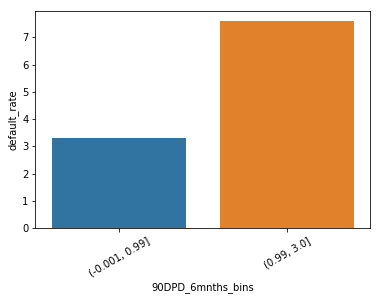

In [97]:
# Bargraph of default rate vs 90DPD_6mnths_bins
ax = sns.barplot(x='90DPD_6mnths_bins', y='default_rate', data=agg_90DPD_6mnths)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate is remarkably high when the customer has 1 or more 90 DPD in last 6 months

In [98]:
# Removing the column 90DPD_6mnths_bins created above for grouping
credit=credit.drop(["90DPD_6mnths_bins"],axis=1)

#### 60DPD_6mnths (No of times 60 DPD or worse in last 6 months) column

In [99]:
# Value count for each 60DPD_6mnths value
credit["60DPD_6mnths"].value_counts()

0    51869
1    11132
2     4916
3     1469
4      411
5       70
Name: 60DPD_6mnths, dtype: int64

In [100]:
# We can group 1,2,3 together and study the default rates
bins = [0,0.99,5]
credit['60DPD_6mnths_bins'] = pd.cut(credit['60DPD_6mnths'], bins, include_lowest=True)

In [101]:
# Count of number of customers for each 60DPD_6mnths value
No_of_cust = credit.groupby('60DPD_6mnths_bins')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each 60DPD_6mnths value
count_default = credit[credit['PerformanceTag']==1].groupby('60DPD_6mnths_bins')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_60DPD_6mnths = No_of_cust.merge(count_default, on='60DPD_6mnths_bins')

# Default rate for each 60DPD_6mnths value
agg_60DPD_6mnths['default_rate'] = 100*(agg_60DPD_6mnths['count_defaults']/agg_60DPD_6mnths['No_of_cust']).round(3)
agg_60DPD_6mnths

,60DPD_6mnths_bins,No_of_cust,count_defaults,default_rate
0,"(-0.001, 0.99]",51869,1582,3.0
1,"(0.99, 5.0]",17998,1366,7.6


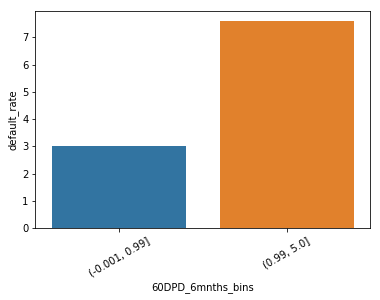

In [102]:
# Bargraph of default rate vs 60DPD_6mnths_bins
ax = sns.barplot(x='60DPD_6mnths_bins', y='default_rate', data=agg_60DPD_6mnths)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate is remarkably high when the customer has 1 or more 60 DPD in last 6 months

In [103]:
# Removing the column 60DPD_6mnths_bins created above for grouping
credit=credit.drop(["60DPD_6mnths_bins"],axis=1)

#### 30DPD_6mnths (No of times 30 DPD or worse in last 6 months) column

In [104]:
# Value count for each 30DPD_6mnths value
credit["30DPD_6mnths"].value_counts()

0    50097
1     9501
2     5898
3     2829
4     1045
5      386
6       96
7       15
Name: 30DPD_6mnths, dtype: int64

In [105]:
# We can group 1-7 together and study the default rates
bins = [0,0.99,7]
credit['30DPD_6mnths_bins'] = pd.cut(credit['30DPD_6mnths'], bins, include_lowest=True)

In [106]:
# Count of number of customers for each 30DPD_6mnths value
No_of_cust = credit.groupby('30DPD_6mnths_bins')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each 30DPD_6mnths value
count_default = credit[credit['PerformanceTag']==1].groupby('30DPD_6mnths_bins')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_30DPD_6mnths = No_of_cust.merge(count_default, on='30DPD_6mnths_bins')

# Default rate for each 30DPD_6mnths value
agg_30DPD_6mnths['default_rate'] = 100*(agg_30DPD_6mnths['count_defaults']/agg_30DPD_6mnths['No_of_cust']).round(3)
agg_30DPD_6mnths

,30DPD_6mnths_bins,No_of_cust,count_defaults,default_rate
0,"(-0.001, 0.99]",50097,1455,2.9
1,"(0.99, 7.0]",19770,1493,7.6


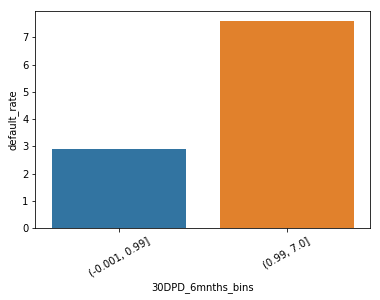

In [107]:
# Bargraph of default rate vs 30DPD_6mnths_bins
ax = sns.barplot(x='30DPD_6mnths_bins', y='default_rate', data=agg_30DPD_6mnths)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate is remarkably high when the customer has 1 or more 30 DPD in last 6 months

In [108]:
# Removing the column 30DPD_6mnths_bins created above for grouping
credit=credit.drop(["30DPD_6mnths_bins"],axis=1)

#### 90DPD_12mnths (No of times 90 DPD or worse in last 12 months) column

In [109]:
# Value count for each 90DPD_12mnths value
credit["90DPD_12mnths"].value_counts()

0    50492
1    11663
2     6160
3     1244
4      272
5       36
Name: 90DPD_12mnths, dtype: int64

In [110]:
# We can group 1-5 together and study the default rates
bins = [0,0.99,5]
credit['90DPD_12mnths_bins'] = pd.cut(credit['90DPD_12mnths'], bins, include_lowest=True)

In [111]:
# Count of number of customers for each 90DPD_12mnths value
No_of_cust = credit.groupby('90DPD_12mnths_bins')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each 90DPD_12mnths value
count_default = credit[credit['PerformanceTag']==1].groupby('90DPD_12mnths_bins')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_90DPD_12mnths = No_of_cust.merge(count_default, on='90DPD_12mnths_bins')

# Default rate for each 90DPD_12mnths value
agg_90DPD_12mnths['default_rate'] = 100*(agg_90DPD_12mnths['count_defaults']/agg_90DPD_12mnths['No_of_cust']).round(3)
agg_90DPD_12mnths

,90DPD_12mnths_bins,No_of_cust,count_defaults,default_rate
0,"(-0.001, 0.99]",50492,1510,3.0
1,"(0.99, 5.0]",19375,1438,7.4


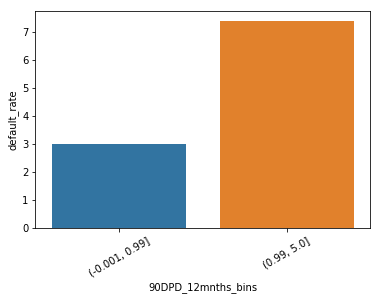

In [112]:
# Bargraph of default rate vs 90DPD_12mnths_bins
ax = sns.barplot(x='90DPD_12mnths_bins', y='default_rate', data=agg_90DPD_12mnths)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate is remarkably high when the customer has 1 or more 90 DPD in last 12 months

In [113]:
# Removing the column 90DPD_12mnths_bins created above for grouping
credit=credit.drop(["90DPD_12mnths_bins"],axis=1)

#### 60DPD_12mnths (No of times 60 DPD or worse in last 12 months) column

In [114]:
# Value count for each 60DPD_12mnths value
credit["60DPD_12mnths"].value_counts()

0    45867
1    12816
2     6415
3     3205
4     1048
5      398
6      111
7        7
Name: 60DPD_12mnths, dtype: int64

In [115]:
# We can group 1-7 together and study the default rates
bins = [0,0.99,7]
credit['60DPD_12mnths_bins'] = pd.cut(credit['60DPD_12mnths'], bins, include_lowest=True)

In [116]:
# Count of number of customers for each 60DPD_12mnths value
No_of_cust = credit.groupby('60DPD_12mnths_bins')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each 60DPD_12mnths value
count_default = credit[credit['PerformanceTag']==1].groupby('60DPD_12mnths_bins')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_60DPD_12mnths = No_of_cust.merge(count_default, on='60DPD_12mnths_bins')

# Default rate for each 60DPD_12mnths value
agg_60DPD_12mnths['default_rate'] = 100*(agg_60DPD_12mnths['count_defaults']/agg_60DPD_12mnths['No_of_cust']).round(3)
agg_60DPD_12mnths

,60DPD_12mnths_bins,No_of_cust,count_defaults,default_rate
0,"(-0.001, 0.99]",45867,1378,3.0
1,"(0.99, 7.0]",24000,1570,6.5


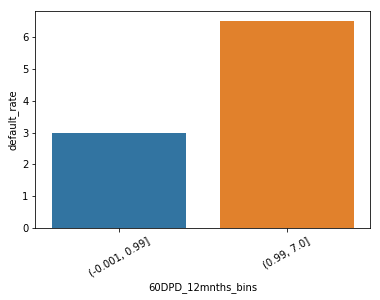

In [117]:
# Bargraph of default rate vs 60DPD_12mnths_bins
ax = sns.barplot(x='60DPD_12mnths_bins', y='default_rate', data=agg_60DPD_12mnths)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate is remarkably high when the customer has 1 or more 60 DPD in last 12 months

In [118]:
# Removing the column 60DPD_12mnths_bins created above for grouping
credit=credit.drop(["60DPD_12mnths_bins"],axis=1)

#### 30DPD_12mnths (No of times 30 DPD or worse in last 12 months) column

In [119]:
# Value count for each 30DPD_12mnths value
credit["30DPD_12mnths"].value_counts()

0    44856
1    11474
2     6117
3     4136
4     1924
5      853
6      376
7      107
8       23
9        1
Name: 30DPD_12mnths, dtype: int64

In [120]:
# We can group 1-9 together and study the default rates
bins = [0,0.99,9]
credit['30DPD_12mnths_bins'] = pd.cut(credit['30DPD_12mnths'], bins, include_lowest=True)

In [121]:
# Count of number of customers for each 30DPD_12mnths value
No_of_cust = credit.groupby('30DPD_12mnths_bins')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each 30DPD_12mnths value
count_default = credit[credit['PerformanceTag']==1].groupby('30DPD_12mnths_bins')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_30DPD_12mnths = No_of_cust.merge(count_default, on='30DPD_12mnths_bins')

# Default rate for each 30DPD_12mnths value
agg_30DPD_12mnths['default_rate'] = 100*(agg_30DPD_12mnths['count_defaults']/agg_30DPD_12mnths['No_of_cust']).round(3)
agg_30DPD_12mnths

,30DPD_12mnths_bins,No_of_cust,count_defaults,default_rate
0,"(-0.001, 0.99]",44856,1316,2.9
1,"(0.99, 9.0]",25011,1632,6.5


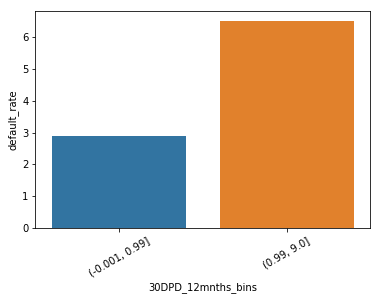

In [122]:
# Bargraph of default rate vs 30DPD_12mnths_bins
ax = sns.barplot(x='30DPD_12mnths_bins', y='default_rate', data=agg_30DPD_12mnths)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate is remarkably high when the customer has 1 or more 30 DPD in last 12 months

In [123]:
# Removing the column 30DPD_12mnths_bins created above for grouping
credit=credit.drop(["30DPD_12mnths_bins"],axis=1)

#### AvgCC_12mnths (Avgas CC Utilization in last 12 months) column

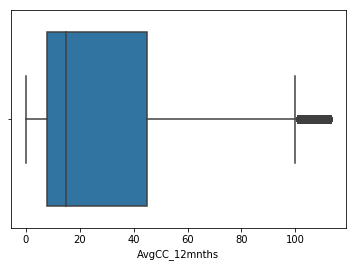

In [124]:
# Boxplot to visualize outliers in AvgCC_12mnths column
sns.boxplot(x="AvgCC_12mnths",data=credit)
plt.show()

In [125]:
# Inspecting spread of the values in AvgCC_12mnths column
credit["AvgCC_12mnths"].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

count    68844.000000
mean        29.265194
std         29.515980
min          0.000000
5%           3.000000
10%          5.000000
25%          8.000000
50%         15.000000
75%         45.000000
90%         72.000000
95%        104.000000
99%        113.000000
max        113.000000
Name: AvgCC_12mnths, dtype: float64

In [126]:
# We can group 1-7 together and study the default rates
bins = [0,5,8,12,20,40,60,113]
credit['AvgCC_12mnths_bins'] = pd.cut(credit['AvgCC_12mnths'], bins, include_lowest=True)

In [127]:
# Count of number of customers for each AvgCC_12mnths group(bin)
No_of_cust = credit.groupby('AvgCC_12mnths_bins')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each AvgCC_12mnths group(bin)
count_default = credit[credit['PerformanceTag']==1].groupby('AvgCC_12mnths_bins')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_AvgCC_12mnths = No_of_cust.merge(count_default, on='AvgCC_12mnths_bins')

# Default rate for each AvgCC_12mnths group(bin)
agg_AvgCC_12mnths['default_rate'] = 100*(agg_AvgCC_12mnths['count_defaults']/agg_AvgCC_12mnths['No_of_cust']).round(3)
agg_AvgCC_12mnths

,AvgCC_12mnths_bins,No_of_cust,count_defaults,default_rate
0,"(-0.001, 5.0]",8021,145,1.8
1,"(5.0, 8.0]",9843,202,2.1
2,"(8.0, 12.0]",12160,272,2.2
3,"(12.0, 20.0]",10206,358,3.5
4,"(20.0, 40.0]",9173,589,6.4
5,"(40.0, 60.0]",9033,664,7.4
6,"(60.0, 113.0]",10408,670,6.4


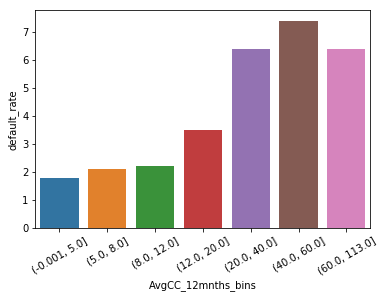

In [128]:
# Bargraph of default rate vs AvgCC_12mnths_bins
ax = sns.barplot(x='AvgCC_12mnths_bins', y='default_rate', data=agg_AvgCC_12mnths)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate is increasing as the average Credit card utilisation in last 12 months increases.

In [129]:
# Removing the column AvgCC_12mnths_bins created above for grouping
credit=credit.drop(["AvgCC_12mnths_bins"],axis=1)

#### Trades_6mnths (No of trades opened in last 6 months) column

In [130]:
# Value count for each Trades_6mnths value
credit["Trades_6mnths"].value_counts()

1.0     20121
0.0     12193
2.0     12116
3.0      9403
4.0      6297
5.0      3665
6.0      2336
7.0      1649
8.0      1154
9.0       618
10.0      238
11.0       65
12.0       11
Name: Trades_6mnths, dtype: int64

In [131]:
# We can group them together and study the default rates
bins = [0,0.99,1.99,2.99,4.99,12]
credit['Trades_6mnths_bin'] = pd.cut(credit['Trades_6mnths'], bins, include_lowest=True)

In [132]:
# Count of number of customers for each Trades_6mnths value
No_of_cust = credit.groupby('Trades_6mnths_bin')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each Trades_6mnths value
count_default = credit[credit['PerformanceTag']==1].groupby('Trades_6mnths_bin')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_trades_6mnths = No_of_cust.merge(count_default, on='Trades_6mnths_bin')

# Default rate for each Trades_6mnths value
agg_trades_6mnths['default_rate'] = 100*(agg_trades_6mnths['count_defaults']/agg_trades_6mnths['No_of_cust']).round(3)
agg_trades_6mnths

,Trades_6mnths_bin,No_of_cust,count_defaults,default_rate
0,"(-0.001, 0.99]",12193,272,2.2
1,"(0.99, 1.99]",20121,534,2.7
2,"(1.99, 2.99]",12116,639,5.3
3,"(2.99, 4.99]",15700,1035,6.6
4,"(4.99, 12.0]",9736,468,4.8


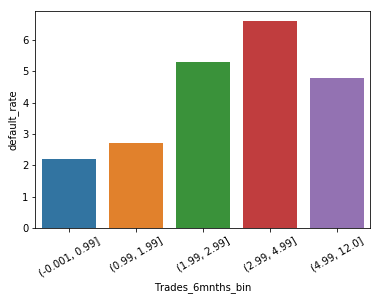

In [133]:
# Bargraph of default rate vs Trades_6mnths_bin
ax = sns.barplot(x='Trades_6mnths_bin', y='default_rate', data=agg_trades_6mnths)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate is remarkably high when the customer has 3 or 2 trades in the last 6 months

In [134]:
# Removing the column Trades_6mnths_bin created above for grouping
credit=credit.drop(["Trades_6mnths_bin"],axis=1)

#### Trades_12mnths (No of trades opened in last 12 months) column

In [135]:
# Value count for each Trades_12mnths value
credit["Trades_12mnths"].value_counts()

1     11377
2      9323
0      4955
4      4850
3      4678
5      4548
6      4206
7      4091
8      3799
9      3376
10     2816
11     2179
12     1704
13     1372
14     1114
15     1068
16      992
17      860
18      736
19      612
20      434
21      308
22      218
23      121
24       73
25       34
26       11
27        9
28        3
Name: Trades_12mnths, dtype: int64

In [136]:
# We can group them together and study the default rates
bins = [0,1,2,3,5,7,9,13,28]
credit['Trades_12mnths_bin'] = pd.cut(credit['Trades_12mnths'], bins, include_lowest=True)

In [137]:
# Count of number of customers for each Trades_12mnths value
No_of_cust = credit.groupby('Trades_12mnths_bin')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each Trades_12mnths value
count_default = credit[credit['PerformanceTag']==1].groupby('Trades_12mnths_bin')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_trades_12mnths = No_of_cust.merge(count_default, on='Trades_12mnths_bin')

# Default rate for each Trades_12mnths value
agg_trades_12mnths['default_rate']=100*(agg_trades_12mnths['count_defaults']/agg_trades_12mnths['No_of_cust']).round(3)
agg_trades_12mnths

,Trades_12mnths_bin,No_of_cust,count_defaults,default_rate
0,"(-0.001, 1.0]",16332,289,1.8
1,"(1.0, 2.0]",9323,178,1.9
2,"(2.0, 3.0]",4678,198,4.2
3,"(3.0, 5.0]",9398,441,4.7
4,"(5.0, 7.0]",8297,535,6.4
5,"(7.0, 9.0]",7175,519,7.2
6,"(9.0, 13.0]",8071,524,6.5
7,"(13.0, 28.0]",6593,264,4.0


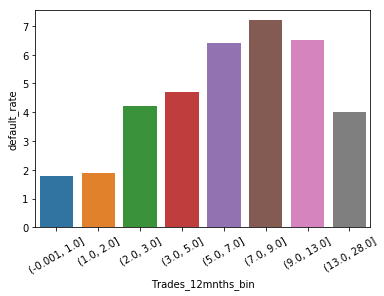

In [138]:
# Bargraph of default rate vs Trades_12mnths_bin
ax = sns.barplot(x='Trades_12mnths_bin', y='default_rate', data=agg_trades_12mnths)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate increases as the no. of trades in the last 12 mnths increases till 9 and then decreases

In [139]:
# Removing the column Trades_12mnths_bin created above for grouping
credit=credit.drop(["Trades_12mnths_bin"],axis=1)

#### PLTrades_6mnths (No of PL trades opened in last 6 months) column

In [140]:
# Value count for each PLTrades_6mnths value
credit["PLTrades_6mnths"].value_counts()

0    31079
1    13547
2    12565
3     7949
4     3341
5     1090
6      296
Name: PLTrades_6mnths, dtype: int64

In [141]:
# We can group them together and study the default rates
bins = [0,0.99,6]
credit['PLTrades_6mnths_bin'] = pd.cut(credit['PLTrades_6mnths'], bins, include_lowest=True)

In [142]:
# Count of number of customers for each PLTrades_6mnths value
No_of_cust = credit.groupby('PLTrades_6mnths_bin')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each PLTrades_6mnths value
count_default = credit[credit['PerformanceTag']==1].groupby('PLTrades_6mnths_bin')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_PLTrades_6mnths = No_of_cust.merge(count_default, on='PLTrades_6mnths_bin')

# Default rate for each PLTrades_6mnths value
agg_PLTrades_6mnths['default_rate']=100*(agg_PLTrades_6mnths['count_defaults']/agg_PLTrades_6mnths['No_of_cust']).round(3)
agg_PLTrades_6mnths

,PLTrades_6mnths_bin,No_of_cust,count_defaults,default_rate
0,"(-0.001, 0.99]",31079,699,2.2
1,"(0.99, 6.0]",38788,2249,5.8


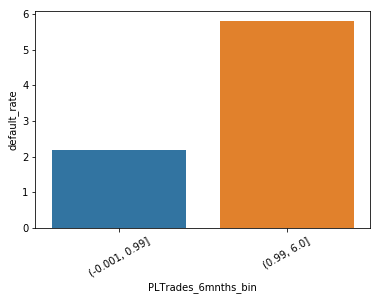

In [143]:
# Bargraph of default rate vs PLTrades_6mnths_bin
ax = sns.barplot(x='PLTrades_6mnths_bin', y='default_rate', data=agg_PLTrades_6mnths)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate is significantly high for more than 1 number of PLTrades in last 6 months.

In [144]:
# Removing the column PLTrades_6mnths_bin created above for grouping
credit=credit.drop(["PLTrades_6mnths_bin"],axis=1)

#### PLTrades_12mnths (No of PL trades opened in last 12 months) column

In [145]:
# Value count for each PLTrades_12mnths value
credit["PLTrades_12mnths"].value_counts()

0     25823
3      8131
4      7903
2      6830
1      6641
5      6189
6      4023
7      2223
8      1172
9       601
10      255
11       66
12       10
Name: PLTrades_12mnths, dtype: int64

In [146]:
# We can group them together and study the default rates
bins = [0,0.99,3.99,12]
credit['PLTrades_12mnths_bin'] = pd.cut(credit['PLTrades_12mnths'], bins, include_lowest=True)

In [147]:
# Count of number of customers for each PLTrades_12mnths value
No_of_cust = credit.groupby('PLTrades_12mnths_bin')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each PLTrades_12mnths value
count_default = credit[credit['PerformanceTag']==1].groupby('PLTrades_12mnths_bin')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_PLTrades_12mnths = No_of_cust.merge(count_default, on='PLTrades_12mnths_bin')

# Default rate for each PLTrades_12mnths value
agg_PLTrades_12mnths['default_rate']=100*(agg_PLTrades_12mnths['count_defaults']/agg_PLTrades_12mnths['No_of_cust']).round(3)
agg_PLTrades_12mnths

,PLTrades_12mnths_bin,No_of_cust,count_defaults,default_rate
0,"(-0.001, 0.99]",25823,457,1.8
1,"(0.99, 3.99]",21602,1121,5.2
2,"(3.99, 12.0]",22442,1370,6.1


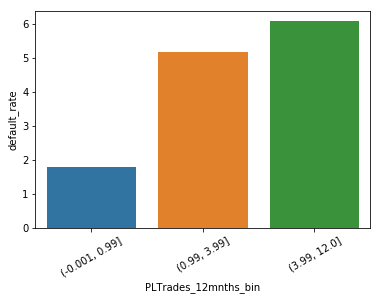

In [148]:
# Bargraph of default rate vs PLTrades_12mnths_bin
ax = sns.barplot(x='PLTrades_12mnths_bin', y='default_rate', data=agg_PLTrades_12mnths)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate increases as the no. of PLtrades in the last 12 mnths increases.

In [149]:
# Removing the column PLTrades_12mnths_bin created above for grouping
credit=credit.drop(["PLTrades_12mnths_bin"],axis=1)

#### Inquiries_6mnths (No of Inquiries in last 6 months (excluding home & auto loans)) column

In [150]:
# Value count for each Inquiries_6mnths value
credit["Inquiries_6mnths"].value_counts()

0     25068
1     13176
2     12832
3      7257
4      4248
5      3019
6      1750
7      1149
8       835
9       425
10      108
Name: Inquiries_6mnths, dtype: int64

In [151]:
# We can group them together and study the default rates
bins = [0,0.99,2,10]
credit['Inquiries_6mnths_bin'] = pd.cut(credit['Inquiries_6mnths'], bins, include_lowest=True)

In [152]:
# Count of number of customers for each Inquiries_6mnths value
No_of_cust = credit.groupby('Inquiries_6mnths_bin')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each Inquiries_6mnths value
count_default = credit[credit['PerformanceTag']==1].groupby('Inquiries_6mnths_bin')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_Inquiries_6mnths = No_of_cust.merge(count_default, on='Inquiries_6mnths_bin')

# Default rate for each Inquiries_6mnths value
agg_Inquiries_6mnths['default_rate']=100*(agg_Inquiries_6mnths['count_defaults']/agg_Inquiries_6mnths['No_of_cust'])\
                                            .round(3)
agg_Inquiries_6mnths

,Inquiries_6mnths_bin,No_of_cust,count_defaults,default_rate
0,"(-0.001, 0.99]",25068,527,2.1
1,"(0.99, 2.0]",26008,1324,5.1
2,"(2.0, 10.0]",18791,1097,5.8


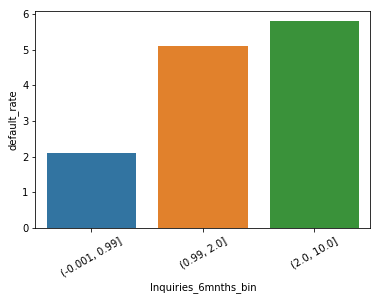

In [153]:
# Bargraph of default rate vs Inquiries_6mnths_bin
ax = sns.barplot(x='Inquiries_6mnths_bin', y='default_rate', data=agg_Inquiries_6mnths)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate increases as the no. of Inquiries in the last 6 mnths increases.

In [154]:
# Removing the column Inquiries_6mnths_bin created above for grouping
credit=credit.drop(["Inquiries_6mnths_bin"],axis=1)

#### Inquiries_12mnths (No of Inquiries in last 12 months (excluding home & auto loans)) column

In [155]:
# Value count for each Inquiries_12mnths value
credit["Inquiries_12mnths"].value_counts()

0     20580
3      8979
2      7907
4      7113
5      4926
1      3899
6      3615
7      2992
8      2345
9      1777
10     1508
11     1231
12      936
13      789
14      553
15      360
16      212
17       97
18       40
19        6
20        2
Name: Inquiries_12mnths, dtype: int64

In [156]:
# We can group them together and study the default rates
bins = [0,0.99,3,20]
credit['Inquiries_12mnths_bin'] = pd.cut(credit['Inquiries_12mnths'], bins, include_lowest=True)

In [157]:
# Count of number of customers for each Inquiries_12mnths value
No_of_cust = credit.groupby('Inquiries_12mnths_bin')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each Inquiries_12mnths value
count_default = credit[credit['PerformanceTag']==1].groupby('Inquiries_12mnths_bin')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_Inquiries_12mnths = No_of_cust.merge(count_default, on='Inquiries_12mnths_bin')

# Default rate for each Inquiries_12mnths value
agg_Inquiries_12mnths['default_rate']=100*(agg_Inquiries_12mnths['count_defaults']/agg_Inquiries_12mnths['No_of_cust'])\
                                            .round(3)
agg_Inquiries_12mnths

,Inquiries_12mnths_bin,No_of_cust,count_defaults,default_rate
0,"(-0.001, 0.99]",20580,307,1.5
1,"(0.99, 3.0]",20785,981,4.7
2,"(3.0, 20.0]",28502,1660,5.8


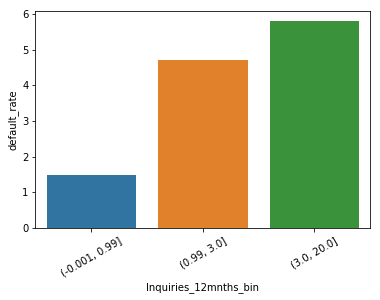

In [158]:
# Bargraph of default rate vs Inquiries_12mnths_bin
ax = sns.barplot(x='Inquiries_12mnths_bin', y='default_rate', data=agg_Inquiries_12mnths)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate increases as the no. of Inquiries in the last 12 mnths increases.

In [159]:
# Removing the column Inquiries_12mnths_bin created above for grouping
credit=credit.drop(["Inquiries_12mnths_bin"],axis=1)

#### OpenHomeLoan (Presence of open home loan) column

In [160]:
# Value count for each OpenHomeLoan value
credit["OpenHomeLoan"].value_counts()

0.0    51524
1.0    18071
Name: OpenHomeLoan, dtype: int64

In [161]:
# Count of number of customers for each OpenHomeLoan value
No_of_cust = credit.groupby('OpenHomeLoan')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each OpenHomeLoan value
count_default = credit[credit['PerformanceTag']==1].groupby('OpenHomeLoan')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_OpenHomeLoan = No_of_cust.merge(count_default, on='OpenHomeLoan')

# Default rate for each OpenHomeLoan value
agg_OpenHomeLoan['default_rate']=100*(agg_OpenHomeLoan['count_defaults']/agg_OpenHomeLoan['No_of_cust']).round(3)
agg_OpenHomeLoan

,OpenHomeLoan,No_of_cust,count_defaults,default_rate
0,0.0,51524,2333,4.5
1,1.0,18071,607,3.4


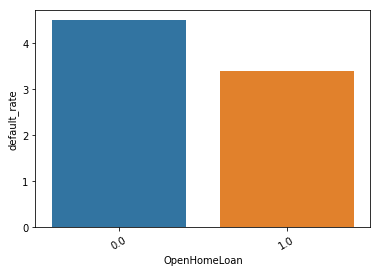

In [162]:
# Bargraph of default rate vs OpenHomeLoan
ax = sns.barplot(x='OpenHomeLoan', y='default_rate', data=agg_OpenHomeLoan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The customers who do not have a Open Home loan are more likely to default.

#### OutstandingBalance (Outstanding Balance) column

In [163]:
# Inspecting spread of the values in OutstandingBalance column
credit["OutstandingBalance"].describe()

count    6.959500e+04
mean     1.253380e+06
std      1.286175e+06
min      0.000000e+00
25%      2.084110e+05
50%      7.742410e+05
75%      2.926238e+06
max      5.218801e+06
Name: OutstandingBalance, dtype: float64

In [164]:
maxob = credit["OutstandingBalance"].max()

In [165]:
# We can group them together and study the default rates
bins = [0,10000,250000,600000,1000000,3000000, maxob]
credit['OutstandingBalance_bin'] = pd.cut(credit['OutstandingBalance'], bins, include_lowest=True)

In [166]:
# Count of number of customers for each OutstandingBalance value
No_of_cust = credit.groupby('OutstandingBalance_bin')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each OutstandingBalance value
count_default = credit[credit['PerformanceTag']==1].groupby('OutstandingBalance_bin')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_OutstandingBalance = No_of_cust.merge(count_default, on='OutstandingBalance_bin')

# Default rate for each OutstandingBalance value
agg_OutstandingBalance['default_rate']=100*(agg_OutstandingBalance['count_defaults']/\
                                            agg_OutstandingBalance['No_of_cust']).round(3)
agg_OutstandingBalance

,OutstandingBalance_bin,No_of_cust,count_defaults,default_rate
0,"(-0.001, 10000.0]",9007,170,1.9
1,"(10000.0, 250000.0]",10070,254,2.5
2,"(250000.0, 600000.0]",9926,535,5.4
3,"(600000.0, 1000000.0]",14230,893,6.3
4,"(1000000.0, 3000000.0]",16497,611,3.7
5,"(3000000.0, 5218801.0]",9865,477,4.8


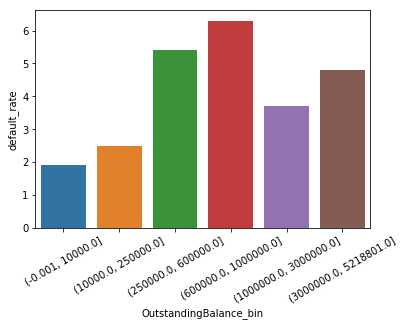

In [167]:
# Bargraph of default rate vs OutstandingBalance_bin
ax = sns.barplot(x='OutstandingBalance_bin', y='default_rate', data=agg_OutstandingBalance)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate increases with increase in the outstanding balance but falls if the outstandng balance is greater than 10000k.

In [168]:
# Removing the column OutstandingBalance_bin created above for grouping
credit=credit.drop(["OutstandingBalance_bin"],axis=1)

#### TotalTrades (Total No of Trades) column

In [169]:
# Value count for each TotalTrades value
credit["TotalTrades"].value_counts()

3     8615
4     7490
2     6765
5     5714
6     4967
7     4828
8     4533
9     3906
10    3227
1     2926
11    2503
12    1831
13    1148
0      988
25     730
14     712
23     698
22     693
21     671
24     668
26     639
20     614
27     578
19     538
28     479
15     473
18     443
16     432
29     420
17     396
30     339
31     272
32     199
33     149
34     103
35      71
36      48
37      29
38      11
39       9
40       7
43       2
41       1
42       1
44       1
Name: TotalTrades, dtype: int64

In [170]:
# We can group them together and study the default rates
bins = [0,2,3,4,6,8,12,44]
credit['TotalTrades_bin'] = pd.cut(credit['TotalTrades'], bins, include_lowest=True)

In [171]:
# Count of number of customers for each TotalTrades value
No_of_cust = credit.groupby('TotalTrades_bin')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each TotalTrades value
count_default = credit[credit['PerformanceTag']==1].groupby('TotalTrades_bin')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_TotalTrades = No_of_cust.merge(count_default, on='TotalTrades_bin')

# Default rate for each TotalTrades value
agg_TotalTrades['default_rate']=100*(agg_TotalTrades['count_defaults']/agg_TotalTrades['No_of_cust']).round(3)
agg_TotalTrades

,TotalTrades_bin,No_of_cust,count_defaults,default_rate
0,"(-0.001, 2.0]",10679,192,1.8
1,"(2.0, 3.0]",8615,184,2.1
2,"(3.0, 4.0]",7490,205,2.7
3,"(4.0, 6.0]",10681,468,4.4
4,"(6.0, 8.0]",9361,566,6.0
5,"(8.0, 12.0]",11467,808,7.0
6,"(12.0, 44.0]",11574,525,4.5


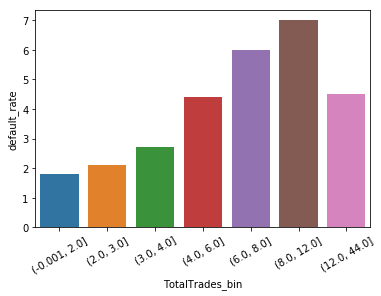

In [172]:
# Bargraph of default rate vs TotalTrades_bin
ax = sns.barplot(x='TotalTrades_bin', y='default_rate', data=agg_TotalTrades)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate increases with increase in the Total Trades but falls for higher no. of trades.

In [173]:
# Removing the column TotalTrades_bin created above for grouping
credit=credit.drop(["TotalTrades_bin"],axis=1)

#### OpenAutoLoan (Presence of open auto loan) column

In [174]:
# Value count for each OpenAutoLoan value
credit["OpenAutoLoan"].value_counts()

0    63938
1     5929
Name: OpenAutoLoan, dtype: int64

In [175]:
# Count of number of customers for each OpenAutoLoan value
No_of_cust = credit.groupby('OpenAutoLoan')['PerformanceTag'].count().reset_index(name = 'No_of_cust')

# Count of defaults for each OpenAutoLoan value
count_default = credit[credit['PerformanceTag']==1].groupby('OpenAutoLoan')['PerformanceTag'].count()\
                                                            .reset_index(name = 'count_defaults')

# Merging both dataframe
agg_OpenAutoLoan = No_of_cust.merge(count_default, on='OpenAutoLoan')

# Default rate for each OpenAutoLoan value
agg_OpenAutoLoan['default_rate']=100*(agg_OpenAutoLoan['count_defaults']/agg_OpenAutoLoan['No_of_cust']).round(3)
agg_OpenAutoLoan

,OpenAutoLoan,No_of_cust,count_defaults,default_rate
0,0,63938,2729,4.3
1,1,5929,219,3.7


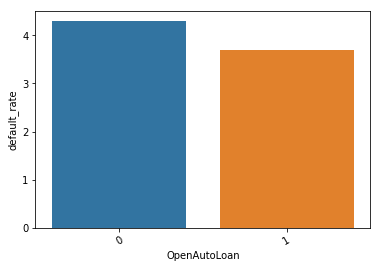

In [176]:
# Bargraph of default rate vs 90DPD_6mnths_bins
ax = sns.barplot(x='OpenAutoLoan', y='default_rate', data=agg_OpenAutoLoan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The default rate is higher for customers with no OpenAutoLoan

__Data Cleaning and EDA of Credit Bureau Data completed here__

### <span style="color:blue">4. Data Preparation</span>

#### Calculating WOE and IV for variables in Credit bureau data

In [177]:
# Executing function to get WOE and IV values for credit bureau data
final_credit_iv, credit_IV = data_vars(credit,credit.PerformanceTag)
final_credit_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,90DPD_6mnths,0.0,1.0,67883,2765.0,4.073185,65118.0,95.926815,0.937924,0.973087,0.037,0.030
1,90DPD_6mnths,2.0,3.0,1984,183.0,9.223790,1801.0,90.776210,0.062076,0.026913,-0.836,0.030
2,60DPD_6mnths,0.0,1.0,63001,2366.0,3.755496,60635.0,96.244504,0.802578,0.906095,0.121,0.090
3,60DPD_6mnths,2.0,5.0,6866,582.0,8.476551,6284.0,91.523449,0.197422,0.093905,-0.743,0.090
4,30DPD_6mnths,0.0,1.0,59598,2078.0,3.486694,57520.0,96.513306,0.704885,0.859547,0.198,0.146
5,30DPD_6mnths,2.0,7.0,10269,870.0,8.472100,9399.0,91.527900,0.295115,0.140453,-0.742,0.146
6,90DPD_12mnths,0.0,1.0,62155,2306.0,3.710080,59849.0,96.289920,0.782225,0.894350,0.134,0.096
7,90DPD_12mnths,2.0,5.0,7712,642.0,8.324689,7070.0,91.675311,0.217775,0.105650,-0.723,0.096
8,60DPD_12mnths,0.0,1.0,58683,2041.0,3.478009,56642.0,96.521991,0.692334,0.846426,0.201,0.138
9,60DPD_12mnths,2.0,7.0,11184,907.0,8.109800,10277.0,91.890200,0.307666,0.153574,-0.695,0.138


In [178]:
# Sorting the results based on IV values
credit_IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
6,AvgCC_12mnths,0.294
15,Trades_12mnths,0.258
7,Inquiries_12mnths,0.230
14,TotalTrades,0.190
0,30DPD_12mnths,0.189
12,PLTrades_12mnths,0.176
1,30DPD_6mnths,0.146
2,60DPD_12mnths,0.138
13,PLTrades_6mnths,0.125
4,90DPD_12mnths,0.096


- AvgCC_12mnths, Trades_12mnths, Inquiries_12mnths, TotalTrades, 30DPD_12mnths, PLTrades_12mnths, 30DPD_6mnths, 60DPD_12mnths and PLTrades_6mnths have medium predictive power
- 90DPD_12mnths, Trades_6mnths, Inquiries_6mnths, 60DPD_6mnths 	and 90DPD_6mnths have weak predictive power
- OutstandingBalance, OpenAutoLoan and OpenHomeLoan is not useful for analysis

#### Apply WOE values to the dataframe

In [179]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 71294
Data columns (total 18 columns):
90DPD_6mnths          69867 non-null int64
60DPD_6mnths          69867 non-null int64
30DPD_6mnths          69867 non-null int64
90DPD_12mnths         69867 non-null int64
60DPD_12mnths         69867 non-null int64
30DPD_12mnths         69867 non-null int64
AvgCC_12mnths         68844 non-null float64
Trades_6mnths         69866 non-null float64
Trades_12mnths        69867 non-null int64
PLTrades_6mnths       69867 non-null int64
PLTrades_12mnths      69867 non-null int64
Inquiries_6mnths      69867 non-null int64
Inquiries_12mnths     69867 non-null int64
OpenHomeLoan          69595 non-null float64
OutstandingBalance    69595 non-null float64
TotalTrades           69867 non-null int64
OpenAutoLoan          69867 non-null int64
PerformanceTag        69867 non-null float64
dtypes: float64(5), int64(13)
memory usage: 10.1 MB


In [180]:
# Extracting the data where columns having datatype other than Object
data_num_credit=credit.select_dtypes(exclude=['object'])
data_num_credit.head()

,90DPD_6mnths,60DPD_6mnths,30DPD_6mnths,90DPD_12mnths,60DPD_12mnths,30DPD_12mnths,AvgCC_12mnths,Trades_6mnths,Trades_12mnths,PLTrades_6mnths,PLTrades_12mnths,Inquiries_6mnths,Inquiries_12mnths,OpenHomeLoan,OutstandingBalance,TotalTrades,OpenAutoLoan,PerformanceTag
0,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [181]:
# Extracting column list of numeric variables except target(PerformanceTag) column
numeric_list=data_num_credit.columns.difference(['PerformanceTag'])
numeric_list

Index(['30DPD_12mnths', '30DPD_6mnths', '60DPD_12mnths', '60DPD_6mnths',
       '90DPD_12mnths', '90DPD_6mnths', 'AvgCC_12mnths', 'Inquiries_12mnths',
       'Inquiries_6mnths', 'OpenAutoLoan', 'OpenHomeLoan',
       'OutstandingBalance', 'PLTrades_12mnths', 'PLTrades_6mnths',
       'TotalTrades', 'Trades_12mnths', 'Trades_6mnths'],
      dtype='object')

#### Insert WOE values for numeric variables

In [182]:
# Executing function to insert WOE values for numeric variables into base dataframe
insert_woe_numeric(credit, final_credit_iv)

In [183]:
# Inspecting dataframe after inserting WOE values for numeric variables
credit.head()

,90DPD_6mnths,60DPD_6mnths,30DPD_6mnths,90DPD_12mnths,60DPD_12mnths,30DPD_12mnths,AvgCC_12mnths,Trades_6mnths,Trades_12mnths,PLTrades_6mnths,...,WOE_Inquiries_12mnths,WOE_Inquiries_6mnths,WOE_OpenAutoLoan,WOE_OpenHomeLoan,WOE_OutstandingBalance,WOE_PLTrades_12mnths,WOE_PLTrades_6mnths,WOE_TotalTrades,WOE_Trades_12mnths,WOE_Trades_6mnths
0,0,0,0,0,0,0,4.0,1.0,2,0,...,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
1,0,0,0,0,0,0,3.0,1.0,2,0,...,0.829,0.32,-0.012,-0.001,0.093,0.453,0.314,-0.211,0.865,0.271
2,0,0,0,0,0,0,7.0,0.0,0,0,...,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
3,0,0,0,0,0,0,11.0,1.0,1,0,...,0.829,0.32,0.139,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
4,0,0,0,0,0,0,12.0,0.0,1,0,...,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271


#### Validating insertion of WOE values in dataframe

In [184]:
# Count of values in OpenAutoLoan column having original values
credit['OpenAutoLoan'].value_counts()

0    63938
1     5929
Name: OpenAutoLoan, dtype: int64

In [185]:
# Count of values in WOE_OpenAutoLoan column having woe values
credit['WOE_OpenAutoLoan'].value_counts()

-0.012    63938
 0.139     5929
Name: WOE_OpenAutoLoan, dtype: int64

In [186]:
small_df = final_credit_iv[final_credit_iv['VAR_NAME'] == 'OpenAutoLoan']
small_df

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
40,OpenAutoLoan,0.0,0.0,63938,2729.0,4.268197,61209.0,95.731803,0.925712,0.914673,-0.012,0.002
41,OpenAutoLoan,1.0,1.0,5929,219.0,3.693709,5710.0,96.306291,0.074288,0.085327,0.139,0.002


In [187]:
# List of column to drop
drop_list1=numeric_list
print("List of column to drop:",drop_list1)

# Creating dataframe that contains only column having WOE values
credit_df=credit.drop(drop_list1,axis=1)
credit_df.head()

List of column to drop: Index(['30DPD_12mnths', '30DPD_6mnths', '60DPD_12mnths', '60DPD_6mnths',
       '90DPD_12mnths', '90DPD_6mnths', 'AvgCC_12mnths', 'Inquiries_12mnths',
       'Inquiries_6mnths', 'OpenAutoLoan', 'OpenHomeLoan',
       'OutstandingBalance', 'PLTrades_12mnths', 'PLTrades_6mnths',
       'TotalTrades', 'Trades_12mnths', 'Trades_6mnths'],
      dtype='object')


,PerformanceTag,WOE_30DPD_12mnths,WOE_30DPD_6mnths,WOE_60DPD_12mnths,WOE_60DPD_6mnths,WOE_90DPD_12mnths,WOE_90DPD_6mnths,WOE_AvgCC_12mnths,WOE_Inquiries_12mnths,WOE_Inquiries_6mnths,WOE_OpenAutoLoan,WOE_OpenHomeLoan,WOE_OutstandingBalance,WOE_PLTrades_12mnths,WOE_PLTrades_6mnths,WOE_TotalTrades,WOE_Trades_12mnths,WOE_Trades_6mnths
0,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.799,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
1,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.799,0.829,0.32,-0.012,-0.001,0.093,0.453,0.314,-0.211,0.865,0.271
2,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.799,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
3,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.575,0.829,0.32,0.139,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
4,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.575,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271


__<span style="color:red">credit_df dataframe contains WOE values</span> and will be used further for Model Building__

# Step 3: Model Building on Demographic Data

## <span style="color:blue">Logistic Regression</span>

In [188]:
# Inspecting customer(demographic) dataframe that has only WOE values
cust_df.head(2)

,PerformanceTag,WOE_Age,WOE_Income,WOE_MnthsCompany,WOE_MnthsResidence,WOE_NoDependents,WOE_Gender,WOE_MaritalStatus,WOE_Education,WOE_Profession,WOE_ResidenceType
0,0.0,0.008,0.243,0.123,-0.207,-0.005,-0.032,0.004,-0.017,0.029,0.004
1,0.0,-0.032,0.263,0.072,-0.207,0.010,0.010,0.004,0.018,0.014,0.004


In [189]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = cust_df.drop(['PerformanceTag'], axis=1)
X.head()

,WOE_Age,WOE_Income,WOE_MnthsCompany,WOE_MnthsResidence,WOE_NoDependents,WOE_Gender,WOE_MaritalStatus,WOE_Education,WOE_Profession,WOE_ResidenceType
0,0.008,0.243,0.123,-0.207,-0.005,-0.032,0.004,-0.017,0.029,0.004
1,-0.032,0.263,0.072,-0.207,0.010,0.010,0.004,0.018,0.014,0.004
2,-0.032,0.263,0.072,-0.207,-0.005,0.010,-0.023,-0.017,0.014,0.004
3,0.008,0.263,0.123,-0.207,-0.005,0.010,0.004,-0.017,-0.092,0.004
4,-0.032,0.243,0.072,-0.207,0.010,-0.032,0.004,0.018,0.029,0.004


In [190]:
# Putting response variable to y
y = cust_df['PerformanceTag']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: PerformanceTag, dtype: float64

In [191]:
y.value_counts()*100/y.count()

0.0    95.780554
1.0     4.219446
Name: PerformanceTag, dtype: float64

Since the class is highly imbalanced we need to implement class balancing.

In [192]:
# Importing LogisticRegression and metrics from sklearn library
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,StratifiedKFold

#### Train-test split

In [193]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [194]:
# Running Logistic Regression with class_weight parameter to handle class imbalance
logreg = LogisticRegression(class_weight="balanced")

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Prediction on train data

In [195]:
# predict default on train data
y_pred = logreg.predict(X_train)

# create confusion matrix
cm = metrics.confusion_matrix(y_train, y_pred)
print(cm)

[[26329 20506]
 [  866  1205]]


In [196]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

# check area under curve
y_pred_prob = logreg.predict_proba(X_train)[:, 1]
print("AUC:", round(metrics.roc_auc_score(y_train, y_pred_prob),2))

Sensitivity 0.5818445195557702
Specificity 0.5621650475072062
AUC: 0.59


#### Prediction on test data

In [197]:
# predict churn on test data
y_pred_test = logreg.predict(X_test)

# create onfusion matrix
cm2 = metrics.confusion_matrix(y_test, y_pred_test)
print(cm2)

[[11094  8990]
 [  383   494]]


In [198]:
TP = cm2[1,1] # true positive 
TN = cm2[0,0] # true negatives
FP = cm2[0,1] # false positives
FN = cm2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

# check area under curve
y_pred_prob_test = logreg.predict_proba(X_test)[:, 1]
print("AUC:", round(metrics.roc_auc_score(y_test, y_pred_prob_test),2))

Sensitivity 0.5632839224629419
Specificity 0.5523800039832703
AUC: 0.57


The Demographic data has weak predictive powers as we have also seen with the Information Values.

# Step 4: Model building using both demographic and credit bureau data

### Merge Demographic data and Credit data for Model Building

#### Customer (Demographic) data

In [199]:
# No. of rows and column of customer dataframe having only WOE values
print(cust_df.shape)

# Inspecting customer dataframe having only WOE values
cust_df.head()

(69867, 11)


,PerformanceTag,WOE_Age,WOE_Income,WOE_MnthsCompany,WOE_MnthsResidence,WOE_NoDependents,WOE_Gender,WOE_MaritalStatus,WOE_Education,WOE_Profession,WOE_ResidenceType
0,0.0,0.008,0.243,0.123,-0.207,-0.005,-0.032,0.004,-0.017,0.029,0.004
1,0.0,-0.032,0.263,0.072,-0.207,0.010,0.010,0.004,0.018,0.014,0.004
2,0.0,-0.032,0.263,0.072,-0.207,-0.005,0.010,-0.023,-0.017,0.014,0.004
3,0.0,0.008,0.263,0.123,-0.207,-0.005,0.010,0.004,-0.017,-0.092,0.004
4,0.0,-0.032,0.243,0.072,-0.207,0.010,-0.032,0.004,0.018,0.029,0.004


In [200]:
# No. of rows and column of customer dataframe having only original values
print(cust_data_copy.shape)

# Inspecting customer dataframe having only original values
cust_data_copy.head()

(69867, 12)


,ApplicationID,Age,Gender,MaritalStatus,NoDependents,Income,Education,Profession,ResidenceType,MnthsResidence,MnthsCompany,PerformanceTag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [201]:
# Concatenating and adding ApplicationID column to final customer dataframe having WOE values
cust_final=pd.concat([cust_data_copy["ApplicationID"],cust_df],axis=1)
print(cust_final.shape)
cust_final.head()

(69867, 12)


,ApplicationID,PerformanceTag,WOE_Age,WOE_Income,WOE_MnthsCompany,WOE_MnthsResidence,WOE_NoDependents,WOE_Gender,WOE_MaritalStatus,WOE_Education,WOE_Profession,WOE_ResidenceType
0,954457215,0.0,0.008,0.243,0.123,-0.207,-0.005,-0.032,0.004,-0.017,0.029,0.004
1,432830445,0.0,-0.032,0.263,0.072,-0.207,0.010,0.010,0.004,0.018,0.014,0.004
2,941387308,0.0,-0.032,0.263,0.072,-0.207,-0.005,0.010,-0.023,-0.017,0.014,0.004
3,392161677,0.0,0.008,0.263,0.123,-0.207,-0.005,0.010,0.004,-0.017,-0.092,0.004
4,182011211,0.0,-0.032,0.243,0.072,-0.207,0.010,-0.032,0.004,0.018,0.029,0.004


#### Credit bureau data

In [202]:
# No. of rows and column of customer dataframe having only WOE values
print(credit_df.shape)

# Inspecting customer dataframe having only WOE values
credit_df.head()

(69867, 18)


,PerformanceTag,WOE_30DPD_12mnths,WOE_30DPD_6mnths,WOE_60DPD_12mnths,WOE_60DPD_6mnths,WOE_90DPD_12mnths,WOE_90DPD_6mnths,WOE_AvgCC_12mnths,WOE_Inquiries_12mnths,WOE_Inquiries_6mnths,WOE_OpenAutoLoan,WOE_OpenHomeLoan,WOE_OutstandingBalance,WOE_PLTrades_12mnths,WOE_PLTrades_6mnths,WOE_TotalTrades,WOE_Trades_12mnths,WOE_Trades_6mnths
0,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.799,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
1,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.799,0.829,0.32,-0.012,-0.001,0.093,0.453,0.314,-0.211,0.865,0.271
2,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.799,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
3,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.575,0.829,0.32,0.139,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
4,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.575,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271


In [203]:
# No. of rows and column of customer dataframe having only original values
print(credit_copy.shape)

# Inspecting customer dataframe having only original values
credit_copy.head()

(69867, 19)


,ApplicationID,90DPD_6mnths,60DPD_6mnths,30DPD_6mnths,90DPD_12mnths,60DPD_12mnths,30DPD_12mnths,AvgCC_12mnths,Trades_6mnths,Trades_12mnths,PLTrades_6mnths,PLTrades_12mnths,Inquiries_6mnths,Inquiries_12mnths,OpenHomeLoan,OutstandingBalance,TotalTrades,OpenAutoLoan,PerformanceTag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [204]:
# Concatenating and adding ApplicationID column to final credit bureau dataframe having WOE values
credit_final=pd.concat([credit_copy["ApplicationID"],credit_df],axis=1)
print(credit_final.shape)
credit_final.head()

(69867, 19)


,ApplicationID,PerformanceTag,WOE_30DPD_12mnths,WOE_30DPD_6mnths,WOE_60DPD_12mnths,WOE_60DPD_6mnths,WOE_90DPD_12mnths,WOE_90DPD_6mnths,WOE_AvgCC_12mnths,WOE_Inquiries_12mnths,WOE_Inquiries_6mnths,WOE_OpenAutoLoan,WOE_OpenHomeLoan,WOE_OutstandingBalance,WOE_PLTrades_12mnths,WOE_PLTrades_6mnths,WOE_TotalTrades,WOE_Trades_12mnths,WOE_Trades_6mnths
0,954457215,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.799,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
1,432830445,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.799,0.829,0.32,-0.012,-0.001,0.093,0.453,0.314,-0.211,0.865,0.271
2,941387308,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.799,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
3,392161677,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.575,0.829,0.32,0.139,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
4,182011211,0.0,0.269,0.198,0.201,0.121,0.134,0.037,0.575,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271


#### Merging Customer(demographic) and Credit bureau data

In [205]:
final_df = cust_final.merge(credit_final,on="ApplicationID")
print(final_df.shape)
final_df.head()

(69867, 30)


,ApplicationID,PerformanceTag_x,WOE_Age,WOE_Income,WOE_MnthsCompany,WOE_MnthsResidence,WOE_NoDependents,WOE_Gender,WOE_MaritalStatus,WOE_Education,...,WOE_Inquiries_12mnths,WOE_Inquiries_6mnths,WOE_OpenAutoLoan,WOE_OpenHomeLoan,WOE_OutstandingBalance,WOE_PLTrades_12mnths,WOE_PLTrades_6mnths,WOE_TotalTrades,WOE_Trades_12mnths,WOE_Trades_6mnths
0,954457215,0.0,0.008,0.243,0.123,-0.207,-0.005,-0.032,0.004,-0.017,...,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
1,432830445,0.0,-0.032,0.263,0.072,-0.207,0.010,0.010,0.004,0.018,...,0.829,0.32,-0.012,-0.001,0.093,0.453,0.314,-0.211,0.865,0.271
2,941387308,0.0,-0.032,0.263,0.072,-0.207,-0.005,0.010,-0.023,-0.017,...,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
3,392161677,0.0,0.008,0.263,0.123,-0.207,-0.005,0.010,0.004,-0.017,...,0.829,0.32,0.139,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
4,182011211,0.0,-0.032,0.243,0.072,-0.207,0.010,-0.032,0.004,0.018,...,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271


In [206]:
# Both the dataframe had PerformanceTag column. So after merging we get two different column for PerformanceTag
# Verifying both the column has same values or not
final_df[(final_df["PerformanceTag_x"] != final_df["PerformanceTag_y"])]

,ApplicationID,PerformanceTag_x,WOE_Age,WOE_Income,WOE_MnthsCompany,WOE_MnthsResidence,WOE_NoDependents,WOE_Gender,WOE_MaritalStatus,WOE_Education,...,WOE_Inquiries_12mnths,WOE_Inquiries_6mnths,WOE_OpenAutoLoan,WOE_OpenHomeLoan,WOE_OutstandingBalance,WOE_PLTrades_12mnths,WOE_PLTrades_6mnths,WOE_TotalTrades,WOE_Trades_12mnths,WOE_Trades_6mnths


There are no ambiguous value exist in both PerformanceTag column. It means they have same values. So we can drop one of the column to remove ambiguity.

In [207]:
# Creating single PerformanceTag column
final_df["PerformanceTag"]=final_df["PerformanceTag_x"]
final_df=final_df.drop(["PerformanceTag_x","PerformanceTag_y"],axis=1)
final_df.head()

,ApplicationID,WOE_Age,WOE_Income,WOE_MnthsCompany,WOE_MnthsResidence,WOE_NoDependents,WOE_Gender,WOE_MaritalStatus,WOE_Education,WOE_Profession,...,WOE_Inquiries_6mnths,WOE_OpenAutoLoan,WOE_OpenHomeLoan,WOE_OutstandingBalance,WOE_PLTrades_12mnths,WOE_PLTrades_6mnths,WOE_TotalTrades,WOE_Trades_12mnths,WOE_Trades_6mnths,PerformanceTag
0,954457215,0.008,0.243,0.123,-0.207,-0.005,-0.032,0.004,-0.017,0.029,...,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271,0.0
1,432830445,-0.032,0.263,0.072,-0.207,0.010,0.010,0.004,0.018,0.014,...,0.32,-0.012,-0.001,0.093,0.453,0.314,-0.211,0.865,0.271,0.0
2,941387308,-0.032,0.263,0.072,-0.207,-0.005,0.010,-0.023,-0.017,0.014,...,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271,0.0
3,392161677,0.008,0.263,0.123,-0.207,-0.005,0.010,0.004,-0.017,-0.092,...,0.32,0.139,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271,0.0
4,182011211,-0.032,0.243,0.072,-0.207,0.010,-0.032,0.004,0.018,0.029,...,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271,0.0


### Train-Test Split

In [208]:
# Putting feature variable to X
X = final_df.drop(['PerformanceTag'], axis=1)
X.head()

,ApplicationID,WOE_Age,WOE_Income,WOE_MnthsCompany,WOE_MnthsResidence,WOE_NoDependents,WOE_Gender,WOE_MaritalStatus,WOE_Education,WOE_Profession,...,WOE_Inquiries_12mnths,WOE_Inquiries_6mnths,WOE_OpenAutoLoan,WOE_OpenHomeLoan,WOE_OutstandingBalance,WOE_PLTrades_12mnths,WOE_PLTrades_6mnths,WOE_TotalTrades,WOE_Trades_12mnths,WOE_Trades_6mnths
0,954457215,0.008,0.243,0.123,-0.207,-0.005,-0.032,0.004,-0.017,0.029,...,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
1,432830445,-0.032,0.263,0.072,-0.207,0.010,0.010,0.004,0.018,0.014,...,0.829,0.32,-0.012,-0.001,0.093,0.453,0.314,-0.211,0.865,0.271
2,941387308,-0.032,0.263,0.072,-0.207,-0.005,0.010,-0.023,-0.017,0.014,...,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
3,392161677,0.008,0.263,0.123,-0.207,-0.005,0.010,0.004,-0.017,-0.092,...,0.829,0.32,0.139,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271
4,182011211,-0.032,0.243,0.072,-0.207,0.010,-0.032,0.004,0.018,0.029,...,0.829,0.32,-0.012,-0.001,-0.088,0.453,0.314,0.687,0.865,0.271


In [209]:
# Putting response variable to y
y = final_df['PerformanceTag']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: PerformanceTag, dtype: float64

In [210]:
# Value count of Performance Tag value
y.value_counts()

0.0    66919
1.0     2948
Name: PerformanceTag, dtype: int64

In [211]:
y.value_counts()*100/y.count()

0.0    95.780554
1.0     4.219446
Name: PerformanceTag, dtype: float64

Since the class is highly imbalanced we need to implement class balancing.

In [212]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [213]:
# Making copy of dataframe for future use
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()

### Handling Correlation

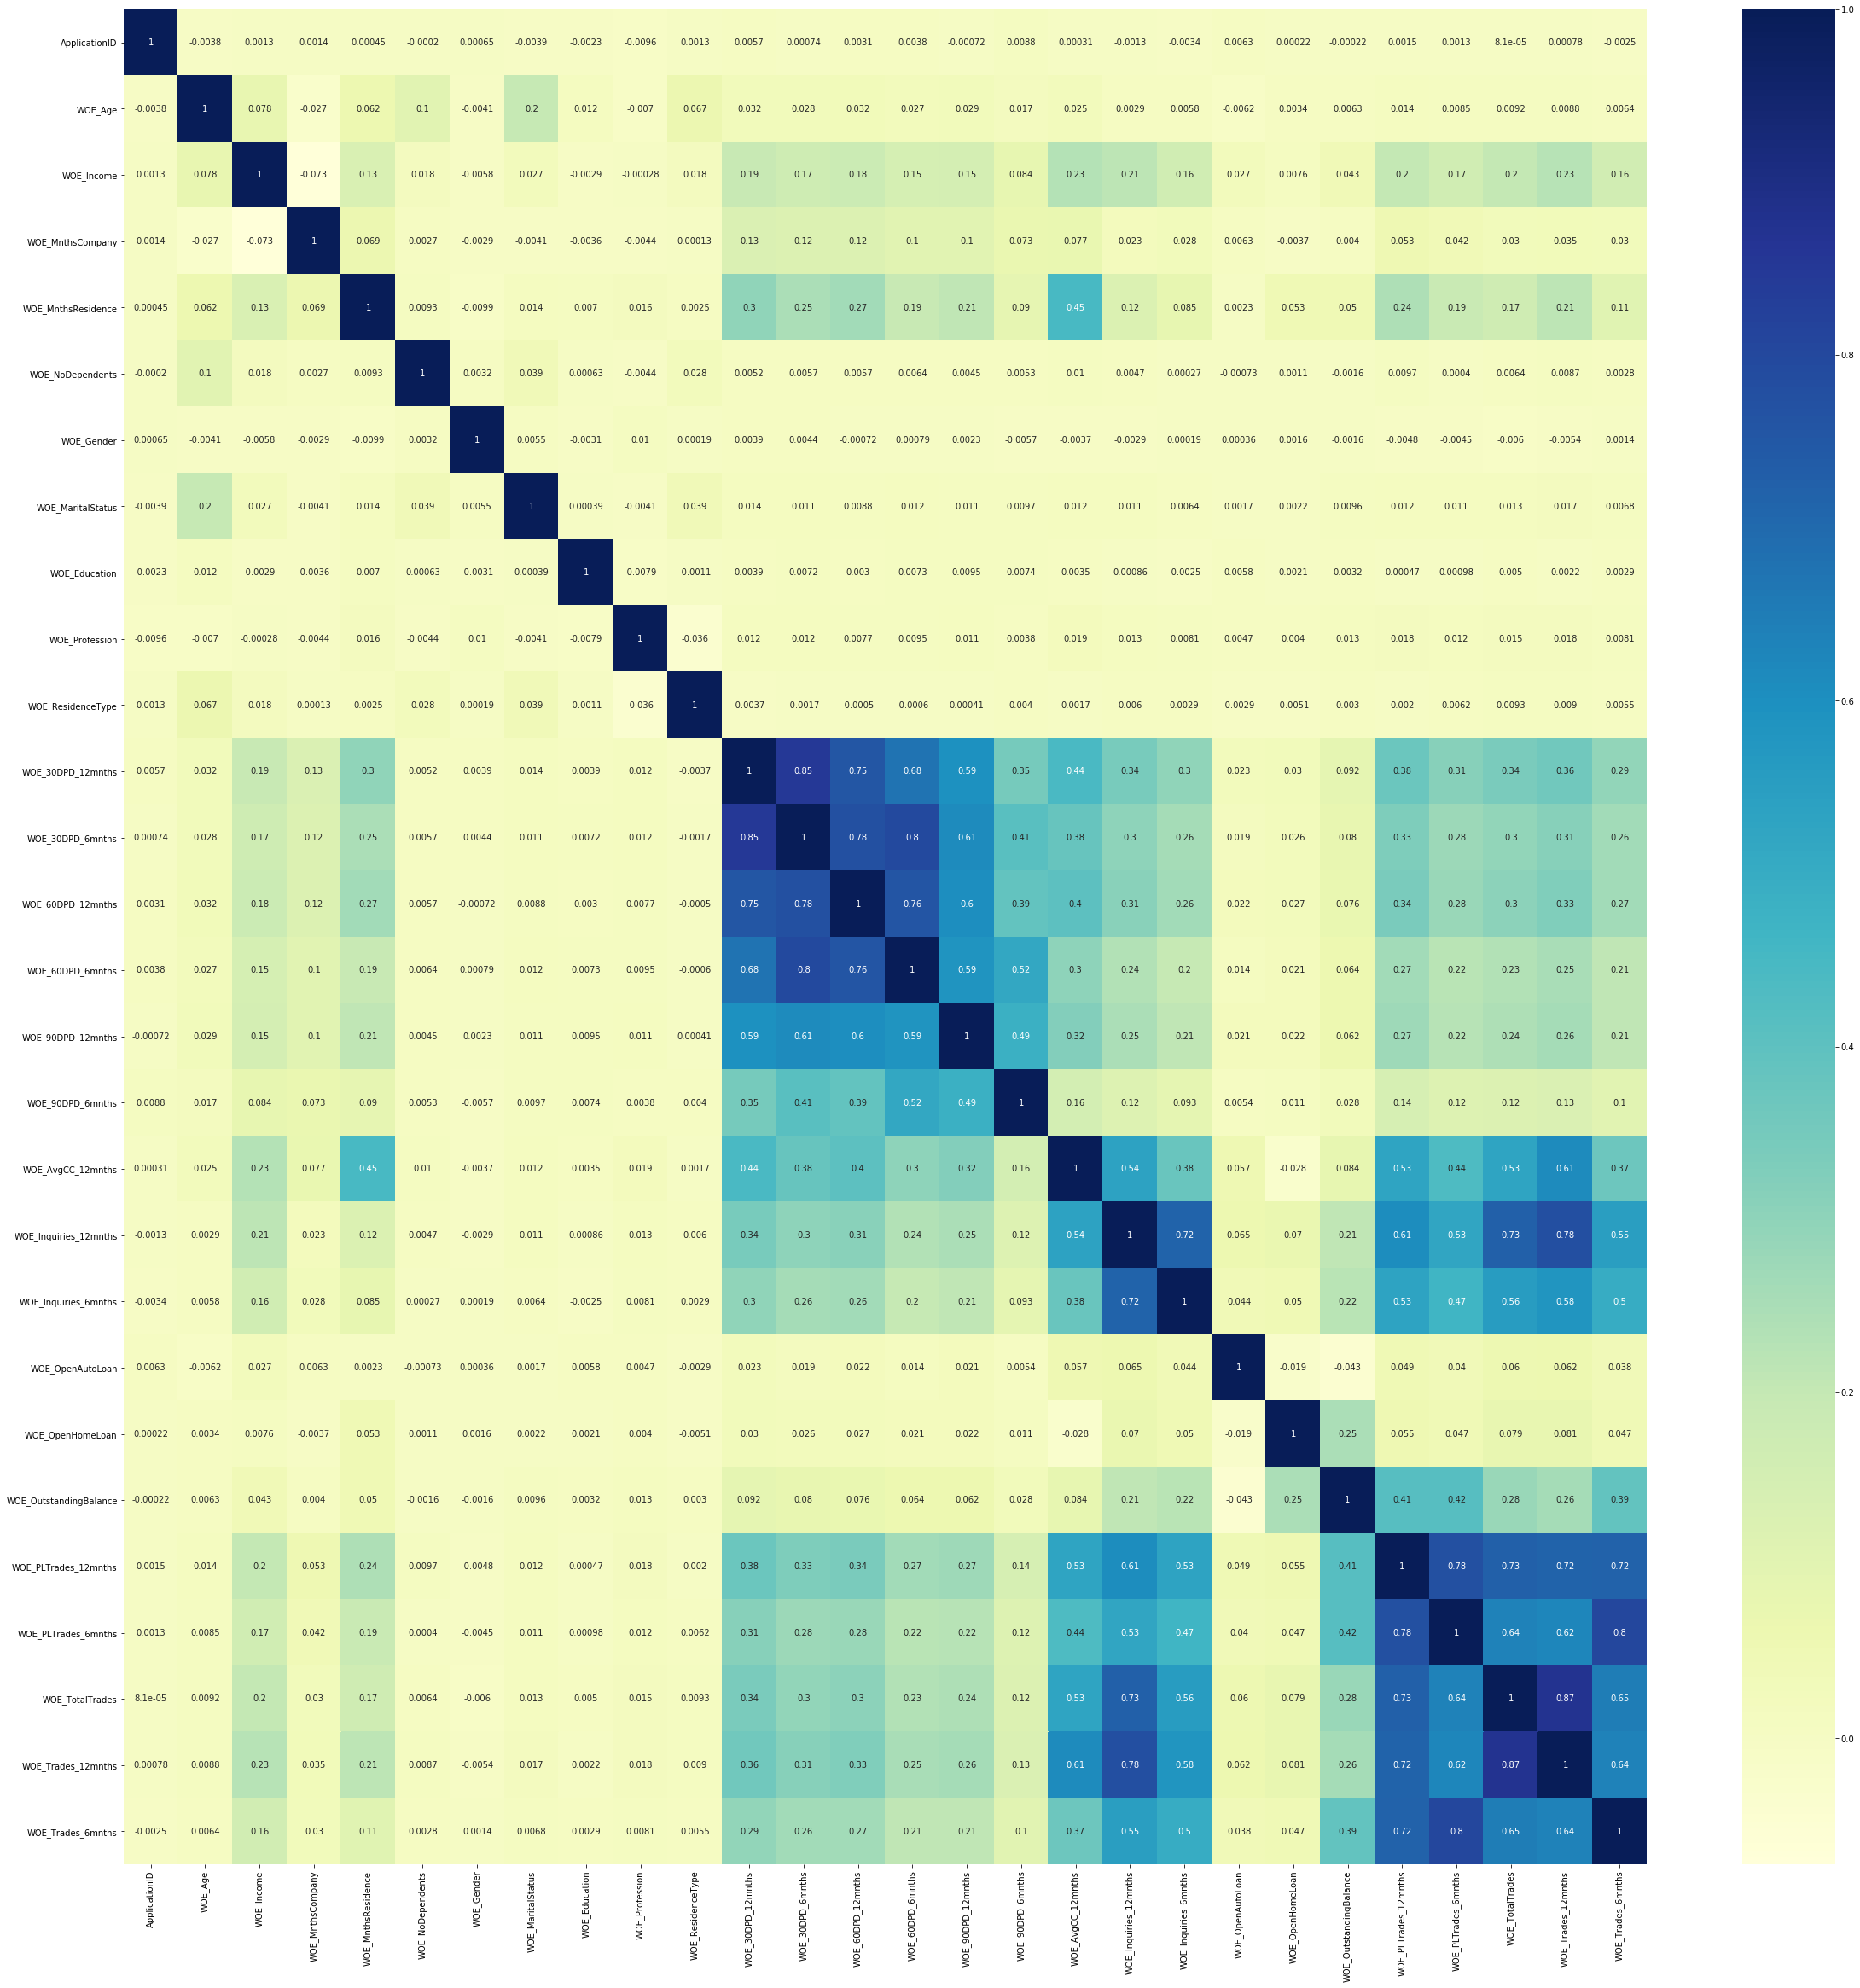

In [214]:
# plotting the correlation matrix between the variables
%matplotlib inline
corr = X_train.corr() 
plt.figure(figsize = (40,40))
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.show()

In [215]:
# Selecting only columns having correlation more than 0.80
rows, cols = X_train.shape
col = list(X_train.columns)

corr = X_train.corr().values

for i in range(cols):
    for j in range(i+1, cols):
        if corr[i,j] >= 0.8:
            print(col[i], ' ', col[j], ' ', corr[i,j])

WOE_30DPD_12mnths   WOE_30DPD_6mnths   0.849351314209024
WOE_PLTrades_6mnths   WOE_Trades_6mnths   0.8047560995911383
WOE_TotalTrades   WOE_Trades_12mnths   0.8725509065393992


In [216]:
# Removing Highly corelated variables and ApplicationID
X_train.drop(['WOE_30DPD_6mnths','WOE_Trades_6mnths','WOE_Trades_12mnths','ApplicationID'], axis=1, inplace=True)
X_test.drop(['WOE_30DPD_6mnths','WOE_Trades_6mnths','WOE_Trades_12mnths','ApplicationID'], axis=1, inplace=True)

In [217]:
total_cols=X_train.columns
total_cols

Index(['WOE_Age', 'WOE_Income', 'WOE_MnthsCompany', 'WOE_MnthsResidence',
       'WOE_NoDependents', 'WOE_Gender', 'WOE_MaritalStatus', 'WOE_Education',
       'WOE_Profession', 'WOE_ResidenceType', 'WOE_30DPD_12mnths',
       'WOE_60DPD_12mnths', 'WOE_60DPD_6mnths', 'WOE_90DPD_12mnths',
       'WOE_90DPD_6mnths', 'WOE_AvgCC_12mnths', 'WOE_Inquiries_12mnths',
       'WOE_Inquiries_6mnths', 'WOE_OpenAutoLoan', 'WOE_OpenHomeLoan',
       'WOE_OutstandingBalance', 'WOE_PLTrades_12mnths', 'WOE_PLTrades_6mnths',
       'WOE_TotalTrades'],
      dtype='object')

## <span style="color:blue">Model 1. Logistic Regression</span>

#### On the columns identified through Information value

In [218]:
X_train.columns

Index(['WOE_Age', 'WOE_Income', 'WOE_MnthsCompany', 'WOE_MnthsResidence',
       'WOE_NoDependents', 'WOE_Gender', 'WOE_MaritalStatus', 'WOE_Education',
       'WOE_Profession', 'WOE_ResidenceType', 'WOE_30DPD_12mnths',
       'WOE_60DPD_12mnths', 'WOE_60DPD_6mnths', 'WOE_90DPD_12mnths',
       'WOE_90DPD_6mnths', 'WOE_AvgCC_12mnths', 'WOE_Inquiries_12mnths',
       'WOE_Inquiries_6mnths', 'WOE_OpenAutoLoan', 'WOE_OpenHomeLoan',
       'WOE_OutstandingBalance', 'WOE_PLTrades_12mnths', 'WOE_PLTrades_6mnths',
       'WOE_TotalTrades'],
      dtype='object')

In [219]:
# Buiding a model with the columns identified through information value after removing the correlated columns

X_train_IV = X_train[["WOE_Income","WOE_MnthsResidence","WOE_AvgCC_12mnths","WOE_Inquiries_12mnths",
                     "WOE_TotalTrades","WOE_30DPD_12mnths","WOE_PLTrades_12mnths","WOE_60DPD_12mnths",
                     "WOE_PLTrades_6mnths","WOE_90DPD_12mnths","WOE_Inquiries_6mnths","WOE_60DPD_6mnths",
                     "WOE_90DPD_6mnths"]]

X_test_IV = X_test[["WOE_Income","WOE_MnthsResidence","WOE_AvgCC_12mnths","WOE_Inquiries_12mnths",
                     "WOE_TotalTrades","WOE_30DPD_12mnths","WOE_PLTrades_12mnths","WOE_60DPD_12mnths",
                     "WOE_PLTrades_6mnths","WOE_90DPD_12mnths","WOE_Inquiries_6mnths","WOE_60DPD_6mnths",
                     "WOE_90DPD_6mnths"]]

In [220]:
# Applying Stratified KFold cross validation
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

models, scores, coefs = [], [], []  # in case you want to inspect the models later, too
for train, test in skf.split(X_train_IV, y_train):
    clf = LogisticRegression(class_weight="balanced")
    clf.fit(X_train_IV.iloc[train], y_train.iloc[train])
    score = clf.score(X_train_IV.iloc[test], y_train.iloc[test])
    models.append(clf)
    scores.append(score)
    coefs.append(clf.coef_[0])

In [221]:
#List of cols with their coefficients
val=clf.coef_.reshape(-1)
coef = pd.Series(val, index = X_train_IV.columns)
coef

WOE_Income              -0.231098
WOE_MnthsResidence       0.068391
WOE_AvgCC_12mnths       -0.547926
WOE_Inquiries_12mnths   -0.518125
WOE_TotalTrades         -0.049732
WOE_30DPD_12mnths       -0.387285
WOE_PLTrades_12mnths    -0.104717
WOE_60DPD_12mnths       -0.002807
WOE_PLTrades_6mnths     -0.090149
WOE_90DPD_12mnths       -0.099608
WOE_Inquiries_6mnths     0.194014
WOE_60DPD_6mnths        -0.077721
WOE_90DPD_6mnths        -0.050748
dtype: float64

#### Prediction on train data

In [222]:
# predict churn on train data
y_pred_IV = clf.predict(X_train_IV)

# create onfusion matrix
cm_IV = metrics.confusion_matrix(y_train, y_pred_IV)
print(cm_IV)

[[26211 20624]
 [  605  1466]]


In [223]:
TP = cm_IV[1,1] # true positive 
TN = cm_IV[0,0] # true negatives
FP = cm_IV[0,1] # false positives
FN = cm_IV[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

# check area under curve
y_pred_IV_prob = clf.predict_proba(X_train_IV)[:, 1]
print("AUC:", round(metrics.roc_auc_score(y_train, y_pred_IV_prob),2))

Sensitivity 0.7078705939159826
Specificity 0.5596455642147966
AUC: 0.68


#### Prediction on test data

In [224]:
# predict churn on test data
y_pred_IV_test = clf.predict(X_test_IV)

# create onfusion matrix
cm1_IV = metrics.confusion_matrix(y_test, y_pred_IV_test)
print(cm1_IV)

[[11230  8854]
 [  273   604]]


In [225]:
TP = cm1_IV[1,1] # true positive 
TN = cm1_IV[0,0] # true negatives
FP = cm1_IV[0,1] # false positives
FN = cm1_IV[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

# check area under curve
y_pred_IV_prob_test = clf.predict_proba(X_test_IV)[:, 1]
print("AUC:", round(metrics.roc_auc_score(y_test, y_pred_IV_prob_test),2))

Sensitivity 0.6887115165336374
Specificity 0.559151563433579
AUC: 0.67


There is not much difference in the train and test sensitivity, specificity and ROC, which means the model is not overfitting.

## <span style="color:blue">Model 2 : Logistic Regression using Regularisation</span>

* For model Building, we will use Scikit Learn library.
* For feature selection - We will be using Backward Feature Elimination method using statsmodel.api and remove variable if its p value > 0.05 & VIF > 2

In [226]:
# Importing LogisticRegression and metrics from sklearn library
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder

### Building model using regularization and cross validation

In [227]:
# Create a cross validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Specify range of hyper-parameters to tune
hyper_params = {'C': [10, 2, 3, 4, 5, 1, 0.5, 0.1],'penalty':['l1','l2']}

# Specify model for logistic regression with option to treat class imbalance and perform grid search
logreg = LogisticRegression(class_weight="balanced")

# GridSearchCV
model_cv = GridSearchCV(estimator = logreg,
                       param_grid = hyper_params,
                       scoring = "roc_auc",
                       cv = folds,
                       verbose = 1,
                       return_train_score = True,
                       n_jobs=-1)

# Fit the model
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   18.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [10, 2, 3, 4, 5, 1, 0.5, 0.1],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [228]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.474985,0.109855,0.054291,0.034093,10,l1,"{'C': 10, 'penalty': 'l1'}",0.665146,0.657203,0.672374,...,0.673216,0.013705,16,0.681453,0.684810,0.680447,0.678956,0.673956,0.679924,0.003551
1,2.583180,0.194714,0.035058,0.023393,10,l2,"{'C': 10, 'penalty': 'l2'}",0.665080,0.657483,0.672540,...,0.673247,0.013602,14,0.681441,0.684773,0.680439,0.678956,0.673987,0.679919,0.003529
2,0.557524,0.017759,0.011719,0.001402,2,l1,"{'C': 2, 'penalty': 'l1'}",0.665171,0.657645,0.672894,...,0.673274,0.013526,11,0.681401,0.684771,0.680421,0.678927,0.673961,0.679896,0.003535
3,2.102383,0.385380,0.013022,0.002631,2,l2,"{'C': 2, 'penalty': 'l2'}",0.664916,0.658434,0.673444,...,0.673418,0.013327,5,0.681334,0.684536,0.680278,0.678907,0.673926,0.679796,0.003473
4,0.610111,0.026262,0.011921,0.001159,3,l1,"{'C': 3, 'penalty': 'l1'}",0.665177,0.657490,0.672676,...,0.673266,0.013606,12,0.681424,0.684789,0.680438,0.678941,0.673970,0.679913,0.003538


In [229]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", model_cv.best_score_)
print("\n")
print(model_cv.best_estimator_)

best accuracy 0.6740700877298234


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [230]:
# It looks that C=0.1 and penalty='l1' are the best value

# Running Logistic Regression on Optimal hyperparameter value
logreg = LogisticRegression(class_weight="balanced", penalty= "l1",C=0.1)

logreg.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [231]:
# Coefficients
logreg.coef_

array([[ 0.        , -0.27721537, -0.51840208,  0.06964174,  0.        ,
         0.        ,  0.        , -0.34695512,  0.        ,  0.        ,
        -0.4284101 , -0.03893213,  0.        , -0.06843727,  0.        ,
        -0.54218056, -0.49315205,  0.16975516,  0.        ,  0.        ,
         0.18303783, -0.11331451, -0.12182344, -0.08169496]])

In [232]:
# List of cols with their coefficients
val=logreg.coef_.reshape(-1)
coef = pd.Series(val, index = X_train.columns)
coef

WOE_Age                   0.000000
WOE_Income               -0.277215
WOE_MnthsCompany         -0.518402
WOE_MnthsResidence        0.069642
WOE_NoDependents          0.000000
WOE_Gender                0.000000
WOE_MaritalStatus         0.000000
WOE_Education            -0.346955
WOE_Profession            0.000000
WOE_ResidenceType         0.000000
WOE_30DPD_12mnths        -0.428410
WOE_60DPD_12mnths        -0.038932
WOE_60DPD_6mnths          0.000000
WOE_90DPD_12mnths        -0.068437
WOE_90DPD_6mnths          0.000000
WOE_AvgCC_12mnths        -0.542181
WOE_Inquiries_12mnths    -0.493152
WOE_Inquiries_6mnths      0.169755
WOE_OpenAutoLoan          0.000000
WOE_OpenHomeLoan          0.000000
WOE_OutstandingBalance    0.183038
WOE_PLTrades_12mnths     -0.113315
WOE_PLTrades_6mnths      -0.121823
WOE_TotalTrades          -0.081695
dtype: float64

In [233]:
# Select Cols which have non-zero coefficients
df=pd.DataFrame({'cols':X_train.columns,'coeff':val})
df = df[df.coeff!=0]
col=list(df.cols)
col

['WOE_Income',
 'WOE_MnthsCompany',
 'WOE_MnthsResidence',
 'WOE_Education',
 'WOE_30DPD_12mnths',
 'WOE_60DPD_12mnths',
 'WOE_90DPD_12mnths',
 'WOE_AvgCC_12mnths',
 'WOE_Inquiries_12mnths',
 'WOE_Inquiries_6mnths',
 'WOE_OutstandingBalance',
 'WOE_PLTrades_12mnths',
 'WOE_PLTrades_6mnths',
 'WOE_TotalTrades']

#### Prediction on train data

In [234]:
# predict churn on train data
y_pred = logreg.predict(X_train)

# create onfusion matrix
cm = metrics.confusion_matrix(y_train, y_pred)
print(cm)

[[26509 20326]
 [  618  1453]]


In [235]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

# check area under curve
y_pred_prob = logreg.predict_proba(X_train)[:, 1]
print("AUC:", round(metrics.roc_auc_score(y_train, y_pred_prob),2))

Sensitivity 0.7015934331240946
Specificity 0.566008327105797
AUC: 0.68


#### Prediction on test data

In [236]:
# predict churn on test data
y_pred_test = logreg.predict(X_test)

# create onfusion matrix
cm2 = metrics.confusion_matrix(y_test, y_pred_test)
print(cm2)

[[11351  8733]
 [  274   603]]


In [237]:
TP = cm2[1,1] # true positive 
TN = cm2[0,0] # true negatives
FP = cm2[0,1] # false positives
FN = cm2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

# check area under curve
y_pred_prob_test = logreg.predict_proba(X_test)[:, 1]
print("AUC:", round(metrics.roc_auc_score(y_test, y_pred_prob_test),2))

Sensitivity 0.6875712656784493
Specificity 0.5651762597092213
AUC: 0.67


There is not much difference in the train and test sensitivity, specificity and ROC, which means the model is not overfitting. Let us now choose the features using statsmodel.

#### Model assessment using Statsmodel API

In [238]:
# Assessing the model with statsmodel
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PerformanceTag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48891
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8181.5
Date:                Mon, 16 Sep 2019   Deviance:                       16363.
Time:                        13:22:54   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.1230      0.024   -131.574      0.000      -3.169      -3.076
WOE_Income                -0.3158      0.122     -2.590      0.010      -0.555      -0.077
WOE_MnthsCompany          -0.5982      0.202     -2.958      0.003      -0.995      -0.202
WOE_MnthsResidence         0.0981      0.115      0.851      0.395      -0.128       0.324
WOE_Education             -1.3921      0.693     -2.010      0.044      -2.749      -0.035
WOE_30DPD_12mnths         -0.4207      0.076     -5.528      0.000      -0.570      -0.272
WOE_60DPD_12mnths         -0.0315      0.086     -0.368      0.713      -0.199       0.136
WOE_90DPD_12mnths         -0.0669      0.083     -0.809      0.418      -0.229       0.095
WOE_AvgCC_12mnths         -0.5297      0.061     -8.705      0.000      -0.649      -0.410
WOE_Inquiries_12mnths     -0.4908      0.085     -5.775      0.000      -0.657      -0.324
WOE_Inquiries_6mnths       0.1373      0.097      1.419      0.156      -0.052       0.327
WOE_OutstandingBalance     0.3439      0.284      1.212      0.225      -0.212       0.900
WOE_PLTrades_12mnths      -0.1266      0.093     -1.363      0.173      -0.309       0.055
WOE_PLTrades_6mnths       -0.1310      0.093     -1.412      0.158      -0.313       0.051
WOE_TotalTrades           -0.0361      0.092     -0.390      0.696      -0.217       0.145
==========================================================================================
"""

In [239]:
# Checking VIFs
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,WOE_PLTrades_12mnths,3.79
8,WOE_Inquiries_12mnths,3.38
13,WOE_TotalTrades,3.12
4,WOE_30DPD_12mnths,2.77
12,WOE_PLTrades_6mnths,2.76
5,WOE_60DPD_12mnths,2.64
9,WOE_Inquiries_6mnths,2.18
7,WOE_AvgCC_12mnths,2.16
6,WOE_90DPD_12mnths,1.74
2,WOE_MnthsResidence,1.34


#### <span style="color:blue">Dropping insignificant variable</span>
WOE_60DPD_12mnths has a very high p-value. Dropping it

In [240]:
# WOE_60DPD_12mnths has a very high p-value. Dropping it
col.remove('WOE_60DPD_12mnths')
col

['WOE_Income',
 'WOE_MnthsCompany',
 'WOE_MnthsResidence',
 'WOE_Education',
 'WOE_30DPD_12mnths',
 'WOE_90DPD_12mnths',
 'WOE_AvgCC_12mnths',
 'WOE_Inquiries_12mnths',
 'WOE_Inquiries_6mnths',
 'WOE_OutstandingBalance',
 'WOE_PLTrades_12mnths',
 'WOE_PLTrades_6mnths',
 'WOE_TotalTrades']

In [241]:
#Assessing the model with statsmodel
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PerformanceTag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48892
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8181.5
Date:                Mon, 16 Sep 2019   Deviance:                       16363.
Time:                        13:22:55   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.1229      0.024   -131.573      0.000      -3.169      -3.076
WOE_Income                -0.3170      0.122     -2.602      0.009      -0.556      -0.078
WOE_MnthsCompany          -0.6006      0.202     -2.972      0.003      -0.997      -0.205
WOE_MnthsResidence         0.0975      0.115      0.846      0.398      -0.128       0.323
WOE_Education             -1.3914      0.692     -2.009      0.045      -2.749      -0.034
WOE_30DPD_12mnths         -0.4361      0.063     -6.881      0.000      -0.560      -0.312
WOE_90DPD_12mnths         -0.0756      0.079     -0.954      0.340      -0.231       0.080
WOE_AvgCC_12mnths         -0.5305      0.061     -8.725      0.000      -0.650      -0.411
WOE_Inquiries_12mnths     -0.4909      0.085     -5.777      0.000      -0.658      -0.324
WOE_Inquiries_6mnths       0.1368      0.097      1.414      0.157      -0.053       0.326
WOE_OutstandingBalance     0.3460      0.284      1.220      0.222      -0.210       0.902
WOE_PLTrades_12mnths      -0.1273      0.093     -1.371      0.170      -0.309       0.055
WOE_PLTrades_6mnths       -0.1312      0.093     -1.414      0.157      -0.313       0.051
WOE_TotalTrades           -0.0361      0.092     -0.390      0.696      -0.217       0.145
==========================================================================================
"""

In [242]:
# Checking VIFs
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,WOE_PLTrades_12mnths,3.79
7,WOE_Inquiries_12mnths,3.38
12,WOE_TotalTrades,3.12
11,WOE_PLTrades_6mnths,2.76
8,WOE_Inquiries_6mnths,2.18
6,WOE_AvgCC_12mnths,2.16
4,WOE_30DPD_12mnths,1.89
5,WOE_90DPD_12mnths,1.60
2,WOE_MnthsResidence,1.34
9,WOE_OutstandingBalance,1.29


#### <span style="color:blue">Dropping insignificant variable</span>
WOE_TotalTrades has a very high p-value. Dropping it

In [243]:
# WOE_TotalTrades has a very high p-value. Dropping it
col.remove('WOE_TotalTrades')
col

['WOE_Income',
 'WOE_MnthsCompany',
 'WOE_MnthsResidence',
 'WOE_Education',
 'WOE_30DPD_12mnths',
 'WOE_90DPD_12mnths',
 'WOE_AvgCC_12mnths',
 'WOE_Inquiries_12mnths',
 'WOE_Inquiries_6mnths',
 'WOE_OutstandingBalance',
 'WOE_PLTrades_12mnths',
 'WOE_PLTrades_6mnths']

In [244]:
# Assessing the model with statsmodel
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PerformanceTag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48893
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8181.6
Date:                Mon, 16 Sep 2019   Deviance:                       16363.
Time:                        13:22:56   Pearson chi2:                 4.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.1230      0.024   -131.583      0.000      -3.169      -3.076
WOE_Income                -0.3178      0.122     -2.609      0.009      -0.557      -0.079
WOE_MnthsCompany          -0.5999      0.202     -2.968      0.003      -0.996      -0.204
WOE_MnthsResidence         0.0988      0.115      0.858      0.391      -0.127       0.325
WOE_Education             -1.3924      0.692     -2.011      0.044      -2.750      -0.035
WOE_30DPD_12mnths         -0.4366      0.063     -6.888      0.000      -0.561      -0.312
WOE_90DPD_12mnths         -0.0754      0.079     -0.950      0.342      -0.231       0.080
WOE_AvgCC_12mnths         -0.5327      0.061     -8.793      0.000      -0.651      -0.414
WOE_Inquiries_12mnths     -0.5032      0.079     -6.364      0.000      -0.658      -0.348
WOE_Inquiries_6mnths       0.1372      0.097      1.418      0.156      -0.052       0.327
WOE_OutstandingBalance     0.3445      0.284      1.215      0.224      -0.211       0.900
WOE_PLTrades_12mnths      -0.1402      0.087     -1.613      0.107      -0.311       0.030
WOE_PLTrades_6mnths       -0.1374      0.092     -1.502      0.133      -0.317       0.042
==========================================================================================
"""

In [245]:
# Checking VIFs
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,WOE_PLTrades_12mnths,3.43
7,WOE_Inquiries_12mnths,2.84
11,WOE_PLTrades_6mnths,2.71
8,WOE_Inquiries_6mnths,2.18
6,WOE_AvgCC_12mnths,2.14
4,WOE_30DPD_12mnths,1.89
5,WOE_90DPD_12mnths,1.60
2,WOE_MnthsResidence,1.34
9,WOE_OutstandingBalance,1.29
0,WOE_Income,1.10


#### <span style="color:blue">Dropping insignificant variable</span>
WOE_MnthsResidence has a very high p-value. Dropping it

In [246]:
# WOE_MnthsResidence has a very high p-value. Dropping it
col.remove('WOE_MnthsResidence')
col

['WOE_Income',
 'WOE_MnthsCompany',
 'WOE_Education',
 'WOE_30DPD_12mnths',
 'WOE_90DPD_12mnths',
 'WOE_AvgCC_12mnths',
 'WOE_Inquiries_12mnths',
 'WOE_Inquiries_6mnths',
 'WOE_OutstandingBalance',
 'WOE_PLTrades_12mnths',
 'WOE_PLTrades_6mnths']

In [247]:
# Assessing the model with statsmodel
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PerformanceTag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48894
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8182.0
Date:                Mon, 16 Sep 2019   Deviance:                       16364.
Time:                        13:22:57   Pearson chi2:                 4.83e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.1229      0.024   -131.591      0.000      -3.169      -3.076
WOE_Income                -0.3100      0.121     -2.552      0.011      -0.548      -0.072
WOE_MnthsCompany          -0.5905      0.202     -2.926      0.003      -0.986      -0.195
WOE_Education             -1.3864      0.692     -2.002      0.045      -2.743      -0.029
WOE_30DPD_12mnths         -0.4299      0.063     -6.842      0.000      -0.553      -0.307
WOE_90DPD_12mnths         -0.0751      0.079     -0.948      0.343      -0.230       0.080
WOE_AvgCC_12mnths         -0.5141      0.057     -9.099      0.000      -0.625      -0.403
WOE_Inquiries_12mnths     -0.5101      0.079     -6.481      0.000      -0.664      -0.356
WOE_Inquiries_6mnths       0.1344      0.097      1.390      0.164      -0.055       0.324
WOE_OutstandingBalance     0.3393      0.283      1.197      0.231      -0.216       0.895
WOE_PLTrades_12mnths      -0.1371      0.087     -1.581      0.114      -0.307       0.033
WOE_PLTrades_6mnths       -0.1379      0.091     -1.508      0.132      -0.317       0.041
==========================================================================================
"""

In [248]:
# Checking VIFs
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,WOE_PLTrades_12mnths,3.42
6,WOE_Inquiries_12mnths,2.78
10,WOE_PLTrades_6mnths,2.71
7,WOE_Inquiries_6mnths,2.18
3,WOE_30DPD_12mnths,1.87
5,WOE_AvgCC_12mnths,1.85
4,WOE_90DPD_12mnths,1.60
8,WOE_OutstandingBalance,1.29
0,WOE_Income,1.10
1,WOE_MnthsCompany,1.03


#### <span style="color:blue">Dropping insignificant variable</span>
WOE_90DPD_12mnths has a very high p-value. Dropping it

In [249]:
# WOE_90DPD_12mnths has a very high p-value. Dropping it
col.remove('WOE_90DPD_12mnths')
col

['WOE_Income',
 'WOE_MnthsCompany',
 'WOE_Education',
 'WOE_30DPD_12mnths',
 'WOE_AvgCC_12mnths',
 'WOE_Inquiries_12mnths',
 'WOE_Inquiries_6mnths',
 'WOE_OutstandingBalance',
 'WOE_PLTrades_12mnths',
 'WOE_PLTrades_6mnths']

In [250]:
# Assessing the model with statsmodel
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PerformanceTag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48895
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8182.4
Date:                Mon, 16 Sep 2019   Deviance:                       16365.
Time:                        13:22:57   Pearson chi2:                 4.83e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.1230      0.024   -131.594      0.000      -3.169      -3.076
WOE_Income                -0.3146      0.121     -2.592      0.010      -0.553      -0.077
WOE_MnthsCompany          -0.5988      0.202     -2.970      0.003      -0.994      -0.204
WOE_Education             -1.3960      0.692     -2.017      0.044      -2.752      -0.040
WOE_30DPD_12mnths         -0.4588      0.055     -8.379      0.000      -0.566      -0.351
WOE_AvgCC_12mnths         -0.5158      0.056     -9.136      0.000      -0.627      -0.405
WOE_Inquiries_12mnths     -0.5105      0.079     -6.487      0.000      -0.665      -0.356
WOE_Inquiries_6mnths       0.1345      0.097      1.391      0.164      -0.055       0.324
WOE_OutstandingBalance     0.3428      0.283      1.209      0.226      -0.213       0.898
WOE_PLTrades_12mnths      -0.1391      0.087     -1.604      0.109      -0.309       0.031
WOE_PLTrades_6mnths       -0.1381      0.091     -1.511      0.131      -0.317       0.041
==========================================================================================
"""

In [251]:
# Checking VIFs
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,WOE_PLTrades_12mnths,3.41
5,WOE_Inquiries_12mnths,2.78
9,WOE_PLTrades_6mnths,2.71
6,WOE_Inquiries_6mnths,2.18
4,WOE_AvgCC_12mnths,1.84
3,WOE_30DPD_12mnths,1.38
7,WOE_OutstandingBalance,1.29
0,WOE_Income,1.10
1,WOE_MnthsCompany,1.03
2,WOE_Education,1.00


#### <span style="color:blue">Dropping insignificant variable</span>
WOE_OutstandingBalance has a very high p-value. Dropping it

In [252]:
# WOE_OutstandingBalance has a very high p-value. Dropping it
col.remove('WOE_OutstandingBalance')
col

['WOE_Income',
 'WOE_MnthsCompany',
 'WOE_Education',
 'WOE_30DPD_12mnths',
 'WOE_AvgCC_12mnths',
 'WOE_Inquiries_12mnths',
 'WOE_Inquiries_6mnths',
 'WOE_PLTrades_12mnths',
 'WOE_PLTrades_6mnths']

In [253]:
# Assessing the model with statsmodel
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistyic regression model
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PerformanceTag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48896
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8183.2
Date:                Mon, 16 Sep 2019   Deviance:                       16366.
Time:                        13:22:58   Pearson chi2:                 4.83e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.1229      0.024   -131.617      0.000      -3.169      -3.076
WOE_Income               -0.3174      0.121     -2.616      0.009      -0.555      -0.080
WOE_MnthsCompany         -0.6013      0.202     -2.983      0.003      -0.996      -0.206
WOE_Education            -1.3933      0.692     -2.013      0.044      -2.750      -0.036
WOE_30DPD_12mnths        -0.4613      0.055     -8.430      0.000      -0.569      -0.354
WOE_AvgCC_12mnths        -0.5251      0.056     -9.378      0.000      -0.635      -0.415
WOE_Inquiries_12mnths    -0.5110      0.079     -6.489      0.000      -0.665      -0.357
WOE_Inquiries_6mnths      0.1382      0.097      1.430      0.153      -0.051       0.328
WOE_PLTrades_12mnths     -0.1147      0.085     -1.358      0.174      -0.280       0.051
WOE_PLTrades_6mnths      -0.1142      0.089     -1.277      0.201      -0.289       0.061
=========================================================================================
"""

In [254]:
# Checking VIFs
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,WOE_PLTrades_12mnths,3.27
5,WOE_Inquiries_12mnths,2.78
8,WOE_PLTrades_6mnths,2.63
6,WOE_Inquiries_6mnths,2.17
4,WOE_AvgCC_12mnths,1.80
3,WOE_30DPD_12mnths,1.37
0,WOE_Income,1.10
1,WOE_MnthsCompany,1.03
2,WOE_Education,1.00


#### <span style="color:blue">Dropping insignificant variable</span>
WOE_PLTrades_6mnths has a very high p-value. Dropping it

In [255]:
# WOE_PLTrades_6mnths has a very high p-value. Dropping it
col.remove('WOE_PLTrades_6mnths')
col

['WOE_Income',
 'WOE_MnthsCompany',
 'WOE_Education',
 'WOE_30DPD_12mnths',
 'WOE_AvgCC_12mnths',
 'WOE_Inquiries_12mnths',
 'WOE_Inquiries_6mnths',
 'WOE_PLTrades_12mnths']

In [256]:
# Assessing the model with statsmodel
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PerformanceTag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48897
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8184.0
Date:                Mon, 16 Sep 2019   Deviance:                       16368.
Time:                        13:22:58   Pearson chi2:                 4.83e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.1227      0.024   -131.633      0.000      -3.169      -3.076
WOE_Income               -0.3175      0.121     -2.616      0.009      -0.555      -0.080
WOE_MnthsCompany         -0.6013      0.202     -2.983      0.003      -0.996      -0.206
WOE_Education            -1.3954      0.692     -2.016      0.044      -2.752      -0.039
WOE_30DPD_12mnths        -0.4625      0.055     -8.452      0.000      -0.570      -0.355
WOE_AvgCC_12mnths        -0.5258      0.056     -9.386      0.000      -0.636      -0.416
WOE_Inquiries_12mnths    -0.5160      0.079     -6.560      0.000      -0.670      -0.362
WOE_Inquiries_6mnths      0.1327      0.097      1.374      0.169      -0.057       0.322
WOE_PLTrades_12mnths     -0.1788      0.068     -2.631      0.009      -0.312      -0.046
=========================================================================================
"""

In [257]:
# Checking VIFs
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,WOE_Inquiries_12mnths,2.77
6,WOE_Inquiries_6mnths,2.17
7,WOE_PLTrades_12mnths,1.91
4,WOE_AvgCC_12mnths,1.80
3,WOE_30DPD_12mnths,1.37
0,WOE_Income,1.10
1,WOE_MnthsCompany,1.03
2,WOE_Education,1.00


#### <span style="color:blue">Dropping insignificant variable</span>
WOE_Inquiries_6mnths has a very high p-value. Dropping it

In [258]:
# WOE_Inquiries_6mnths has a very high p-value. Dropping it
col.remove('WOE_Inquiries_6mnths')
col

['WOE_Income',
 'WOE_MnthsCompany',
 'WOE_Education',
 'WOE_30DPD_12mnths',
 'WOE_AvgCC_12mnths',
 'WOE_Inquiries_12mnths',
 'WOE_PLTrades_12mnths']

In [259]:
# Assessing the model with statsmodel
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PerformanceTag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48898
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8184.9
Date:                Mon, 16 Sep 2019   Deviance:                       16370.
Time:                        13:22:59   Pearson chi2:                 4.83e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.1231      0.024   -131.670      0.000      -3.170      -3.077
WOE_Income               -0.3171      0.121     -2.613      0.009      -0.555      -0.079
WOE_MnthsCompany         -0.5998      0.202     -2.976      0.003      -0.995      -0.205
WOE_Education            -1.4040      0.693     -2.027      0.043      -2.761      -0.047
WOE_30DPD_12mnths        -0.4573      0.055     -8.379      0.000      -0.564      -0.350
WOE_AvgCC_12mnths        -0.5322      0.056     -9.529      0.000      -0.642      -0.423
WOE_Inquiries_12mnths    -0.4614      0.068     -6.789      0.000      -0.595      -0.328
WOE_PLTrades_12mnths     -0.1671      0.067     -2.480      0.013      -0.299      -0.035
=========================================================================================
"""

In [260]:
# Checking VIFs
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,WOE_Inquiries_12mnths,1.87
6,WOE_PLTrades_12mnths,1.86
4,WOE_AvgCC_12mnths,1.78
3,WOE_30DPD_12mnths,1.37
0,WOE_Income,1.10
1,WOE_MnthsCompany,1.03
2,WOE_Education,1.00


All the __features have p < 0.5 and vif < 2__. Let us now bild the model again on the selected features using the scikit learn library

In [261]:
logreg = LogisticRegression(class_weight="balanced", penalty='l1', C=0.1)
logreg.fit(X_train[col],y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [262]:
logreg.coef_

array([[-0.28162518, -0.5210549 , -0.34518828, -0.46768203, -0.54791768,
        -0.46967009, -0.18407239]])

In [263]:
df=pd.DataFrame(logreg.coef_.reshape(7,1),columns={"Coeff"})
df

,Coeff
0,-0.281625
1,-0.521055
2,-0.345188
3,-0.467682
4,-0.547918
5,-0.469670
6,-0.184072


In [264]:
mg = pd.concat([vif,df],axis=1)
mg

,Features,VIF,Coeff
0,WOE_Income,1.10,-0.281625
1,WOE_MnthsCompany,1.03,-0.521055
2,WOE_Education,1.00,-0.345188
3,WOE_30DPD_12mnths,1.37,-0.467682
4,WOE_AvgCC_12mnths,1.78,-0.547918
5,WOE_Inquiries_12mnths,1.87,-0.469670
6,WOE_PLTrades_12mnths,1.86,-0.184072


#### Model evaluation on the train data

In [265]:
# predict default on train data
y_pred = logreg.predict(X_train[col])

# create onfusion matrix
cm = metrics.confusion_matrix(y_train, y_pred)
print(cm)

[[26261 20574]
 [  601  1470]]


In [266]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

# Let's see the sensitivity of our model
print("Sensitivity",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

# check area under curve
y_pred_prob = logreg.predict_proba(X_train[col])[:, 1]
print("AUC:", round(metrics.roc_auc_score(y_train, y_pred_prob),2))

Sensitivity 0.7098020280057943
Specificity 0.5607131418810718
AUC: 0.68


#### Model evaluation on test Data

In [267]:
# predict default on test data
y_pred_test = logreg.predict(X_test[col])

# create onfusion matrix
cm2 = metrics.confusion_matrix(y_test, y_pred_test)
print(cm2)

[[11245  8839]
 [  272   605]]


In [268]:
TP = cm2[1,1] # true positive 
TN = cm2[0,0] # true negatives
FP = cm2[0,1] # false positives
FN = cm2[1,0] # false negatives

# Let's see the sensitivity of our model
print("Sensitivity",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

# check area under curve
y_pred_prob_test = logreg.predict_proba(X_test[col])[:, 1]
print("AUC:", round(metrics.roc_auc_score(y_test, y_pred_prob_test),2))

Sensitivity 0.6898517673888256
Specificity 0.5598984266082454
AUC: 0.67


### KS statistics on the Test Data using the LR model

In [269]:
# Making prediction on the test data
pred_probs_test = logreg.predict_proba(X_test[col])[:,1]

# Converting pred_probs_test to a dataframe
y_test_pred_df = pd.DataFrame(pred_probs_test)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Prob'})
y_test_pred_final.head()

,PerformanceTag,Prob
0,0.0,0.425616
1,0.0,0.683817
2,0.0,0.270332
3,0.0,0.259388
4,0.0,0.584862


#### Creating decile

In [270]:
# Copying y_test_pred_final dataframe into new dataframe to make decile
decile_df=y_test_pred_final.copy()

# Divide the dataset into 10 equal deciles
decile_df['decile'] = pd.qcut(decile_df['Prob'], 10, labels=np.arange(10, 0, -1))
decile_df.head(10)

,PerformanceTag,Prob,decile
0,0.0,0.425616,6
1,0.0,0.683817,2
2,0.0,0.270332,9
3,0.0,0.259388,9
4,0.0,0.584862,3
5,0.0,0.305707,8
6,0.0,0.549963,4
7,0.0,0.276285,8
8,0.0,0.276398,8
9,0.0,0.264275,9


In [271]:
# Count of no. of prospects in each decile
lift_df = decile_df.groupby('decile')['Prob'].count().reset_index()

# Renaming column
lift_df.rename({'Prob':'total'}, axis=1, inplace=True)

# Count the no. of prospects who defaulted in each decile
lift_df_pred = decile_df[decile_df['PerformanceTag']==1].groupby('decile')['Prob'].count().reset_index()

# Renaming column
lift_df_pred.rename({'Prob':'default'}, axis=1, inplace=True)
lift_df_pred.head(10)

,decile,default
0,10,31
1,9,31
2,8,24
3,7,69
4,6,71
5,5,97
6,4,100
7,3,120
8,2,168
9,1,166


In [272]:
# Merging both the dataframe containing total count and default count in each decile
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

# Sort the dataframe on decile
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)
lift_df_final.head(10)

,decile,total,default
9,1,2095,166
8,2,2095,168
7,3,2080,120
6,4,2114,100
5,5,2090,97
4,6,2092,71
3,7,2101,69
2,8,2074,24
1,9,2103,31
0,10,2117,31


In [273]:
# Find the cumulative total defaulters
lift_df_final['cum_default']=lift_df_final['default'].cumsum()

# Find the cumulative % defaulters
lift_df_final['%cum_default'] = 100*lift_df_final['cum_default']/lift_df_final['default'].sum()

lift_df_final["non_default"]=lift_df_final["total"]-lift_df_final["default"]

# Find the cumulative total non defaulters
lift_df_final['cum_non_default']=lift_df_final['non_default'].cumsum()

# Find the cumulative % defaulters
lift_df_final['%cum_non_default'] = 100*lift_df_final['cum_non_default']/lift_df_final['non_default'].sum()
lift_df_final["Difference"]=lift_df_final["%cum_default"] - lift_df_final["%cum_non_default"]
lift_df_final.head(10)

,decile,total,default,cum_default,%cum_default,non_default,cum_non_default,%cum_non_default,Difference
9,1,2095,166,166,18.928164,1929,1929,9.604660,9.323504
8,2,2095,168,334,38.084379,1927,3856,19.199363,18.885016
7,3,2080,120,454,51.767389,1960,5816,28.958375,22.809014
6,4,2114,100,554,63.169897,2014,7830,38.986258,24.183640
5,5,2090,97,651,74.230331,1993,9823,48.909580,25.320751
4,6,2092,71,722,82.326112,2021,11844,58.972316,23.353795
3,7,2101,69,791,90.193843,2032,13876,69.089823,21.104020
2,8,2074,24,815,92.930445,2050,15926,79.296953,13.633492
1,9,2103,31,846,96.465222,2072,17998,89.613623,6.851600
0,10,2117,31,877,100.000000,2086,20084,100.000000,0.000000


* The value of __KS-Statistics is 25.32__ and is __present in 5th Decile__

## <span style="color:blue">Model 3. Decision Tree</span>

Let's first fit a decision tree model with default hyperparameters.

### Default Parameters

In [274]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot & 
# read the tree.

dt_default = DecisionTreeClassifier(max_depth=5,random_state = 100,class_weight="balanced")

dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [275]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_train_default = dt_default.predict(X_train) # For train data
y_pred_test_default = dt_default.predict(X_test) # For test data

#### Evaluating model on train data built using default parameter value

In [276]:
# Printing confusion matrix and accuracy
# For train
print(confusion_matrix(y_train, y_pred_train_default))
print("\n")

print("Accuracy on train data:",accuracy_score(y_train, y_pred_train_default))
print("\n")

print(classification_report(y_train,y_pred_train_default))

[[25104 21731]
 [  508  1563]]


Accuracy on train data: 0.5452705189547294


              precision    recall  f1-score   support

         0.0       0.98      0.54      0.69     46835
         1.0       0.07      0.75      0.12      2071

    accuracy                           0.55     48906
   macro avg       0.52      0.65      0.41     48906
weighted avg       0.94      0.55      0.67     48906



#### Evaluating model on test data built using default parameter value

In [277]:
# For test
print(confusion_matrix(y_test, y_pred_test_default))
print("\n")

print("Accuracy on test data:",accuracy_score(y_test, y_pred_test_default))
print("\n")

print(classification_report(y_test,y_pred_test_default))

[[10709  9375]
 [  245   632]]


Accuracy on test data: 0.5410524307046419


              precision    recall  f1-score   support

         0.0       0.98      0.53      0.69     20084
         1.0       0.06      0.72      0.12       877

    accuracy                           0.54     20961
   macro avg       0.52      0.63      0.40     20961
weighted avg       0.94      0.54      0.67     20961



### Hyperparameter Tuning : Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- **min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- **criterion** (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.

In [278]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 8, 1),
    'min_samples_leaf': range(40, 120, 20),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

dtree = DecisionTreeClassifier(random_state = 100,class_weight="balanced")

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1)

In [279]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 8),
                       

In [280]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.185671,0.019387,0.006210,0.001438,entropy,5,40,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.539051,0.580615,0.593907,0.645231,0.548615,0.581483,0.037682,43
1,0.206898,0.016444,0.008514,0.005019,entropy,5,40,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.539051,0.580615,0.593907,0.645231,0.548615,0.581483,0.037682,43
2,0.203238,0.012615,0.006811,0.001078,entropy,5,60,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.537620,0.580104,0.596463,0.646560,0.549228,0.581994,0.038534,37
3,0.191610,0.009937,0.005910,0.000375,entropy,5,60,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.537620,0.580104,0.596463,0.646560,0.549228,0.581994,0.038534,37
4,0.197427,0.013533,0.005910,0.000200,entropy,5,80,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.537620,0.580104,0.596463,0.647071,0.549228,0.582096,0.038705,35


In [281]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print("\n")
print(grid_search.best_estimator_)

best accuracy 0.6061423956160799


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')


### Model using best parameters obtained from grid search

In [282]:
# Model with optimal hyperparameters
# max_depth=7 and min_samples_leaf=40 was leading to overfiiting so pruned the tree with max_depth=5
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, # the model was overfitting with 7, so pruned it and chose 5
                                  min_samples_leaf=40,
                                  min_samples_split=50,
                                  class_weight="balanced") # Handling class imbalance
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [283]:
# Feature_importance
importance = clf_gini.feature_importances_

features=total_cols
# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

In [284]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [285]:
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).\
                     reset_index(drop=True)
feature_importance

,variables,importance_percentage
0,WOE_AvgCC_12mnths,61.447197
1,WOE_Inquiries_12mnths,14.610674
2,WOE_30DPD_12mnths,11.951371
3,WOE_MnthsResidence,4.839983
4,WOE_PLTrades_12mnths,2.555522
5,WOE_MnthsCompany,1.025535
6,WOE_Income,0.797972
7,WOE_Education,0.615288
8,WOE_ResidenceType,0.542158
9,WOE_Profession,0.465733


#### Model evaluation on train data

In [286]:
# Predicting on train dataframe
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
y_train_pred2 = clf_gini.predict(X_train)

# Accuracy
print("Accuracy on train data:",accuracy_score(y_train, y_train_pred2))
print("\n")

# confusion matrix
confusion2 = confusion_matrix(y_train, y_train_pred2)
print(confusion2)
print("\n")

print(classification_report(y_train,y_train_pred2))

Accuracy on train data: 0.5426941479573059


[[24976 21859]
 [  506  1565]]


              precision    recall  f1-score   support

         0.0       0.98      0.53      0.69     46835
         1.0       0.07      0.76      0.12      2071

    accuracy                           0.54     48906
   macro avg       0.52      0.64      0.41     48906
weighted avg       0.94      0.54      0.67     48906



In [287]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our model
print("Sensitivity:",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:",TN / float(TN+FP))

Sensitivity: 0.7556735876388219
Specificity: 0.5332763958577986


In [288]:
# Making prediction on the train data
pred_probs_train = clf_gini.predict_proba(X_train)[:,1]
"{:2.2}".format(roc_auc_score(y_train, pred_probs_train))

'0.69'

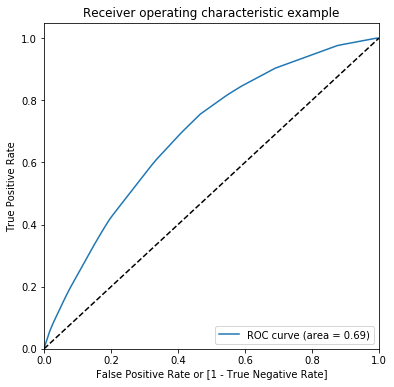

In [289]:
# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_train, pred_probs_train, drop_intermediate = False )
auc_score = roc_auc_score(y_train, pred_probs_train)
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Model evaluation on test data

In [290]:
# Predicting on test dataframe using predict
from sklearn.metrics import classification_report,confusion_matrix
y_test_pred2 = clf_gini.predict(X_test)

In [291]:
# Accuracy
print("Accuracy on test data:",accuracy_score(y_test, y_test_pred2))
print("\n")

# confusion matrix
confusion2_1 = confusion_matrix(y_test, y_test_pred2)
print(confusion2_1)

Accuracy on test data: 0.5388578789179905


[[10660  9424]
 [  242   635]]


In [292]:
TP = confusion2_1[1,1] # true positive 
TN = confusion2_1[0,0] # true negatives
FP = confusion2_1[0,1] # false positives
FN = confusion2_1[1,0] # false negatives

# Let's see the sensitivity of our model
print("Sensitivity:",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:",TN / float(TN+FP))

Sensitivity: 0.7240592930444698
Specificity: 0.5307707627962557


In [293]:
# Predicting on test dataframe using probability for roc_auc
pred_probs_test = clf_gini.predict_proba(X_test)[:,1]
"{:2.2}".format(roc_auc_score(y_test, pred_probs_test))

'0.67'

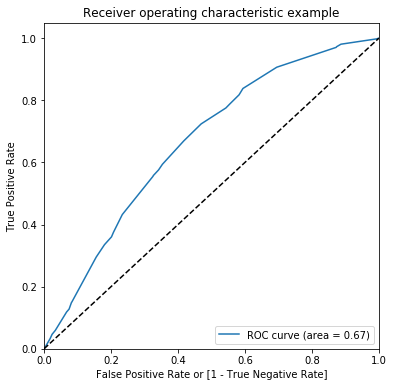

In [294]:
# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_probs_test, drop_intermediate = False )
auc_score = roc_auc_score(y_test, pred_probs_test)
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## <span style="color:blue">Model 4 - Random Forest</span>

### Default Hyperparameters

Let's first fit a random forest model with default hyperparameters.

In [295]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state = 100, class_weight="balanced")

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=100, verbose=0, warm_start=False)

In [296]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_train_default2 = rfc.predict(X_train) # For train data
y_pred_test_default2 = rfc.predict(X_test) # For test data

#### Evaluating model on train data built using default parameter value

In [297]:
# Printing confusion matrix and accuracy
# For train
print(confusion_matrix(y_train, y_pred_train_default2))
print("\n")

# Accuracy
print("Accuracy on train data:",accuracy_score(y_train, y_pred_train_default2))

[[46696   139]
 [  503  1568]]


Accuracy on train data: 0.9868727763464605


#### Evaluating model on test data built using default parameter value

In [298]:
# For test
print(confusion_matrix(y_test, y_pred_test_default2))
print("\n")

# Accuracy
print("Accuracy on test data:",accuracy_score(y_test, y_pred_test_default2))

[[20003    81]
 [  874     3]]


Accuracy on test data: 0.9544391966032155


### Hyperparameter Tuning : Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together.

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:

In [299]:
# We can now find the optimal hyperparameters using GridSearchCV.

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,7,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(100, 500, 200),
    'n_estimators': [100,200], 
    'max_features': [5,8]
}

# Create a based model
rf = RandomForestClassifier(random_state = 100,class_weight="balanced")

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
           

In [300]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.6353412669202143
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=100, verbose=0, warm_start=False)


### Model using best parameters obtained from grid search

In [301]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             criterion='gini',
                             max_depth=5, #To reduce overfitting
                             max_features=8,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             n_estimators=200,
                             class_weight="balanced", # Handling class imbalance
                             random_state = 100)

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=8,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=100, verbose=0, warm_start=False)

In [302]:
# feature_importance
importance = rfc.feature_importances_

features=total_cols
# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).\
                     reset_index(drop=True)
feature_importance

,variables,importance_percentage
0,WOE_AvgCC_12mnths,31.906420
1,WOE_Inquiries_12mnths,17.451290
2,WOE_30DPD_12mnths,12.434277
3,WOE_TotalTrades,8.896678
4,WOE_PLTrades_12mnths,7.070911
5,WOE_60DPD_12mnths,4.062714
6,WOE_MnthsResidence,3.734437
7,WOE_PLTrades_6mnths,2.088692
8,WOE_Income,1.546294
9,WOE_90DPD_12mnths,1.475284


#### Model evaluation on train data

In [303]:
# Predicting on test dataframe using predict
from sklearn.metrics import classification_report,confusion_matrix
y_train_pred2 = rfc.predict(X_train)

In [304]:
# Accuracy
print("Accuracy on train data:",accuracy_score(y_train, y_train_pred2))
print("\n")

# confusion matrix
confusion3 = confusion_matrix(y_train, y_train_pred2)
print(confusion3)

Accuracy on train data: 0.5540424487792909


[[25559 21276]
 [  534  1537]]


In [305]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

# Let's see the sensitivity of our model
print("Sensitivity:",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:",TN / float(TN+FP))

Sensitivity: 0.7421535490101401
Specificity: 0.5457243514465677


In [306]:
# Predicting on test dataframe using probability for roc_auc
pred_probs_train = rfc.predict_proba(X_train)[:,1]
"{:2.2}".format(roc_auc_score(y_train, pred_probs_train))

'0.7'

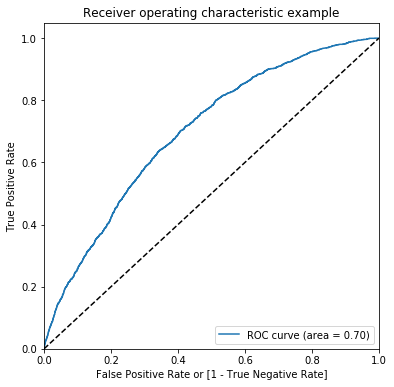

In [307]:
# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_train, pred_probs_train, drop_intermediate = False )
auc_score = roc_auc_score(y_train, pred_probs_train)
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Model evaluation on test data

In [308]:
# Predicting on test dataframe using predict
from sklearn.metrics import classification_report,confusion_matrix
y_test_pred2 = rfc.predict(X_test)

In [309]:
# Accuracy
print("Accuracy on test data:",accuracy_score(y_test, y_test_pred2))
print("\n")

# confusion matrix
confusion3_1 = confusion_matrix(y_test, y_test_pred2)
print(confusion3_1)

Accuracy on test data: 0.5499737607938553


[[10900  9184]
 [  249   628]]


In [310]:
TP = confusion3_1[1,1] # true positive 
TN = confusion3_1[0,0] # true negatives
FP = confusion3_1[0,1] # false positives
FN = confusion3_1[1,0] # false negatives

# Let's see the sensitivity of our model
print("Sensitivity:",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:",TN / float(TN+FP))

Sensitivity: 0.7160775370581528
Specificity: 0.5427205735909182


In [311]:
# Predicting on test dataframe using probability for roc_auc
pred_probs_test = rfc.predict_proba(X_test)[:,1]
"{:2.2}".format(roc_auc_score(y_test, pred_probs_test))

'0.67'

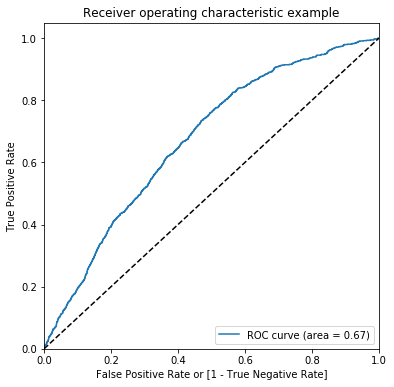

In [312]:
# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_probs_test, drop_intermediate = False )
auc_score = roc_auc_score(y_test, pred_probs_test)
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The statistics of various models are :

|Model|Sensitivity|Specificity|ROC|
---------|--------|------------|---|
|Decision Tree|
|Train|0.76|0.53|0.69|
|Test |0.72|0.53|0.67|
|Random Forest|
|Train|0.74|0.55|0.7|
|Test |0.72|0.54|0.67|
|LR with L1 regularization|
|Train |0.71|0.56|0.68|
|Test |0.69|0.56|0.67|
|LR on IV columns|
|Train |0.7|0.57|0.68|
|Test |0.68|0.56|0.67|

* Although the tree based models are performing slightly better then Logistic Regression models but due to reduced complexity of the LR model with L1 regularisation (only 7 columns), we choose this model as our final model.

# Step 5: Evaluation of model on Rejected Candidates

### Merge the Rejected candidate data from Demographic and Credit data

#### Demographi(Customer) data

In [313]:
# Inspecting rejected candidate data from Customer(Demographic) dataframe
rej_cust_data.head()

,ApplicationID,Age,Gender,MaritalStatus,NoDependents,Income,Education,Profession,ResidenceType,MnthsResidence,MnthsCompany,PerformanceTag
69603,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,18,NaN
69604,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,25,NaN
69605,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,31,NaN
69606,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,47,NaN
69607,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,49,NaN


In [314]:
# Removing PerformanceTag (Target) variable from Demographic dataframe as it only contain null value 
rej_cust_data.drop(["PerformanceTag"], axis=1, inplace=True)

#### Credit bureau data

In [315]:
# Inspecting rejected candidate data from Credit bureau dataframe
rej_credit_data.head()

,ApplicationID,90DPD_6mnths,60DPD_6mnths,30DPD_6mnths,90DPD_12mnths,60DPD_12mnths,30DPD_12mnths,AvgCC_12mnths,Trades_6mnths,Trades_12mnths,PLTrades_6mnths,PLTrades_12mnths,Inquiries_6mnths,Inquiries_12mnths,OpenHomeLoan,OutstandingBalance,TotalTrades,OpenAutoLoan,PerformanceTag
69603,906908303,0,0,2,1,2,3,30.0,4.0,12,3,7,2,4,0.0,1309623.0,13,0,NaN
69604,10990583,1,1,1,3,2,2,16.0,3.0,7,3,4,3,5,0.0,775626.0,7,0,NaN
69605,589678446,3,4,5,3,5,6,83.0,2.0,7,2,4,0,3,0.0,732602.0,8,0,NaN
69606,809411322,1,3,4,3,4,5,87.0,2.0,7,1,4,4,5,0.0,842057.0,8,0,NaN
69607,150246616,2,2,4,3,2,6,42.0,3.0,7,2,3,3,6,0.0,786997.0,7,1,NaN


In [316]:
# Removing PerformanceTag (Target) variable from credit bureau dataframe as it only contain null value 
rej_credit_data.drop(["PerformanceTag"], axis=1, inplace=True)

#### Merge data

In [317]:
# Merging rejected candidate data of Demographic and Credit bureau dataframe
rej_data = rej_cust_data.merge(rej_credit_data, on="ApplicationID")
rej_data.head()

,ApplicationID,Age,Gender,MaritalStatus,NoDependents,Income,Education,Profession,ResidenceType,MnthsResidence,...,Trades_6mnths,Trades_12mnths,PLTrades_6mnths,PLTrades_12mnths,Inquiries_6mnths,Inquiries_12mnths,OpenHomeLoan,OutstandingBalance,TotalTrades,OpenAutoLoan
0,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,...,4.0,12,3,7,2,4,0.0,1309623.0,13,0
1,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,...,3.0,7,3,4,3,5,0.0,775626.0,7,0
2,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,...,2.0,7,2,4,0,3,0.0,732602.0,8,0
3,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,...,2.0,7,1,4,4,5,0.0,842057.0,8,0
4,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,...,3.0,7,2,3,3,6,0.0,786997.0,7,1


In [318]:
# Concatenating dataframe containing WOE and IV values of Demographic and Credit bureau dataframe
total_iv = pd.concat([final_iv,final_credit_iv])
total_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Age,-3,40,24635,1072.0,4.351532,23563.0,95.648468,0.363636,0.352112,-0.032,0.000
1,Age,41,50,22872,958.0,4.188527,21914.0,95.811473,0.324966,0.327471,0.008,0.000
2,Age,51,65,22360,918.0,4.105546,21442.0,95.894454,0.311398,0.320417,0.029,0.000
3,Gender,F,F,16506,718.0,4.349933,15788.0,95.650067,0.243514,0.235927,-0.032,0.000
4,Gender,M,M,53359,2230.0,4.179239,51129.0,95.820761,0.756317,0.764043,0.010,0.000
5,Gender,NaN,NaN,2,0.5,25.000000,2.0,100.000000,0.000170,0.000030,-1.736,0.000
6,MaritalStatus,Married,Married,59544,2503.0,4.203614,57041.0,95.796386,0.848906,0.852389,0.004,0.000
7,MaritalStatus,Single,Single,10317,445.0,4.313269,9872.0,95.686731,0.150924,0.147522,-0.023,0.000
8,MaritalStatus,NaN,NaN,6,0.5,8.333333,6.0,100.000000,0.000170,0.000090,-0.637,0.000
9,NoDependents,1,3,45989,1950.0,4.240144,44039.0,95.759856,0.661353,0.658094,-0.005,0.000


### Apply WOE transformation to Rejected Candidates

In [319]:
# Extracting the columns having datatype as Object
cat_list=rej_data.select_dtypes(include=['object']).columns
cat_list

Index(['Gender', 'MaritalStatus', 'Education', 'Profession', 'ResidenceType'], dtype='object')

In [320]:
# Extracting the columns having datatype other than Object
numeric_list=rej_data.select_dtypes(exclude=['object']).columns

# Removing ApplicationID column
numeric_list=numeric_list.difference(["ApplicationID"])
numeric_list

Index(['30DPD_12mnths', '30DPD_6mnths', '60DPD_12mnths', '60DPD_6mnths',
       '90DPD_12mnths', '90DPD_6mnths', 'Age', 'AvgCC_12mnths', 'Income',
       'Inquiries_12mnths', 'Inquiries_6mnths', 'MnthsCompany',
       'MnthsResidence', 'NoDependents', 'OpenAutoLoan', 'OpenHomeLoan',
       'OutstandingBalance', 'PLTrades_12mnths', 'PLTrades_6mnths',
       'TotalTrades', 'Trades_12mnths', 'Trades_6mnths'],
      dtype='object')

#### Inserting WOE values

In [321]:
# For numeric variables
insert_woe_numeric(rej_data,total_iv)

# For categorical variables
insert_woe_cat(rej_data,total_iv)

In [322]:
# Inspecting dataframe after inserting WOE values
rej_data.head()

,ApplicationID,Age,Gender,MaritalStatus,NoDependents,Income,Education,Profession,ResidenceType,MnthsResidence,...,WOE_PLTrades_12mnths,WOE_PLTrades_6mnths,WOE_TotalTrades,WOE_Trades_12mnths,WOE_Trades_6mnths,WOE_Gender,WOE_MaritalStatus,WOE_Education,WOE_Profession,WOE_ResidenceType
0,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,...,-0.396,-0.400,-0.332,-0.368,-0.354,0.010,-0.023,-0.017,0.029,0.004
1,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,...,-0.396,-0.400,-0.211,-0.229,-0.354,-0.032,0.004,-0.008,-0.092,0.004
2,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,...,-0.396,-0.400,-0.211,-0.229,0.271,0.010,0.004,0.018,-0.092,0.004
3,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,...,-0.396,0.314,-0.211,-0.229,0.271,0.010,0.004,-0.008,0.029,0.004
4,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,...,-0.396,-0.400,-0.211,-0.229,-0.354,-0.032,0.004,0.024,0.029,0.004


In [323]:
rej_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1424
Data columns (total 55 columns):
ApplicationID             1425 non-null int64
Age                       1425 non-null int64
Gender                    1425 non-null object
MaritalStatus             1425 non-null object
NoDependents              1425 non-null float64
Income                    1425 non-null float64
Education                 1424 non-null object
Profession                1424 non-null object
ResidenceType             1425 non-null object
MnthsResidence            1425 non-null int64
MnthsCompany              1425 non-null int64
90DPD_6mnths              1425 non-null int64
60DPD_6mnths              1425 non-null int64
30DPD_6mnths              1425 non-null int64
90DPD_12mnths             1425 non-null int64
60DPD_12mnths             1425 non-null int64
30DPD_12mnths             1425 non-null int64
AvgCC_12mnths             1390 non-null float64
Trades_6mnths             1425 non-null float64
Trades

In [324]:
# Make a copy of the Rejected data for building Application Scorecard
rej_data_copy=rej_data.copy()

In [325]:
# List of column to drop from dataframe
drop_list=cat_list.append(numeric_list)

drop_list = drop_list.insert(0,"ApplicationID")
drop_list

Index(['ApplicationID', 'Gender', 'MaritalStatus', 'Education', 'Profession',
       'ResidenceType', '30DPD_12mnths', '30DPD_6mnths', '60DPD_12mnths',
       '60DPD_6mnths', '90DPD_12mnths', '90DPD_6mnths', 'Age', 'AvgCC_12mnths',
       'Income', 'Inquiries_12mnths', 'Inquiries_6mnths', 'MnthsCompany',
       'MnthsResidence', 'NoDependents', 'OpenAutoLoan', 'OpenHomeLoan',
       'OutstandingBalance', 'PLTrades_12mnths', 'PLTrades_6mnths',
       'TotalTrades', 'Trades_12mnths', 'Trades_6mnths'],
      dtype='object')

In [326]:
# Final dataframe containing columns having only WOE values for rejected candidate
woe_rej_data=rej_data.drop(drop_list, axis=1)
woe_rej_data.head()

,WOE_30DPD_12mnths,WOE_30DPD_6mnths,WOE_60DPD_12mnths,WOE_60DPD_6mnths,WOE_90DPD_12mnths,WOE_90DPD_6mnths,WOE_Age,WOE_AvgCC_12mnths,WOE_Income,WOE_Inquiries_12mnths,...,WOE_PLTrades_12mnths,WOE_PLTrades_6mnths,WOE_TotalTrades,WOE_Trades_12mnths,WOE_Trades_6mnths,WOE_Gender,WOE_MaritalStatus,WOE_Education,WOE_Profession,WOE_ResidenceType
0,-0.711,-0.742,-0.695,0.121,0.134,0.037,-0.032,-0.368,-0.289,-0.183,...,-0.396,-0.400,-0.332,-0.368,-0.354,0.010,-0.023,-0.017,0.029,0.004
1,-0.711,0.198,-0.695,0.121,-0.723,0.037,0.008,-0.368,-0.056,-0.368,...,-0.396,-0.400,-0.211,-0.229,-0.354,-0.032,0.004,-0.008,-0.092,0.004
2,-0.711,-0.742,-0.695,-0.743,-0.723,-0.836,0.008,-0.499,-0.289,-0.183,...,-0.396,-0.400,-0.211,-0.229,0.271,0.010,0.004,0.018,-0.092,0.004
3,-0.711,-0.742,-0.695,-0.743,-0.723,0.037,0.008,-0.499,-0.056,-0.368,...,-0.396,0.314,-0.211,-0.229,0.271,0.010,0.004,-0.008,0.029,0.004
4,-0.711,-0.742,-0.695,-0.743,-0.723,-0.836,0.008,-0.368,-0.056,-0.368,...,-0.396,-0.400,-0.211,-0.229,-0.354,-0.032,0.004,0.024,0.029,0.004


### Evaluation of model

In [327]:
# Inspecting rejected candidate dataframe having WOE values
woe_rej_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1424
Data columns (total 27 columns):
WOE_30DPD_12mnths         1425 non-null float64
WOE_30DPD_6mnths          1425 non-null float64
WOE_60DPD_12mnths         1425 non-null float64
WOE_60DPD_6mnths          1425 non-null float64
WOE_90DPD_12mnths         1425 non-null float64
WOE_90DPD_6mnths          1425 non-null float64
WOE_Age                   1425 non-null float64
WOE_AvgCC_12mnths         1425 non-null float64
WOE_Income                1425 non-null float64
WOE_Inquiries_12mnths     1425 non-null float64
WOE_Inquiries_6mnths      1425 non-null float64
WOE_MnthsCompany          1425 non-null float64
WOE_MnthsResidence        1425 non-null float64
WOE_NoDependents          1425 non-null float64
WOE_OpenAutoLoan          1425 non-null float64
WOE_OpenHomeLoan          1425 non-null float64
WOE_OutstandingBalance    1425 non-null float64
WOE_PLTrades_12mnths      1425 non-null float64
WOE_PLTrades_6mnths       142

#### Prediction of default for Rejected candidate

In [328]:
# Making prediction
rej_pred = logreg.predict(woe_rej_data[col])

# Conveting prediction into dataframe
rej_pred_df = pd.DataFrame({"Tag":rej_pred})
rej_pred_df.head()

,Tag
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


#### Result of prediction on Rejected candidate data

In [329]:
# Total number of rejected candidate
print("Total no. of rejected candidate:",len(rej_pred_df))
print("\n")

# Total number of candidate does not default as per model
print("Number of candidates who do not default as per model:",len(rej_pred_df.loc[(rej_pred_df.Tag == 0)]))
print("\n")

# Total number of candidate default as per model
print("Number of candidates who default as per model:",rej_pred.sum())

Total no. of rejected candidate: 1425


Number of candidate does not default as per model: 8


Number of candidate default as per model: 1417.0


In [330]:
# Accuracy of model to predict rejected candidates
print("Model accuracy:",round((100*rej_pred.sum()/len(rej_pred_df)),2))

Model accuracy: 99.44


Our model is predicting quite accurately on the rejected candidates.  About 99.44% of the rejected candidates have been predicted as Default.

# Step 6: Build an Application Scorecard on the Train Data 

### Using Logistic Regression Model

In [331]:
# Predicting probabilities for train data
y_prob_train=logreg.predict_proba(X_train[col])
y_prob_train

array([[0.53845002, 0.46154998],
       [0.70938366, 0.29061634],
       [0.75921807, 0.24078193],
       ...,
       [0.31532629, 0.68467371],
       [0.32110746, 0.67889254],
       [0.56302912, 0.43697088]])

In [332]:
# Transforming predicted probability value in array form to dataframe 
scorecard = pd.DataFrame(y_prob_train)

# Renaming the column
scorecard = scorecard.rename(columns = {0:"PGood",1:"PBad"})

# Resetting index
scorecard.reset_index(drop=True, inplace=True)
scorecard.head()

,PGood,PBad
0,0.538450,0.461550
1,0.709384,0.290616
2,0.759218,0.240782
3,0.546367,0.453633
4,0.346327,0.653673


In [333]:
# Extracting ApplicationID
X_train_app = X_train_copy["ApplicationID"].reset_index(drop=True)
X_train_app.head()

0    806528089
1    587334872
2     71610719
3    730740700
4    902449396
Name: ApplicationID, dtype: int64

In [334]:
# Making prediction on train data
y_pred_train = logreg.predict(X_train[col])

# Transforming predicted value in array to dataframe 
pred = pd.DataFrame({"Predicted":y_pred_train})
pred.head()

,Predicted
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [335]:
# Concatenating dataframe having ApplicationID, dataframe having predicted probability value and 
# dataframe having predicted values
asc_df = pd.concat([X_train_app,scorecard,pred],axis=1)
asc_df.head()

,ApplicationID,PGood,PBad,Predicted
0,806528089,0.538450,0.461550,0.0
1,587334872,0.709384,0.290616,0.0
2,71610719,0.759218,0.240782,0.0
3,730740700,0.546367,0.453633,0.0
4,902449396,0.346327,0.653673,1.0


In [336]:
# Calculating Odds and LogOdds
asc_df["Odds"]=asc_df["PGood"]/asc_df["PBad"]
asc_df["LogOdds"]=np.log(asc_df["Odds"])

slope=20/(np.log(20)-np.log(10))

# Calculating score
asc_df["Score"]=round(400 + slope *(asc_df["LogOdds"]-np.log(10)),2)
asc_df.head(10)

,ApplicationID,PGood,PBad,Predicted,Odds,LogOdds,Score
0,806528089,0.538450,0.461550,0.0,1.166613,0.154104,338.01
1,587334872,0.709384,0.290616,0.0,2.440963,0.892393,359.31
2,71610719,0.759218,0.240782,0.0,3.153136,1.148397,366.70
3,730740700,0.546367,0.453633,0.0,1.204424,0.186002,338.93
4,902449396,0.346327,0.653673,1.0,0.529817,-0.635224,315.23
5,526710823,0.584259,0.415741,0.0,1.405345,0.340283,343.38
6,429042181,0.752020,0.247980,0.0,3.032591,1.109417,365.57
7,529339062,0.737466,0.262534,0.0,2.809033,1.032840,363.36
8,814412959,0.453001,0.546999,1.0,0.828156,-0.188554,328.12
9,448532151,0.574384,0.425616,0.0,1.349535,0.299760,342.21


In [337]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)

# Resetting index for dataframe to append them side by side 
y_train_df.reset_index(drop=True, inplace=True)

In [338]:
# Concatenating y_train_df and asc_df
cut_off_df = pd.concat([y_train_df, asc_df],axis=1)

# Divide the dataset into 10 equal deciles
cut_off_df['decile'] = pd.qcut(cut_off_df['Score'], 10, labels=np.arange(1, 11, 1))
cut_off_df.head()

,PerformanceTag,ApplicationID,PGood,PBad,Predicted,Odds,LogOdds,Score,decile
0,1.0,806528089,0.538450,0.461550,0.0,1.166613,0.154104,338.01,5
1,0.0,587334872,0.709384,0.290616,0.0,2.440963,0.892393,359.31,8
2,0.0,71610719,0.759218,0.240782,0.0,3.153136,1.148397,366.70,10
3,0.0,730740700,0.546367,0.453633,0.0,1.204424,0.186002,338.93,5
4,0.0,902449396,0.346327,0.653673,1.0,0.529817,-0.635224,315.23,2


In [339]:
# Count of no. of prospects in each decile
lift_df = cut_off_df.groupby('decile')['Score'].count().reset_index()

# Renaming column
lift_df.rename({'Score':'total'}, axis=1, inplace=True)

# Count the no. of prospects who defaulted in each decile
lift_df_pred = cut_off_df[cut_off_df['PerformanceTag']==1].groupby('decile')['Score'].count().reset_index()

# Renaming column
lift_df_pred.rename({'Score':'default'}, axis=1, inplace=True)

# Merging dataframes having total no. of prospects and total no. of prospects defaulted
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')
lift_df_final.head(10)

,decile,total,default
0,1,4904,436
1,2,4884,382
2,3,4922,265
3,4,4866,265
4,5,4892,212
5,6,4888,171
6,7,4878,137
7,8,4931,82
8,9,4862,64
9,10,4879,57


#### Minimum score for each decile

In [340]:
# Calculating Minimum score for each decile
min_score = cut_off_df.groupby('decile')['Score'].min().reset_index()

# Renaming column
min_score.rename({'Score':'MinScore'}, axis=1, inplace=True)

# Concatenating dataframe having count of total no. of prospects, total no. of prospects defaulted 
# and dataframe having MinScore for each decile
lift_df_final = lift_df_final.merge(min_score,on = 'decile')
lift_df_final.head(10)

,decile,total,default,MinScore
0,1,4904,436,299.32
1,2,4884,382,311.24
2,3,4922,265,321.91
3,4,4866,265,325.89
4,5,4892,212,329.36
5,6,4888,171,340.12
6,7,4878,137,346.58
7,8,4931,82,354.48
8,9,4862,64,361.94
9,10,4879,57,364.12


#### Maximum score for each decile

In [341]:
# Calculating Maximum score for each decile
max_score = cut_off_df.groupby('decile')['Score'].max().reset_index()

# Renaming column
max_score.rename({'Score':'MaxScore'}, axis=1, inplace=True)

# Merging dataframe having count of total no. of prospects, total no. of prospects defaulted, minimum score
# and dataframe having maximum score
lift_df_final = lift_df_final.merge(max_score,on = 'decile')
lift_df_final.head(10)

,decile,total,default,MinScore,MaxScore
0,1,4904,436,299.32,311.23
1,2,4884,382,311.24,321.89
2,3,4922,265,321.91,325.87
3,4,4866,265,325.89,329.34
4,5,4892,212,329.36,340.11
5,6,4888,171,340.12,346.57
6,7,4878,137,346.58,354.08
7,8,4931,82,354.48,361.93
8,9,4862,64,361.94,364.10
9,10,4879,57,364.12,367.78


In [342]:
# Finding the cumulative total defaulters
lift_df_final['cum_default']=lift_df_final['default'].cumsum()

# Finding the cumulative % defaulters
lift_df_final['cum_total'] = lift_df_final['total'].cumsum()
lift_df_final['%cum_default'] = 100*lift_df_final['cum_default']/lift_df_final['default'].sum()

# Finding the cumulative lift for each decile
lift_df_final['cumlift'] = lift_df_final['%cum_default']/(lift_df_final['decile'].astype('int')*(100/10))
lift_df_final.head(10)

,decile,total,default,MinScore,MaxScore,cum_default,cum_total,%cum_default,cumlift
0,1,4904,436,299.32,311.23,436,4904,21.052632,2.105263
1,2,4884,382,311.24,321.89,818,9788,39.497827,1.974891
2,3,4922,265,321.91,325.87,1083,14710,52.293578,1.743119
3,4,4866,265,325.89,329.34,1348,19576,65.089329,1.627233
4,5,4892,212,329.36,340.11,1560,24468,75.325930,1.506519
5,6,4888,171,340.12,346.57,1731,29356,83.582810,1.393047
6,7,4878,137,346.58,354.08,1868,34234,90.197972,1.288542
7,8,4931,82,354.48,361.93,1950,39165,94.157412,1.176968
8,9,4862,64,361.94,364.10,2014,44027,97.247706,1.080530
9,10,4879,57,364.12,367.78,2071,48906,100.000000,1.000000


Text(0.5,1,'Lift Chart')

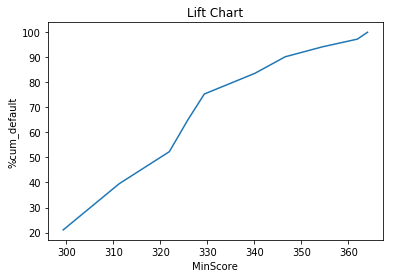

In [343]:
sns.lineplot(x="MinScore", y="%cum_default", data=lift_df_final)
plt.title("Lift Chart")

### Cutoff score

- Cutoff selected for probability of default for logistic regression model was 0.5
- slope=20/(np.log(20)-np.log(10)) 
- slope = 28.85


- __CUTOFF_SCORE = 400 + (slope * (log((1-0.5)/0.5) - log(10))) = 334__


- From the above table, if we choose the cutoff score = 334, by rejecting 50% of the candidates we would be able to reject 75% of the defaulters. With the model, We are able to automatically reject 50% of the customers and approve 50% of them.

In [344]:
# Cutoff score
cutoff_sc = 334

In [345]:
sel = lift_df_final.loc[(lift_df_final.MinScore>=cutoff_sc)]
sel

,decile,total,default,MinScore,MaxScore,cum_default,cum_total,%cum_default,cumlift
5,6,4888,171,340.12,346.57,1731,29356,83.582810,1.393047
6,7,4878,137,346.58,354.08,1868,34234,90.197972,1.288542
7,8,4931,82,354.48,361.93,1950,39165,94.157412,1.176968
8,9,4862,64,361.94,364.10,2014,44027,97.247706,1.080530
9,10,4879,57,364.12,367.78,2071,48906,100.000000,1.000000


#### Count of Bad customers

In [346]:
# Without using model
bad_cust_without_model = lift_df_final["default"].sum()
print("No. of bad customers without using model:",bad_cust_without_model)

# With using model
bad_cust_with_model = lift_df_final.loc[lift_df_final.MinScore > cutoff_sc]["default"].sum()
print("No. of bad customers using model:",bad_cust_with_model)

No. of bad customers without using model: 2071
No. of bad customers using model: 511


#### Count of Good customers

In [347]:
# Without using model
good_cust_without_model = (lift_df_final["total"]-lift_df_final["default"]).sum()
print("No. of good customers without using model:",good_cust_without_model)

# With using model
good_cust_with_model = (sel["total"]-sel["default"]).sum()
print("No. of good customers using model:",good_cust_with_model)

No. of good customers without using model: 46835
No. of good customers using model: 23927


#### Comparison without model and with model

In [349]:
# Default percentage without using model
def_percent_without = round(100 * lift_df_final["default"].sum()/lift_df_final["total"].sum(),3)
print("Default % without using model:",def_percent_without)

# Default percentage with using model
def_percent_with = round(100*sel["default"].sum()/sel["total"].sum(),3)
print("Default % using model:",def_percent_with)

Default % without using model: 4.235
Default % using model: 2.091


The __% of default customers without the model is 4.2%__ whereas __with the model it is 2.1%__

### Financial analysis

#### <span style="color:blue">Assumptions</span>
- Let us assume the credit loss per defaulter as Rs 10,000/-
- And The average revenue per customer is Rs. 500/-

Based on these assumption we will calculate Credit loss, Revenue and Net Profit

#### Credit Loss comparison

In [350]:
# Credit loss without using model
credit_loss_without_model = bad_cust_without_model * 10000
print("Credit loss without using model:",credit_loss_without_model)

# Credit loss using model
credit_loss_with_model = bad_cust_with_model * 10000
print("Credit loss using model",credit_loss_with_model)

Credit loss without using model: 20710000
Credit loss using model 5110000


#### Revenue comparison

In [351]:
# Revenue without using model
revenue_without_model = good_cust_without_model * 500
print("Revenue without using model:",revenue_without_model)

# Revenue using model
revenue_with_model = good_cust_with_model * 500
print("Revenue using model:",revenue_with_model)

Revenue without using model: 23417500
Revenue using model: 11963500


#### Net profit comparison

In [352]:
# Net profit without using model
net_profit_without_model = revenue_without_model - credit_loss_without_model
print("Net profit without using model:",net_profit_without_model)

# Net profit using model
net_profit_with_model = revenue_with_model - credit_loss_with_model
print("Net profit using model:",net_profit_with_model)

Net profit without using model: 2707500
Net profit using model: 6853500


- __Without the model,__
    * credit loss = No. of bad customers X 10000 = 2071 X 10000 = 20,710,000
    * Total Revenue = No. of good customers X 500 = 46835 X 500 = 23,417,500
    * Net Profit = Total Revenue - Credit Loss = 23,417,500 - 20,710,000 = 2,707,500
    
    
- __With the model,__
    * credit loss = No. of bad customers X 10000 = 511 X 10000 = 5,110,000
    * Total Revenue = No. of good customers X 500 = 23927 X 500 = 11,963,500
    * Net Profit = Total Revenue - Credit Loss = 11,963,500 - 5,110,000 = 6,853,500

**Therefore on the train dataset, with the model the Net Profit is increased from 2.7 million Rs to 6.85 million Rs**

## Build an Application Scorecard on the Test Data using the Logistic Regression Model and evaluate the cutoff

In [353]:
# Predicting probabilities for test data
y_prob_test=logreg.predict_proba(X_test[col])
y_prob_test

array([[0.5743839 , 0.4256161 ],
       [0.31618349, 0.68381651],
       [0.72966829, 0.27033171],
       ...,
       [0.56302912, 0.43697088],
       [0.73462822, 0.26537178],
       [0.29006718, 0.70993282]])

In [354]:
# Transforming predicted probability value in array form to dataframe 
sc_test = pd.DataFrame(y_prob_test)

# Renaming columns
sc_test = sc_test.rename(columns = {0:"PGood",1:"PBad"})

# Resetting index
sc_test.reset_index(drop=True, inplace=True)
sc_test.head()

,PGood,PBad
0,0.574384,0.425616
1,0.316183,0.683817
2,0.729668,0.270332
3,0.740612,0.259388
4,0.415138,0.584862


In [355]:
# Extracting ApplicationID
X_test_app = X_test_copy["ApplicationID"].reset_index(drop=True)
X_test_app.head()

0    133287878
1      1331612
2     10113935
3    930083796
4    722439270
Name: ApplicationID, dtype: int64

In [356]:
# Making prediction on test data
y_pred_test = logreg.predict(X_test[col])

# Transforming predicted value in array to dataframe 
pred_test = pd.DataFrame({"Predicted":y_pred_test})
pred_test.head()

,Predicted
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [357]:
# Concatenating dataframe having ApplicationID, dataframe having predicted probability value and 
# dataframe having predicted values
asc_df_test = pd.concat([X_test_app,sc_test,pred_test],axis=1)
asc_df_test.head()

,ApplicationID,PGood,PBad,Predicted
0,133287878,0.574384,0.425616,0.0
1,1331612,0.316183,0.683817,1.0
2,10113935,0.729668,0.270332,0.0
3,930083796,0.740612,0.259388,0.0
4,722439270,0.415138,0.584862,1.0


In [358]:
# Calculating Odds and LogOdds
asc_df_test["Odds"]=asc_df_test["PGood"]/asc_df_test["PBad"]
asc_df_test["LogOdds"]=np.log(asc_df_test["Odds"])

slope=20/(np.log(20)-np.log(10))

# Calculating score
asc_df_test["Score"]=round(400 + slope *(asc_df_test["LogOdds"]-np.log(10)),2)
asc_df_test.head(10)

,ApplicationID,PGood,PBad,Predicted,Odds,LogOdds,Score
0,133287878,0.574384,0.425616,0.0,1.349535,0.299760,342.21
1,1331612,0.316183,0.683817,1.0,0.462381,-0.771367,311.30
2,10113935,0.729668,0.270332,0.0,2.699159,0.992940,362.21
3,930083796,0.740612,0.259388,0.0,2.855222,1.049150,363.83
4,722439270,0.415138,0.584862,1.0,0.709804,-0.342766,323.67
5,593568664,0.694293,0.305707,0.0,2.271109,0.820268,357.23
6,878259945,0.450037,0.549963,1.0,0.818305,-0.200520,327.78
7,821349151,0.723715,0.276285,0.0,2.619445,0.962962,361.35
8,420276279,0.723602,0.276398,0.0,2.617970,0.962399,361.33
9,358685123,0.735725,0.264275,0.0,2.783935,1.023865,363.10


In [359]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_test_df.reset_index(drop=True, inplace=True)

In [360]:
# Appending y_test_df and asc_df_test
cut_off_test_df = pd.concat([y_test_df, asc_df_test],axis=1)

# Divide the dataset into 10 equal deciles
cut_off_test_df['decile'] = pd.qcut(cut_off_test_df['Score'], 10, labels=np.arange(1, 11, 1))
cut_off_test_df.head()

,PerformanceTag,ApplicationID,PGood,PBad,Predicted,Odds,LogOdds,Score,decile
0,0.0,133287878,0.574384,0.425616,0.0,1.349535,0.299760,342.21,6
1,0.0,1331612,0.316183,0.683817,1.0,0.462381,-0.771367,311.30,2
2,0.0,10113935,0.729668,0.270332,0.0,2.699159,0.992940,362.21,9
3,0.0,930083796,0.740612,0.259388,0.0,2.855222,1.049150,363.83,9
4,0.0,722439270,0.415138,0.584862,1.0,0.709804,-0.342766,323.67,3


In [361]:
# Count of no. of prospects in each decile
lift_df_test = cut_off_test_df.groupby('decile')['Score'].count().reset_index()

# Renaming column
lift_df_test.rename({'Score':'total'}, axis=1, inplace=True)

# Count the no. of prospects who defaulted in each decile
lift_df_test_pred = cut_off_test_df[cut_off_test_df['PerformanceTag']==1].groupby('decile')['Score'].count().reset_index()

# Renaming column
lift_df_test_pred.rename({'Score':'default'}, axis=1, inplace=True)

# Merging dataframes having total no. of prospects and total no. of prospects defaulted
lift_df_test_final = lift_df_test.merge(lift_df_test_pred,on = 'decile')
lift_df_test_final.head(10)

,decile,total,default
0,1,2123,168
1,2,2071,166
2,3,2110,120
3,4,2083,100
4,5,2108,99
5,6,2089,69
6,7,2098,70
7,8,2092,23
8,9,2121,32
9,10,2066,30


#### Minimum score for each decile

In [362]:
# Calculating Minimum score for each decile
min_score_test = cut_off_test_df.groupby('decile')['Score'].min().reset_index()

# Renaming column
min_score_test.rename({'Score':'MinScore'}, axis=1, inplace=True)

# Concatenating dataframe having count of total no. of prospects, total no. of prospects defaulted 
# and dataframe having MinScore for each decile
lift_df_test_final = lift_df_test_final.merge(min_score_test,on = 'decile')
lift_df_test_final.head(10)

,decile,total,default,MinScore
0,1,2123,168,301.39
1,2,2071,166,311.27
2,3,2110,120,321.77
3,4,2083,100,325.73
4,5,2108,99,329.23
5,6,2089,69,340.12
6,7,2098,70,346.17
7,8,2092,23,353.30
8,9,2121,32,361.65
9,10,2066,30,364.15


#### Maximum score for each decile

In [363]:
# Calculating Maximum score for each decile
max_score_test = cut_off_test_df.groupby('decile')['Score'].max().reset_index()

# Renaming column
max_score_test.rename({'Score':'MaxScore'}, axis=1, inplace=True)

# Merging dataframe having count of total no. of prospects, total no. of prospects defaulted, minimum score
# and dataframe having maximum score
lift_df_test_final = lift_df_test_final.merge(max_score_test,on = 'decile')
lift_df_test_final.head(10)

,decile,total,default,MinScore,MaxScore
0,1,2123,168,301.39,311.26
1,2,2071,166,311.27,321.76
2,3,2110,120,321.77,325.71
3,4,2083,100,325.73,329.21
4,5,2108,99,329.23,340.11
5,6,2089,69,340.12,346.16
6,7,2098,70,346.17,353.24
7,8,2092,23,353.30,361.61
8,9,2121,32,361.65,364.12
9,10,2066,30,364.15,367.78


In [364]:
# Finding the cumulative total defaulters
lift_df_test_final['cum_default']=lift_df_test_final['default'].cumsum()

# Finding the cumulative % defaulters
lift_df_test_final['cum_total'] = lift_df_test_final['total'].cumsum()
lift_df_test_final['%cum_default'] = 100*lift_df_test_final['cum_default']/lift_df_test_final['default'].sum()

# Finding the cumulative lift for each decile
lift_df_test_final['cumlift'] = lift_df_test_final['%cum_default']/(lift_df_test_final['decile'].astype('int')*(100/10))
lift_df_test_final.head(10)

,decile,total,default,MinScore,MaxScore,cum_default,cum_total,%cum_default,cumlift
0,1,2123,168,301.39,311.26,168,2123,19.156214,1.915621
1,2,2071,166,311.27,321.76,334,4194,38.084379,1.904219
2,3,2110,120,321.77,325.71,454,6304,51.767389,1.725580
3,4,2083,100,325.73,329.21,554,8387,63.169897,1.579247
4,5,2108,99,329.23,340.11,653,10495,74.458381,1.489168
5,6,2089,69,340.12,346.16,722,12584,82.326112,1.372102
6,7,2098,70,346.17,353.24,792,14682,90.307868,1.290112
7,8,2092,23,353.30,361.61,815,16774,92.930445,1.161631
8,9,2121,32,361.65,364.12,847,18895,96.579247,1.073103
9,10,2066,30,364.15,367.78,877,20961,100.000000,1.000000


* With the chosen cutoff score=334, we are able to reject around 74.46% of the defaulters by rejecting 50% of the candidates. Therefore the cutoff score works well on the test data as well.
* With the model, We are able to automatically reject 50% of the customers and approve 50% of them.

Text(0.5,1,'Lift Chart')

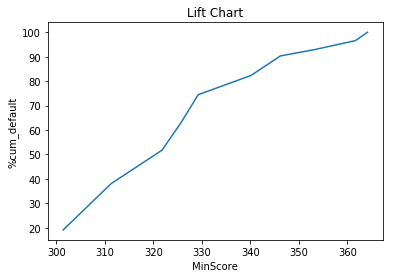

In [365]:
sns.lineplot(x="MinScore", y="%cum_default", data=lift_df_test_final)
plt.title("Lift Chart")

In [366]:
sel = lift_df_test_final.loc[(lift_df_test_final.MinScore>cutoff_sc)]
sel

,decile,total,default,MinScore,MaxScore,cum_default,cum_total,%cum_default,cumlift
5,6,2089,69,340.12,346.16,722,12584,82.326112,1.372102
6,7,2098,70,346.17,353.24,792,14682,90.307868,1.290112
7,8,2092,23,353.30,361.61,815,16774,92.930445,1.161631
8,9,2121,32,361.65,364.12,847,18895,96.579247,1.073103
9,10,2066,30,364.15,367.78,877,20961,100.000000,1.000000


#### Count of Bad customers

In [367]:
# No. of bad customers without using model
bad_cust_without_model1 = lift_df_test_final["default"].sum()
print("No. of bad customers without using model:",bad_cust_without_model1)

# No. of bad customersusing model
bad_cust_with_model1 = lift_df_test_final.loc[lift_df_test_final.MinScore >334]["default"].sum()
print("No. of bad customers using model:",bad_cust_with_model1)

No. of bad customers without using model: 877
No. of bad customers using model: 224


#### Count of Good customers

In [368]:
# No. of good customers without using model
good_cust_without_model1 = (lift_df_test_final["total"]-lift_df_test_final["default"]).sum()
print("No. of good customers without using model:",good_cust_without_model1)

# No. of good customers using model
good_cust_with_model1 = (sel["total"]-sel["default"]).sum()
print("No. of good customers using model:",good_cust_with_model1)

No. of good customers without using model: 20084
No. of good customers using model: 10242


### Financial Analysis on test data

We will calculate Credit loss, Revenue and Net Profit on test data

#### Credit loss comparison on test data

In [370]:
# Credit loss without using model
credit_loss_wout_model_test = bad_cust_without_model1 * 10000
print("Credit loss without using model:",credit_loss_wout_model_test)

# Credit loss using model
credit_loss_with_model_test = bad_cust_with_model1 * 10000
print("Credit loss using model",credit_loss_with_model_test)

Credit loss without using model: 8770000
Credit loss using model 2240000


#### Revenue comparison on test data

In [371]:
# Revenue without using model
revenue_wout_model_test = good_cust_without_model1 * 500
print("Revenue without using model:",revenue_wout_model_test)

# Revenue using model
revenue_with_model_test = good_cust_with_model1 * 500
print("Revenue using model:",revenue_with_model_test)

Revenue without using model: 10042000
Revenue using model: 5121000


#### Net profit comparison on test data

In [372]:
# Net profit without using model
net_profit_wout_model_test = revenue_wout_model_test - credit_loss_wout_model_test
print("Net profit without using model:",net_profit_wout_model_test)

# Net profit using model
net_profit_with_model_test = revenue_with_model_test - credit_loss_with_model_test
print("Net profit using model:",net_profit_with_model_test)

Net profit without using model: 1272000
Net profit using model: 2881000


### Calculations
Using the previous assumptions that credit loss per defaulter is Rs 10,000/- and revenue per customer is Rs 500/- 
- __Without the model,__
    * credit loss = No. of bad customers X 10000 = 877 X 10000 = 8,770,00
    * Total Revenue = No. of good customers X 500 = 20084 X 500 = 10,042,000
    * Net Profit = Total Revenue - Credit Loss = 10,042,000 - 8,770,000 = 1,272,000
    
    
- __With the model,__
    * credit loss = No. of bad customers X 10000 = 224 X 10000 = 2,240,000
    * Total Revenue = No. of good customers X 500 = 10242 X 500 = 5,121,500
    * Net Profit = Total Revenue - Credit Loss = 5,121,500 - 2,240,000 = 2,881,000

**Therefore on the test dataset, with the model we are able to increase the net profit from 1.27 million Rs to 2.9 million Rs**

## Build an Application Scorecard of Rejected Candidates

In [373]:
# Predicting probabilities for rejected candidates data having woe values
prob_rej=logreg.predict_proba(woe_rej_data[col])
prob_rej

array([[0.31586382, 0.68413618],
       [0.31195197, 0.68804803],
       [0.30310796, 0.69689204],
       ...,
       [0.327369  , 0.672631  ],
       [0.34668138, 0.65331862],
       [0.32934832, 0.67065168]])

In [374]:
# Transforming predicted probability value in array form to dataframe 
rej_scorecard = pd.DataFrame(prob_rej)

# Renaming the columns
rej_scorecard = rej_scorecard.rename(columns = {0:"PGood",1:"PBad"})

# Resetting index
rej_scorecard.reset_index(drop=True, inplace=True)
rej_scorecard.head()

,PGood,PBad
0,0.315864,0.684136
1,0.311952,0.688048
2,0.303108,0.696892
3,0.303764,0.696236
4,0.321559,0.678441


In [375]:
# Extracting ApplicationID
rej_data_app = rej_data_copy["ApplicationID"].reset_index(drop=True)
rej_data_app.head()

0    906908303
1     10990583
2    589678446
3    809411322
4    150246616
Name: ApplicationID, dtype: int64

In [376]:
# Making prediction on woe data of rejected candidates
y_pred_rej = logreg.predict(woe_rej_data[col])

# Transforming predicted value in array to dataframe 
pred_rej = pd.DataFrame({"Predicted":y_pred_rej})
pred_rej.head()

,Predicted
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [377]:
# Concatenating dataframe having ApplicationID, dataframe having predicted probability values and 
# dataframe having predicted values of woe rejected data
rej_scorecard = pd.concat([rej_data_app,rej_scorecard,pred_rej],axis=1)
rej_scorecard.head()

,ApplicationID,PGood,PBad,Predicted
0,906908303,0.315864,0.684136,1.0
1,10990583,0.311952,0.688048,1.0
2,589678446,0.303108,0.696892,1.0
3,809411322,0.303764,0.696236,1.0
4,150246616,0.321559,0.678441,1.0


In [378]:
# Calculating Odds and LogOdds
rej_scorecard["Odds"]=rej_scorecard["PGood"]/rej_scorecard["PBad"]
rej_scorecard["LogOdds"]=np.log(rej_scorecard["Odds"])

slope=20/(np.log(20)-np.log(10))

# Calculating score
rej_scorecard["Score"]=round(400 + slope *(rej_scorecard["LogOdds"]-np.log(10)),2)
rej_scorecard.head(15)

,ApplicationID,PGood,PBad,Predicted,Odds,LogOdds,Score
0,906908303,0.315864,0.684136,1.0,0.461697,-0.772846,311.26
1,10990583,0.311952,0.688048,1.0,0.453387,-0.791009,310.74
2,589678446,0.303108,0.696892,1.0,0.434942,-0.832541,309.54
3,809411322,0.303764,0.696236,1.0,0.436294,-0.829439,309.63
4,150246616,0.321559,0.678441,1.0,0.473968,-0.746616,312.02
5,216681850,0.343597,0.656403,1.0,0.523454,-0.647306,314.88
6,413788459,0.353318,0.646682,1.0,0.546355,-0.604487,316.12
7,666004143,0.330262,0.669738,1.0,0.493121,-0.707001,313.16
8,505448697,0.281748,0.718252,1.0,0.392269,-0.935808,306.56
9,16819814,0.277577,0.722423,1.0,0.384230,-0.956515,305.96


#### Minimum and Maximum score for rejected candidates data

In [379]:
# Minimum score for rejected candidate data
print("Minimum score for rejected candidate data:",rej_scorecard["Score"].min())

# Maximum score for rejected candidate data
print("Maximum score for rejected candidate data:",rej_scorecard["Score"].max())

Minimum score for rejected candidate data: 304.05
Maximum score for rejected candidate data: 348.0


In [380]:
# Rejected candidate data having score more than cut-off score
rej_scorecard.loc[(rej_scorecard.Score >cutoff_sc)]

,ApplicationID,PGood,PBad,Predicted,Odds,LogOdds,Score
225,63212216,0.574054,0.425946,0.0,1.347715,0.298410,342.17
262,77800998,0.622564,0.377436,0.0,1.649454,0.500444,348.00
273,329555806,0.608491,0.391509,0.0,1.554221,0.440974,346.29
626,359980559,0.599421,0.400579,0.0,1.496389,0.403055,345.19
838,908032283,0.504074,0.495926,0.0,1.016431,0.016297,334.03
1099,789359187,0.522086,0.477914,0.0,1.092427,0.088402,336.11


#### Comparison of Credit scores of rejected candidate with approved candidate
- __For approved candidate__
    - On train data
        - Min credit score calculated is - 299.32
        - Maximum credit score calculated is - 367.78
    - On test data
        - Min credit score calculated is - 301.39
        - Maximum credit score calculated is - 367.78
    - Consolidated
        - Min credit score calculated is - 299.32
        - Maximum credit score calculated is - 367.78


- __For rejected candidate__
    - Min credit score calculated is - 304.05
    - Maximu credit score calculated is - 348.0

# Conclusion

As per the objective we created two types of model: __Demographic data model__ and __Model using both demographic and credit bureau data__

### Findings from Demographic data

__WOE and IV analysis__

|VAR_NAME|IV|
---------|--------|
|MnthsResidence|0.052|
|Income|0.038|
|MnthsCompany|0.012|
|Profession|0.002|
|Educatio|0.001|
|ResidenceType|0.001|
|Age|0.000|
|Gender|0.000|
|MaritalStatus|0.000|
|NoDependents|0.000|

From the table we can observe
- __MnthsResidence & Income__</span> have weak predictive power
- __Other variables__ are not useful for model building

__We created Logistic Regression model and result are as follows:__
   - ROC AUC
     - Train - 0.59
     - Test -  0.57
   - Sensitivity 
     - Train - 0.58
     - Test - 0.56
   - Specificity
     - Train - 0.56
     - Test - 0.55

### Findings from merged demographic and credit bureau data
__WOE and IV analysis__

|VAR_NAME|IV|
---------|--------|
|AvgCC_12mnths|0.294|
|Trades_12mnths|0.258|
|Inquiries_12mnths|0.230|
|TotalTrades|0.190|
|30DPD_12mnths|0.189|
|PLTrades_12mnths|0.176|
|30DPD_6mnths|0.146|
|60DPD_12mnths|0.138|
|PLTrades_6mnths|0.125|
|90DPD_12mnths|0.096|
|Trades_6mnths|0.095|
|Inquiries_6mnths|0.092|
|60DPD_6mnths|0.090|
|90DPD_6mnths|0.030|
|OutstandingBalance|0.008|
|OpenAutoLoan|0.002|
|OpenHomeLoan|0.000|

From the table we can observe
- __AvgCC_12mnths, Trades_12mnths, Inquiries_12mnths, TotalTrades, 30DPD_12mnths, PLTrades_12mnths, 30DPD_6mnths, 60DPD_12mnths and PLTrades_6mnths__ have medium predictive power
- __90DPD_12mnths, Trades_6mnths, Inquiries_6mnths, 60DPD_6mnths and 90DPD_6mnths__ have weak predictive power
- __OutstandingBalance, OpenAutoLoan and OpenHomeLoan__ are not useful for model building__

__We created various model on merged data and statistics of various models are as follows:__

|Model|Sensitivity|Specificity|ROC|
---------|--------|------------|---|
|LR on IV columns|
|Train |0.70|0.57|0.68|
|Test |0.68|0.56|0.67|
|LR with L1 regularization|
|Train |0.71|0.56|0.68|
|Test |0.69|0.56|0.67|
|Decision Tree|
|Train|0.76|0.53|0.69|
|Test |0.72|0.53|0.67|
|Random Forest|
|Train|0.74|0.55|0.70|
|Test |0.72|0.54|0.67|

Although the tree based models are performing slightly better then Logistic Regression models but due to reduced complexity of the LR model with L1 regularisation (only 7 columns), __<span style="color:red">we choose Logistic Regression with L1 regularisation model as our final model.__</span>

### Predicting the likelihood of default for the rejected candidates
Our model is predicting quite accurately on the rejected candidates.  <span style="color:red">__About 99.44% of the rejected candidates have been predicted as Default.__</span>

### Application scorecard

- We build application scorecard with the good to bad odds of 10 to 1 at a score of 400 doubling every 20 points.

- After calculating the scores a cut-off score is calculated based on which it can be decided whether to grant or reject the credit card to applicants.
    - <span style="color:red">__Selected cut off score is 334__</span> below which we will reject the credit card to applicants.


### Financial Analysis

__To perform financial analysis we made assumption that__
- Credit loss per defaulter = Rs 10,000/-              
- Average revenue per customer = Rs. 500/-

__Comparison without model and with model on train data__
- __Without the model,__
    * credit loss = 20,710,000
    * Total Revenue = 23,417,500
    * Net Profit = 2,707,500
    
- __With the model,__
    * credit loss = 5,110,000
    * Total Revenue = 11,963,500
    * Net Profit = 6,853,500

<span style="color:red">__Therefore on the train dataset, with the model the Net Profit is increased from 2.7 million Rs to 6.85 million Rs__</span>
<br>
<br>

__Comparison without model and with model on test data__
- __Without the model,__
    * credit loss = 8,770,00
    * Total Revenue = 10,042,000
    * Net Profit = 1,272,000
    
    
- __With the model,__
    * credit loss = 2,240,000
    * Total Revenue = 5,121,500
    * Net Profit = 2,881,000

<span style="color:red">__Therefore on the test dataset, with the model we are able to increase the net profit from 1.2 million Rs to 2.9 million Rs__</span>

__Potential financial benefit__
- <span style="color:red">__We found out that our model is accurate in rejecting the candidate who may default in future. The % of default customers without the model is 4.2% whereas with the model it is 2.1%__</span>